# CRIMES IN BOSTON
The BPD, dating back to 1854, holds the primary responsibility for law enforcement and investigation within the city of Boston, Massachusetts. It is the oldest municipal police department in the United States. The BPD is also the 20th largest law enforcement agency in the country.

The BPD is dedicated to working in partnership with the community to fight crime, reduce fear and improve the quality of life in our neighborhoods. Our Mission is Community Policing.

## BACKGROUND
In line with its mission statement, The BPD wants to know the performance of crime incident reports as a whole and in each District.

### PROBLEM STATEMENT
1. Fight Crime : The BPD wants to know the trend of incident number that occurs in a given period of time.
1. Reduce Fear: The BPD wants to know offenses that occur following which UCR Part determined by The FBI.
1. Improve The Quality of Life : The BPD wants to know the tendencies that trigger offenses in order to provide better service and awareness to citizens.

## DATA WRANGLING

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
import natsort
import regex as re
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from pylab import rcParams
rcParams["figure.figsize"] = 20,9
# import warnings
# warnings.filterwarnings("ignore")
from pandas.api.types import CategoricalDtype
from dython.nominal import associations

### DATA LOADING & EXTRACTING

In [2]:
df = pd.read_csv('crime.csv', encoding='latin-1')
display(df.head(),df.tail())

INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP   OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART       STREET        Lat       Long                     Location
0      I182070945           619               Larceny    LARCENY ALL OTHERS      D14            808      NaN  2018-09-02 13:00:00  2018      9      Sunday    13    Part One   LINCOLN ST  42.357791 -71.139371  (42.35779134, -71.13937053)
1      I182070943          1402             Vandalism             VANDALISM      C11            347      NaN  2018-08-21 00:00:00  2018      8     Tuesday     0    Part Two     HECLA ST  42.306821 -71.060300  (42.30682138, -71.06030035)
2      I182070941          3410                 Towed   TOWED MOTOR VEHICLE       D4            151      NaN  2018-09-03 19:27:00  2018      9      Monday    19  Part Three  CAZENOVE ST  42.346589 -71.072429  (42.34658879, -71.07242943)
3      I182070940          3114  Investigate Property  INVESTIGATE PROPERTY       D4            272      NaN  2018-09-03 21:16:00  2018      9      Monday    21  Part Three   NEWCOMB ST  42.334182 -71.078664  (42.33418175, -71.07866441)
4      I182070938          3114  Investigate Property  INVESTIGATE PROPERTY       B3            421      NaN  2018-09-03 21:05:00  2018      9      Monday    21  Part Three     DELHI ST  42.275365 -71.090361  (42.27536542, -71.09036101)

INCIDENT_NUMBER  OFFENSE_CODE OFFENSE_CODE_GROUP                  OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART             STREET        Lat       Long                     Location
319068   I050310906-00          3125    Warrant Arrests                       WARRANT ARREST       D4            285      NaN  2016-06-05 17:25:00  2016      6      Sunday    17  Part Three        COVENTRY ST  42.336951 -71.085748  (42.33695098, -71.08574813)
319069   I030217815-08           111           Homicide  MURDER, NON-NEGLIGIENT MANSLAUGHTER      E18            520      NaN  2015-07-09 13:38:00  2015      7    Thursday    13    Part One           RIVER ST  42.255926 -71.123172  (42.25592648, -71.12317207)
319070   I030217815-08          3125    Warrant Arrests                       WARRANT ARREST      E18            520      NaN  2015-07-09 13:38:00  2015      7    Thursday    13  Part Three           RIVER ST  42.255926 -71.123172  (42.25592648, -71.12317207)
319071   I010370257-00          3125    Warrant Arrests                       WARRANT ARREST      E13            569      NaN  2016-05-31 19:35:00  2016      5     Tuesday    19  Part Three  NEW WASHINGTON ST  42.302333 -71.111565  (42.30233307, -71.11156487)
319072       142052550          3125    Warrant Arrests                       WARRANT ARREST       D4            903      NaN  2015-06-22 00:12:00  2015      6      Monday     0  Part Three      WASHINGTON ST  42.333839 -71.080290  (42.33383935, -71.08029038)

In [3]:
df_code = pd.read_csv('offense_codes.csv', encoding='latin-1')
display(df_code.head(),df_code.tail())

CODE                                     NAME
0   612         LARCENY PURSE SNATCH - NO FORCE 
1   613                      LARCENY SHOPLIFTING
2   615  LARCENY THEFT OF MV PARTS & ACCESSORIES
3  1731                                   INCEST
4  3111                LICENSE PREMISE VIOLATION

CODE                                       NAME
571  1806  DRUGS - CLASS B TRAFFICKING OVER 18 GRAMS
572  1807  DRUGS - CLASS D TRAFFICKING OVER 50 GRAMS
573  1610    HUMAN TRAFFICKING - COMMERCIAL SEX ACTS
574  2010                              HOME INVASION
575  1620  HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE

### DATA FIELD EXPLANATION
Column Description
1. INCIDENT_NUMBER : Internal BPD report number (Nomor laporan internal BPD)
2. OFFENSE_CODE : Numerical code of offense description (Kode numerik deskripsi pelanggaran)
3. OFFENSE_CODE_GROUP : Internal categorization of [OFFENSE_DESCRIPTION] (Kategorisasi internal [OFFENSE_DESCRIPTION])
4. OFFENSE_DESCRIPTION : Primary descriptor of incident (Deskriptor utama insiden)
5. DISTRICT : What district the crime was reported in (Di distrik mana kejahatan itu dilaporkan)
6. REPORTING_AREA : RA number associated with the where the crime was reported (Nomor RA terkait dengan di mana kejahatan itu dilaporkan)
7. SHOOTING : Indicated a shooting took place (Diindikasikan terjadi penembakan)
8. OCCURRED_ON_DATE	: Earliest date and time the incident could have taken place (Tanggal dan waktu paling awal kejadian itu bisa saja terjadi)
9. UCR_PART : Universal Crime Reporting Part number (1,2,3) (Nomor Bagian Pelaporan Kejahatan Universal)
10. STREET : Street name the incident took place (Nama jalan kejadian itu terjadi)

Source: https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system/resource/9c30453a-fefa-4fe0-b51a-5fc09b0f4655

The DPD subdivides the City into small reporting areas (RAs) to facilitate the analysis and mapping of crime and calls for service. Those RAs are nested within 225 patrol beats across 7 patrol divisions.

Source: https://www.dallaspolice.net/Shared%20Documents/violent-crime-reduction-plan.pdf

### DATA UNDERSTANDING

In [4]:
df.info()
# the result shows that there are several columns that contain null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [5]:
df_code.info()
# the result shows that there aren't columns that contain null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CODE    576 non-null    int64 
 1   NAME    576 non-null    object
dtypes: int64(1), object(1)
memory usage: 9.1+ KB


### DATA CLEANSING

Data cleansing is a process of detecting and removing errors and inconsistencies from data in order to improve the qualify of data. At this time there are several steps to cleansing Crimes in Boston dataset which are :
1. Capitalized Non-Numeric Data Type Columns
1. Checking & Handling Whitespaces
1. Checking & Handling Duplicate Data
1. Checking & Handling Each Column Anomalies
1. Checking & Handling Missing Values

#### CAPITALIZED NON-NUMERIC DATA TYPE COLUMNS
As we can see, the non-integer data type columns in the dataframe writing format was inconsistent. For example, on OFFENSE_CODE_GROUP column the writing format is only capital for first letter. Meanwhile, on OFFENSE_DESCRIPTION column the writing format is capitalized for all letter. Therefore, we need to standardize the writing format into all capitalized letter.

In [6]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.upper()

df.head()
# the result shows that all columns with non-numeric data type already capitalized at all letter

INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP   OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART       STREET        Lat       Long                     Location
0      I182070945           619               LARCENY    LARCENY ALL OTHERS      D14            808      NaN  2018-09-02 13:00:00  2018      9      SUNDAY    13    PART ONE   LINCOLN ST  42.357791 -71.139371  (42.35779134, -71.13937053)
1      I182070943          1402             VANDALISM             VANDALISM      C11            347      NaN  2018-08-21 00:00:00  2018      8     TUESDAY     0    PART TWO     HECLA ST  42.306821 -71.060300  (42.30682138, -71.06030035)
2      I182070941          3410                 TOWED   TOWED MOTOR VEHICLE       D4            151      NaN  2018-09-03 19:27:00  2018      9      MONDAY    19  PART THREE  CAZENOVE ST  42.346589 -71.072429  (42.34658879, -71.07242943)
3      I182070940          3114  INVESTIGATE PROPERTY  INVESTIGATE PROPERTY       D4            272      NaN  2018-09-03 21:16:00  2018      9      MONDAY    21  PART THREE   NEWCOMB ST  42.334182 -71.078664  (42.33418175, -71.07866441)
4      I182070938          3114  INVESTIGATE PROPERTY  INVESTIGATE PROPERTY       B3            421      NaN  2018-09-03 21:05:00  2018      9      MONDAY    21  PART THREE     DELHI ST  42.275365 -71.090361  (42.27536542, -71.09036101)

In [7]:
for col in df_code.columns:
    if df_code[col].dtype == 'object':
        df_code[col] = df_code[col].str.upper()

df_code.head()

CODE                                     NAME
0   612         LARCENY PURSE SNATCH - NO FORCE 
1   613                      LARCENY SHOPLIFTING
2   615  LARCENY THEFT OF MV PARTS & ACCESSORIES
3  1731                                   INCEST
4  3111                LICENSE PREMISE VIOLATION

#### CHECKING & HANDLING WHITESPACES
Both dataframe (df and df_code) has columns which data type is an object. Therefore, we need to check and handle the whitespaces.

In [8]:
# First count the null value percentage at all columns
def df_null_table():
    df_null = df.isnull().sum().reset_index().rename(columns={'index':'columns', 0:'null count'})
    df_null['null (%)'] = round(df_null['null count'].apply(lambda x: (x/len(df))*100), 2)
    return df_null

df_null_table()
# the result for columns that contain null value are DISTRICT, SHOOTING, STREET, Lat, and Long

columns  null count  null (%)
0       INCIDENT_NUMBER           0      0.00
1          OFFENSE_CODE           0      0.00
2    OFFENSE_CODE_GROUP           0      0.00
3   OFFENSE_DESCRIPTION           0      0.00
4              DISTRICT        1765      0.55
5        REPORTING_AREA           0      0.00
6              SHOOTING      318054     99.68
7      OCCURRED_ON_DATE           0      0.00
8                  YEAR           0      0.00
9                 MONTH           0      0.00
10          DAY_OF_WEEK           0      0.00
11                 HOUR           0      0.00
12             UCR_PART          90      0.03
13               STREET       10871      3.41
14                  Lat       19999      6.27
15                 Long       19999      6.27
16             Location           0      0.00

In [9]:
# Checking and handling the whitespaces
df = df.replace(r'^\s*$', np.nan, regex=True)
df_null = df.isnull().sum().reset_index().rename(columns={'index':'columns', 0:'null count'})
df_null['null (%)'] = round(df_null['null count'].apply(lambda x: (x/len(df))*100), 2)
df_null
# the result shows that REPORTING_AREA column contains whitespaces
# therefore, columns that contain null value becomes DISTRICT, REPORTING_AREA, SHOOTING, STREET, Lat, and Long

columns  null count  null (%)
0       INCIDENT_NUMBER           0      0.00
1          OFFENSE_CODE           0      0.00
2    OFFENSE_CODE_GROUP           0      0.00
3   OFFENSE_DESCRIPTION           0      0.00
4              DISTRICT        1765      0.55
5        REPORTING_AREA       20250      6.35
6              SHOOTING      318054     99.68
7      OCCURRED_ON_DATE           0      0.00
8                  YEAR           0      0.00
9                 MONTH           0      0.00
10          DAY_OF_WEEK           0      0.00
11                 HOUR           0      0.00
12             UCR_PART          90      0.03
13               STREET       10871      3.41
14                  Lat       19999      6.27
15                 Long       19999      6.27
16             Location           0      0.00

In [10]:
# Since df_code hasn't columns that contain null value, we can go ahead to check and handle whitespaces
df_code = df_code.replace(r'^\s*$', np.nan, regex=True)
df_code_null = df_code.isnull().sum().reset_index().rename(columns={'index':'columns', 0:'null count'})
df_code_null['null (%)'] = round(df_code_null['null count'].apply(lambda x: (x/len(df))*100), 2)
df_code_null
# the result shows that df_code hasn't any whitespaces

columns  null count  null (%)
0    CODE           0       0.0
1    NAME           0       0.0

#### CHECKING & HANDLING DUPLICATE DATA

In [11]:
# Check initial df shape
df.shape
# the result shows that in total, df has 319073 rows

(319073, 17)

In [12]:
# Check is there any duplicate data in df
df_duplicate = df.duplicated(keep = False)
df[df_duplicate].head(4)
# the result shows that df has duplicate data

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART             STREET        Lat       Long                     Location
318742   I152030570-00          3125     WARRANT ARRESTS      WARRANT ARREST      E13            303      NaN  2016-10-29 08:25:00  2016     10    SATURDAY     8  PART THREE      W WALNUT PARK  42.317207 -71.098799  (42.31720702, -71.09879922)
318745   I152030570-00          3125     WARRANT ARRESTS      WARRANT ARREST      E13            303      NaN  2016-10-29 08:25:00  2016     10    SATURDAY     8  PART THREE      W WALNUT PARK  42.317207 -71.098799  (42.31720702, -71.09879922)
318751   I152026775-00          3115  INVESTIGATE PERSON  INVESTIGATE PERSON       C6            936      NaN  2015-10-19 16:04:00  2015     10      MONDAY    16  PART THREE  ORTON-MAROTTA WAY  42.338573 -71.055755  (42.33857289, -71.05575501)
318752   I152026775-00          3115  INVESTIGATE PERSON  INVESTIGATE PERSON       C6            936      NaN  2015-10-19 16:04:00  2015     10      MONDAY    16  PART THREE  ORTON-MAROTTA WAY  42.338573 -71.055755  (42.33857289, -71.05575501)

In [13]:
# Count df total duplicate data
df[df_duplicate].shape
# the result shows that in total, df has 46 duplicate data

(46, 17)

In [14]:
# Drop df duplicate data and keep the unique data
df.drop_duplicates(inplace=True)
df.shape
# the result shows that after substracting with the duplicate data, df now has 319050 rows

(319050, 17)

In [15]:
# Check initial df_code shape
df_code.shape
# the result shows that in total, df_code has 576 rows

(576, 2)

In [16]:
# Check is there any duplicate data in df_code
df_code_duplicate = df_code.duplicated(keep = False)
df_code[df_code_duplicate].head()
# the result shows that df_code has duplicate data

CODE                                     NAME
4   3111                LICENSE PREMISE VIOLATION
5   2646              LIQUOR - DRINKING IN PUBLIC
13  3205                        M/V PLATES - LOST
14   123  MANSLAUGHTER - NON-VEHICLE - NEGLIGENCE
15   121      MANSLAUGHTER - VEHICLE - NEGLIGENCE

In [17]:
# count df_code total duplicate data
df_code[df_code_duplicate].shape
# the result shows that in total, df_code has 165 duplicate data

(165, 2)

In [18]:
# drop df_code duplicate data and keep the unique data
df_code.drop_duplicates(subset=['CODE'], keep='first', inplace=True)
df_code.shape
# the result shows that after substracting with the duplicate data, df_code now has 493 rows

(425, 2)

#### CHECKING & HANDLING EACH COLUMN ANOMALIES

Before checking and handling any anomalies, we need to merge df and df_code in order to provide better OFFENSE_DESCRIPTION understanding according to the OFFENSE_CODE as key on df and CODE on df_code.

In [19]:
# Merge df with df_code
df = df.merge(df_code, how='left', left_on='OFFENSE_CODE', right_on='CODE').drop('CODE', axis='columns')
df.head()
# the result shows that column NAME from df_code placed on the far right of the df

INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP   OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART       STREET        Lat       Long                     Location                  NAME
0      I182070945           619               LARCENY    LARCENY ALL OTHERS      D14            808      NaN  2018-09-02 13:00:00  2018      9      SUNDAY    13    PART ONE   LINCOLN ST  42.357791 -71.139371  (42.35779134, -71.13937053)    LARCENY ALL OTHERS
1      I182070943          1402             VANDALISM             VANDALISM      C11            347      NaN  2018-08-21 00:00:00  2018      8     TUESDAY     0    PART TWO     HECLA ST  42.306821 -71.060300  (42.30682138, -71.06030035)             VANDALISM
2      I182070941          3410                 TOWED   TOWED MOTOR VEHICLE       D4            151      NaN  2018-09-03 19:27:00  2018      9      MONDAY    19  PART THREE  CAZENOVE ST  42.346589 -71.072429  (42.34658879, -71.07242943)   TOWED MOTOR VEHICLE
3      I182070940          3114  INVESTIGATE PROPERTY  INVESTIGATE PROPERTY       D4            272      NaN  2018-09-03 21:16:00  2018      9      MONDAY    21  PART THREE   NEWCOMB ST  42.334182 -71.078664  (42.33418175, -71.07866441)  INVESTIGATE PROPERTY
4      I182070938          3114  INVESTIGATE PROPERTY  INVESTIGATE PROPERTY       B3            421      NaN  2018-09-03 21:05:00  2018      9      MONDAY    21  PART THREE     DELHI ST  42.275365 -71.090361  (42.27536542, -71.09036101)  INVESTIGATE PROPERTY

In [20]:
# In order to make comparisons between column OFFENSE_DESCRIPTION and NAME easier, we need to fix the column position
cols = df.columns.tolist()
cols = cols[0:4] + cols[-1:] + cols[4:-1]
df = df[cols]
df.head(4)
# the result shows column OFFENSE_DESCRIPTION next to column NAME to make it easier to compare the values of both columns

INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP   OFFENSE_DESCRIPTION                  NAME DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART       STREET        Lat       Long                     Location
0      I182070945           619               LARCENY    LARCENY ALL OTHERS    LARCENY ALL OTHERS      D14            808      NaN  2018-09-02 13:00:00  2018      9      SUNDAY    13    PART ONE   LINCOLN ST  42.357791 -71.139371  (42.35779134, -71.13937053)
1      I182070943          1402             VANDALISM             VANDALISM             VANDALISM      C11            347      NaN  2018-08-21 00:00:00  2018      8     TUESDAY     0    PART TWO     HECLA ST  42.306821 -71.060300  (42.30682138, -71.06030035)
2      I182070941          3410                 TOWED   TOWED MOTOR VEHICLE   TOWED MOTOR VEHICLE       D4            151      NaN  2018-09-03 19:27:00  2018      9      MONDAY    19  PART THREE  CAZENOVE ST  42.346589 -71.072429  (42.34658879, -71.07242943)
3      I182070940          3114  INVESTIGATE PROPERTY  INVESTIGATE PROPERTY  INVESTIGATE PROPERTY       D4            272      NaN  2018-09-03 21:16:00  2018      9      MONDAY    21  PART THREE   NEWCOMB ST  42.334182 -71.078664  (42.33418175, -71.07866441)

In [21]:
# Before going deep checking each column, here is a summary table for each column
def df_cols_table():
    df_cols = []
    for col in df.columns :
        df_cols.append( [col, df[col].nunique(), df[col].unique()])

    df_cols_table = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample Description'], data=df_cols)
    return df_cols_table

df_cols_table()
# the columns summary table consist of the name, number of unique, and unique sample description for each column

Column Name  Number of Unique                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Unique Sample Description
0       INCIDENT_NUMBER            282517                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

##### 1. INCIDENT_NUMBER COLUMN
As already known, df has 319050 rows in total. However, according to df_cols_table (the df columns summary table), INCIDENT_NUMBER has 282517 rows. From this information we can conclude that INCIDENT_NUMBER might appear more than once. To prove that, let's count the value in column INCIDENT_NUMBER.

In [22]:
# Display the INCIDENT_NUMBER column value counts
df['INCIDENT_NUMBER'].value_counts().reset_index().rename(columns={'index':'INCIDENT_NUMBER', 'INCIDENT_NUMBER':'Count'})
# the result shows that there are several INCIDENT_NUMBER that appear more than once
# since we already check and handle duplicate data, the INCIDENT_NUMBER that appear more than once can't be duplicate data

INCIDENT_NUMBER  Count
0           I162030584     13
1           I152080623     11
2           I172096394     10
3           I172013170     10
4           I182065208     10
...                ...    ...
282512      I172059460      1
282513      I172059458      1
282514      I172059457      1
282515      I172059456      1
282516       142052550      1

[282517 rows x 2 columns]

In [23]:
# Ensuring INCIDENT_NUMBER that appear more than once isn't duplicate data
df[df['INCIDENT_NUMBER']=='I162030584'].head()
# the result shows INCIDENT_NUMBER that appear more than once isn't duplicate data and it has different OFFENSE_CODE
# different OFFENSE_CODE means it has different OFFENSE_CODE_GROUP as well as different UCR_PART
# if we drop duplicated INCIDENT_NUMBER, it will affect the overall analysis
# for example if we retain INCIDENT_NUMBER I162030584 on index 237660 and drop the rest duplicated INCIDENT_NUMBER I162030584,
# we will lose some amount of data representing incident with different OFFENSE_CODE and UCR_PART
# therefore, we can't drop any INCIDENT_NUMBER that appear more than once

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP                             OFFENSE_DESCRIPTION                                           NAME DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  UCR_PART       STREET      Lat       Long                     Location
237660      I162030584           423  AGGRAVATED ASSAULT                            ASSAULT - AGGRAVATED                           ASSAULT - AGGRAVATED      C11            243      NaN  2016-04-20 11:07:00  2016      4   WEDNESDAY    11  PART ONE  TRESCOTT ST  42.3158 -71.060521  (42.31580044, -71.06052053)
237661      I162030584           802      SIMPLE ASSAULT                        ASSAULT SIMPLE - BATTERY                       ASSAULT SIMPLE - BATTERY      C11            243      NaN  2016-04-20 11:07:00  2016      4   WEDNESDAY    11  PART TWO  TRESCOTT ST  42.3158 -71.060521  (42.31580044, -71.06052053)
237662      I162030584          1501  FIREARM VIOLATIONS   WEAPON - FIREARM - CARRYING / POSSESSING, ETC  WEAPON - FIREARM - CARRYING / POSSESSING, ETC      C11            243      NaN  2016-04-20 11:07:00  2016      4   WEDNESDAY    11  PART TWO  TRESCOTT ST  42.3158 -71.060521  (42.31580044, -71.06052053)
237663      I162030584          1504               OTHER                WEAPON - OTHER - OTHER VIOLATION               WEAPON - OTHER - OTHER VIOLATION      C11            243      NaN  2016-04-20 11:07:00  2016      4   WEDNESDAY    11  PART TWO  TRESCOTT ST  42.3158 -71.060521  (42.31580044, -71.06052053)
237664      I162030584          1843      DRUG VIOLATION  DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP                      DRUGS - PRESENT AT HEROIN      C11            243      NaN  2016-04-20 11:07:00  2016      4   WEDNESDAY    11  PART TWO  TRESCOTT ST  42.3158 -71.060521  (42.31580044, -71.06052053)

In [24]:
# let's move deeper into INCIDENT_NUMBER column by sorting it's value
df['INCIDENT_NUMBER'].value_counts().reset_index().rename(columns={'index':'INCIDENT_NUMBER', 'INCIDENT_NUMBER':'Count'}).sort_values('INCIDENT_NUMBER').head(140)
# the result shows there are several INCIDENT_NUMBER value that has inconsistent format
# for example, there are INCIDENT_NUMBER that only has 9 characters (142052550), some even have 13 characters (I010370257-00)

INCIDENT_NUMBER  Count
282516       142052550      1
104106   I010370257-00      1
26929    I030217815-08      2
104105   I050310906-00      1
26934    I060168073-00      2
...                ...    ...
26567    I152044642-00      2
26568       I152045300      2
2730        I152046351      3
1541        I152046526      4
104089      I152047054      1

[140 rows x 2 columns]

In [25]:
# Identify proportion of INCIDENT_NUMBER value according it's number of character category
def INCIDENT_NUMBER_prop_table():
    nine = []
    ten = []
    thirteen = []

    def count_INCIDENT_NUMBER(x):
        if len(x)<10:
            nine.append(1)
        elif len(x)>10:
            thirteen.append(1)
        else:
            ten.append(1)

    df['INCIDENT_NUMBER'].apply(count_INCIDENT_NUMBER)

    INCIDENT_NUMBER_prop = {
        'Number of Character':['Nine','Ten','Thirteen'],
        'Count':[pd.Series(nine, dtype='float64').count(),pd.Series(ten, dtype='float64').count(),pd.Series(thirteen, dtype='float64').count()]
    }

    INCIDENT_NUMBER_prop_table = pd.DataFrame(INCIDENT_NUMBER_prop)
    INCIDENT_NUMBER_prop_table['Percentage (%)'] = round(INCIDENT_NUMBER_prop_table['Count'].apply(lambda x: (x/len(df))*100), 2)
    INCIDENT_NUMBER_prop_table
    return INCIDENT_NUMBER_prop_table

INCIDENT_NUMBER_prop_table()
# the result shows that INCIDENT_NUMBER with ten characters is 99,9%
# therefore, we need to correct the INCIDENT_NUMBER which nine characters and thirteen characters into ten characters

Number of Character   Count  Percentage (%)
0                Nine       1             0.0
1                 Ten  318719            99.9
2            Thirteen     330             0.1

In [26]:
# Fix the INCIDENT_NUMBER with nine characters and thirteen characters into ten characters
def fix_INCIDENT_NUMBER(x):
  if len(x)<10:
    return 'I'+x
  elif len(x)>10:
    return x[:10]
  else:
    return x

df['INCIDENT_NUMBER'] = df['INCIDENT_NUMBER'].apply(fix_INCIDENT_NUMBER)

INCIDENT_NUMBER_prop_table()
# the result shows that all INCIDENT_NUMBER already has ten characters

Number of Character   Count  Percentage (%)
0                Nine       0             0.0
1                 Ten  319050           100.0
2            Thirteen       0             0.0

##### 2. OFFENSE_CODE COLUMN
According df_cols_table, OFFENSE_CODE has 222 unique value and we already merge df with df_code to ensure that all of the OFFENSE_CODE value correctly listed on df_code which is a reference table containing code and the corresponding offense name.

In [27]:
# Checking OFFENSE_CODE null value after merge df and df_code
df_null_table().head()
# the result shows that all of the OFFENSE_CODE value correctly listed on df_code

columns  null count  null (%)
0      INCIDENT_NUMBER           0       0.0
1         OFFENSE_CODE           0       0.0
2   OFFENSE_CODE_GROUP           0       0.0
3  OFFENSE_DESCRIPTION           0       0.0
4                 NAME           0       0.0

In [28]:
# Display the OFFENSE_CODE column value counts
OFFENSE_CODE = df['OFFENSE_CODE'].value_counts().reset_index().rename(columns={'index':'OFFENSE_CODE', 'OFFENSE_CODE':'Count'})
OFFENSE_CODE['Percentage (%)'] = round(OFFENSE_CODE['Count'].apply(lambda x: (x/len(df))*100), 2)
OFFENSE_CODE.head()
# the result shows that 3006 is the most occurrence OFFENSE_CODE from the overall data
# furthermore, to make more insightful information, OFFENSE_CODE must be associated with OFFENSE_CODE_GROUP and UCR_PART

OFFENSE_CODE  Count  Percentage (%)
0          3006  18783            5.89
1          3115  18753            5.88
2          3831  16323            5.12
3          1402  15153            4.75
4           802  14799            4.64

In [29]:
# Since OFFENSE_CODE represent numerical code of offense description,
# let's check the OFFENSE_CODE corresponding to OFFENSE_DESCRIPTION and NAME
df.groupby(['OFFENSE_CODE','OFFENSE_DESCRIPTION','NAME'])[['INCIDENT_NUMBER']].count().nlargest(5, columns=['INCIDENT_NUMBER'])
# the result shows that OFFENSE_CODE 3006 stands for SICK/INJURED/MEDICAL - PERSON

INCIDENT_NUMBER
OFFENSE_CODE OFFENSE_DESCRIPTION                   NAME                                                  
3006         SICK/INJURED/MEDICAL - PERSON         SICK/INJURED/MEDICAL - PERSON                    18783
3115         INVESTIGATE PERSON                    INVESTIGATE PERSON                               18753
3831         M/V - LEAVING SCENE - PROPERTY DAMAGE M/V - LEAVING SCENE - PROPERTY DAMAGE            16323
1402         VANDALISM                             VANDALISM                                        15153
802          ASSAULT SIMPLE - BATTERY              ASSAULT SIMPLE - BATTERY                         14791

##### 3. OFFENSE_CODE_GROUP COLUMN
It's already clear for OFFENSE_CODE_GROUP column, because it doesn't have any null value or any duplicated value. The OFFENSE_CODE_GROUP then will categorized each OFFENSE_DESCRIPTION. However, OFFENSE_CODE_GROUP isn't a determinant in the UCR_PART categorization.

In [30]:
# Display the OFFENSE_CODE_GROUP column value counts
OFFENSE_CODE_GROUP = df['OFFENSE_CODE_GROUP'].value_counts().reset_index().rename(columns={'index':'OFFENSE_CODE_GROUP', 'OFFENSE_CODE_GROUP':'Count'})
OFFENSE_CODE_GROUP['Percentage (%)'] = round(OFFENSE_CODE_GROUP['Count'].apply(lambda x: (x/len(df))*100), 2)
OFFENSE_CODE_GROUP.head()
# the result shows that MOTOR VEHICLE ACCIDENT RESPONSE is the most occurrence OFFENSE_CODE_GROUP from the overall data
# furthermore, to make more insightful information, OFFENSE_CODE_GROUP must be associated with OFFENSE_DESCRIPTION and UCR_PART
# the result of the most occurrence OFFENSE_CODE_GROUP is different with the most occurrence of OFFENSE_CODE

OFFENSE_CODE_GROUP  Count  Percentage (%)
0  MOTOR VEHICLE ACCIDENT RESPONSE  37132           11.64
1                          LARCENY  25935            8.13
2               MEDICAL ASSISTANCE  23540            7.38
3               INVESTIGATE PERSON  18753            5.88
4                            OTHER  18073            5.66

In [31]:
# Let's check OFFENSE_CODE 3006 falls into which OFFENSE_CODE_GROUP
df[df['OFFENSE_CODE']==3006].head(1)
# the result shows that OFFENSE_CODE 3006 belongs to MEDICAL ASSISTANCE	OFFENSE_CODE_GROUP
# according to OFFENSE_CODE_GROUP value counts table, MEDICAL ASSISTANCE is in the third place
# with this fact, BPD couldn't only focused on the most OFFENSE_CODE_GROUP occurence
# but also on the most OFFENSE_CODE or OFFENSE_DESCRIPTION occurrence
# it will be discussed further in the data analysis section

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP            OFFENSE_DESCRIPTION                           NAME DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART STREET        Lat      Long                     Location
15      I182070920          3006  MEDICAL ASSISTANCE  SICK/INJURED/MEDICAL - PERSON  SICK/INJURED/MEDICAL - PERSON      NaN            NaN      NaN  2018-09-03 19:43:00  2018      9      MONDAY    19  PART THREE    NaN  42.352875 -71.07383  (42.35287456, -71.07382970)

##### 4. OFFENSE_DESCRIPTION & NAME COLUMN
According to df_cols_table, OFFENSE_DESCRIPTION column has 244 unique value while NAME column only has 221 unique value. Both OFFENSE_DESCRIPTION column and NAME column represent primary descriptor of incident. If we keep both columns, it will give redundant information. Therefore, we need to drop one of them. Let's retain NAME column since it has less unique value than OFFENSE_DESCRIPTION column in order to reduce the number of categorization of the primary descriptor of incident.

Before drop the OFFENSE_DESCRIPTION column, let's refer back to df_cols_table. According to df_cols_table, OFFENSE_CODE column has 222 unique value. It means that there is one NAME value that has two OFFENSE_CODE value. Therefore, we need to check it first before drop the OFFENSE_DESCRIPTION column.

In [32]:
# First, check the duplicated NAME value for the different OFFENSE_CODE value
def name_offenseCode_check():
    check = df[['NAME','OFFENSE_CODE']].copy(deep=True)
    check.drop_duplicates(inplace=True)
    check = check.sort_values(['NAME']).reset_index().drop('index', axis=1)
    check[check.duplicated(subset=['NAME'], keep=False)]
    return check[check.duplicated(subset=['NAME'], keep=False)]
name_offenseCode_check()
# the result shows that, OFFENSE_CODE 2907 and 2910 has same NAME which is VAL - OPERATING AFTER REV/SUSP.

NAME  OFFENSE_CODE
203  VAL - OPERATING AFTER REV/SUSP.          2910
204  VAL - OPERATING AFTER REV/SUSP.          2907

In [33]:
# Let's check a data sample of OFFENSE_CODE 2907 and 2910
display(df[df['OFFENSE_CODE']==2907].head(1),df[df['OFFENSE_CODE']==2910].head(1))
# the result shows that both OFFENSE_CODE 2907 and 2910 has same OFFENSE_CODE_GROUP and OFFENSE_DESCRIPTION	value 
# which is VIOLATIONS and VAL - OPERATING AFTER REV/SUSP. respectively
# since OFFENSE_CODE represent numerical code of offense description and it has duplicated information for different value, 
# therefore we need to fix the problem of double OFFENSE_CODE with same NAME

INCIDENT_NUMBER  OFFENSE_CODE OFFENSE_CODE_GROUP              OFFENSE_DESCRIPTION                             NAME DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  UCR_PART        STREET        Lat       Long                     Location
30      I182070901          2907         VIOLATIONS  VAL - OPERATING AFTER REV/SUSP.  VAL - OPERATING AFTER REV/SUSP.       B3            428      NaN  2018-09-03 18:41:00  2018      9      MONDAY    18  PART TWO  CLARKWOOD ST  42.280137 -71.090798  (42.28013735, -71.09079826)

INCIDENT_NUMBER  OFFENSE_CODE OFFENSE_CODE_GROUP              OFFENSE_DESCRIPTION                             NAME DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  UCR_PART    STREET        Lat       Long                     Location
318926      I140056633          2910         VIOLATIONS  VAL - OPERATING AFTER REV/SUSP.  VAL - OPERATING AFTER REV/SUSP.       A1             64      NaN  2015-06-16 15:55:00  2015      6     TUESDAY    15  PART TWO  FRUIT ST  42.362403 -71.069547  (42.36240281, -71.06954652)

In [34]:
# Fix OFFENSE_CODE 2910 to 2907
df['OFFENSE_CODE'] = df['OFFENSE_CODE'].replace(2910,2907)
df['OFFENSE_CODE'].astype(str).str.contains('2910').any()
# the result shows that df no longer contains OFFENSE_CODE 2910

False

In [35]:
# Display the existing df
df.head(1)
# the result shows that df still has OFFENSE_DESCRIPTION column and NAME column

INCIDENT_NUMBER  OFFENSE_CODE OFFENSE_CODE_GROUP OFFENSE_DESCRIPTION                NAME DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  UCR_PART      STREET        Lat       Long                     Location
0      I182070945           619            LARCENY  LARCENY ALL OTHERS  LARCENY ALL OTHERS      D14            808      NaN  2018-09-02 13:00:00  2018      9      SUNDAY    13  PART ONE  LINCOLN ST  42.357791 -71.139371  (42.35779134, -71.13937053)

In [36]:
# Drop the OFFENSE_DESCRIPTION column and rename the NAME column became OFFENSE_DESCRIPTION column
df.drop(columns=['OFFENSE_DESCRIPTION'], inplace=True)
df.rename(columns={'NAME': 'OFFENSE_DESCRIPTION'}, inplace=True)
df.head(1)
# the result shows that the OFFENSE_DESCRIPTION column already dropped and the NAME column already renamed into OFFENSE_DESCRIPTION

INCIDENT_NUMBER  OFFENSE_CODE OFFENSE_CODE_GROUP OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  UCR_PART      STREET        Lat       Long                     Location
0      I182070945           619            LARCENY  LARCENY ALL OTHERS      D14            808      NaN  2018-09-02 13:00:00  2018      9      SUNDAY    13  PART ONE  LINCOLN ST  42.357791 -71.139371  (42.35779134, -71.13937053)

In [37]:
# Display the OFFENSE_DESCRIPTION column value counts
OFFENSE_DESCRIPTION = df['OFFENSE_DESCRIPTION'].value_counts().reset_index().rename(columns={'index':'OFFENSE_DESCRIPTION', 'OFFENSE_DESCRIPTION':'Count'})
OFFENSE_DESCRIPTION['Percentage (%)'] = round(OFFENSE_DESCRIPTION['Count'].apply(lambda x: (x/len(df))*100), 2)
OFFENSE_DESCRIPTION.head(15)
# the result shows that SICK/INJURED/MEDICAL - PERSON is the most occurrence OFFENSE_DESCRIPTION from the overall data
# furthermore, to make more insightful information, OFFENSE_DESCRIPTION must be associated with OFFENSE_CODE_GROUP and UCR_PART

OFFENSE_DESCRIPTION  Count  Percentage (%)
0           SICK/INJURED/MEDICAL - PERSON  18783            5.89
1                      INVESTIGATE PERSON  18753            5.88
2   M/V - LEAVING SCENE - PROPERTY DAMAGE  16323            5.12
3                               VANDALISM  15153            4.75
4                ASSAULT SIMPLE - BATTERY  14799            4.64
5                          VERBAL DISPUTE  13099            4.11
6                     TOWED MOTOR VEHICLE  11287            3.54
7                    INVESTIGATE PROPERTY  11124            3.49
8             LARCENY THEFT FROM BUILDING   9074            2.84
9               THREATS TO DO BODILY HARM   9042            2.83
10  LARCENY THEFT FROM MV - NON-ACCESSORY   8894            2.79
11                        PROPERTY - LOST   8893            2.79
12                         WARRANT ARREST   8392            2.63
13                    LARCENY SHOPLIFTING   7953            2.49
14        M/V ACCIDENT - PROPERTY ÊDAMAGE   6557            2.06

In [38]:
# If we look back at OFFENSE_DESCRIPTION value counts table above,
# value for index 14 is M/V ACCIDENT - PROPERTY ÊDAMAGE
# this identifies the presence of unwanted characters which is Ê
df[df['OFFENSE_DESCRIPTION']=='M/V ACCIDENT - PROPERTY ÊDAMAGE'].head(1)

INCIDENT_NUMBER  OFFENSE_CODE               OFFENSE_CODE_GROUP              OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART         STREET        Lat       Long                     Location
44      I182070886          3802  MOTOR VEHICLE ACCIDENT RESPONSE  M/V ACCIDENT - PROPERTY ÊDAMAGE      C11            402      NaN  2018-09-03 15:34:00  2018      9      MONDAY    15  PART THREE  WASHINGTON ST  42.284926 -71.071353  (42.28492596, -71.07135254)

In [39]:
# Therefore, we need to fix OFFENSE_DESCRIPTION column from the unwanted characters
df['OFFENSE_DESCRIPTION'] = df['OFFENSE_DESCRIPTION'].replace({'Ê':''}, regex=True)
df['OFFENSE_DESCRIPTION'].str.contains('Ê').any()
# the result shows that df no longer contains unwanted characters

False

##### 5. DISTRICT COLUMN
According to df_cols_table, DISTRICT column has 12 unique value. All the DISTRICT naming unique value is already in accordance with the information from BPD (https://www.boston.gov/departments/police#districts). However, according to Checking & Handling Whitespaces section, we already know that DISTRICT column has 0.55% null value. This will be handled further on Checking & Handling Missing Values section.

In [40]:
# Display the DISTRICT column value counts
DISTRICT = df['DISTRICT'].value_counts().reset_index().rename(columns={'index':'DISTRICT', 'DISTRICT':'Count'})
DISTRICT['Percentage (%)'] = round(DISTRICT['Count'].apply(lambda x: (x/len(df))*100), 2)
DISTRICT
# the result shows that there are 12 districts in Boston and the top district which crime most reported is B2 from the overall data
# each district may faced different the most OFFENSE_CODE_GROUP based on a certain time period,
# it will be discussed further in the data analysis section

DISTRICT  Count  Percentage (%)
0        B2  49940           15.65
1       C11  42528           13.33
2        D4  41914           13.14
3        A1  35710           11.19
4        B3  35441           11.11
5        C6  23457            7.35
6       D14  20127            6.31
7       E13  17534            5.50
8       E18  17347            5.44
9        A7  13544            4.25
10       E5  13238            4.15
11      A15   6505            2.04

In [41]:
# Display the most OFFENSE_CODE_GROUP at each DISTRICT based on a certain time period
df.groupby(['DISTRICT','YEAR','MONTH'])[['OFFENSE_CODE_GROUP']].agg(pd.Series.mode)
# the result shows that the most OFFENSE_CODE_GROUP at each DISTRICT return a different value based on a certain time period, 
# it will be discussed further in the data analysis section

OFFENSE_CODE_GROUP
DISTRICT YEAR MONTH                                 
A1       2015 6                              LARCENY
              7                              LARCENY
              8                              LARCENY
              9                              LARCENY
              10                             LARCENY
...                                              ...
E5       2018 5                   MEDICAL ASSISTANCE
              6                   MEDICAL ASSISTANCE
              7                   MEDICAL ASSISTANCE
              8                   INVESTIGATE PERSON
              9      MOTOR VEHICLE ACCIDENT RESPONSE

[480 rows x 1 columns]

##### 6. REPORTING_AREA
According to df_cols_table, REPORTING_AREA column has 878 unique value. However, according to Checking & Handling Whitespaces section, we already know that REPORTING_AREA column has 6.35% null value. This will be handled further on Checking & Handling Missing Values section.

In [42]:
# Display the REPORTING_AREA column value counts
REPORTING_AREA = df['REPORTING_AREA'].value_counts().reset_index().rename(columns={'index':'REPORTING_AREA', 'REPORTING_AREA':'Count'})
REPORTING_AREA['Percentage (%)'] = round(REPORTING_AREA['Count'].apply(lambda x: (x/len(df))*100), 2)
REPORTING_AREA.head()
# the result shows that the top reporting area which crime most reported is 111 from the overall data
# however, we can't interpret the REPORTING_AREA column partially because it associated with the district where the crime was reported

REPORTING_AREA  Count  Percentage (%)
0            111   2372            0.74
1            186   2016            0.63
2            329   1878            0.59
3            117   1832            0.57
4            143   1775            0.56

In [43]:
# Let's check relationship between REPORTING_AREA and DISTRICT
df.groupby(['REPORTING_AREA','DISTRICT'])[['INCIDENT_NUMBER']].count().head()
# the result shows new findings that REPORTING_AREA has 000 value 
# which it doesn't represent any specific location where the crime was reported
# hence, REPORTING_AREA with 000 value can be interpreted as null value

INCIDENT_NUMBER
REPORTING_AREA DISTRICT                 
000            A1                      1
               A7                      1
               B2                      5
               B3                      1
               C11                     2

In [44]:
# Fix REPORTING_AREA with 000 value into null value
df['REPORTING_AREA'] = df['REPORTING_AREA'].replace({'000':np.nan}, regex=True)
df_null_table().iloc[[5]]
# the result shows that REPORTING_AREA null value increased from 20250 to 20263

columns  null count  null (%)
5  REPORTING_AREA       20263      6.35

In [45]:
# Let's check relationship between REPORTING_AREA and DISTRICT
df.groupby(['REPORTING_AREA','DISTRICT'])[['INCIDENT_NUMBER']].count().loc['111':'112']
# the result shows that REPORTING_AREA 111 located on DISTRICT A1 and E13
# while REPORTING_AREA 112 located on DISTRICT A1 and C11

INCIDENT_NUMBER
REPORTING_AREA DISTRICT                 
111            A1                   2316
               E13                    56
112            A1                   1160
               C11                    18

##### 7. SHOOTING
According to df_cols_table, SHOOTING column only has 1 unique value. However, according to Checking & Handling Whitespaces section, we already know that SHOOTING column has 99.68% null value. This will be handled further on Checking & Handling Missing Values section.

##### 8. OCCURRED_ON_DATE
As already known, df has 319050 rows in total. However, according to df_cols_table, OCCURRED_ON_DATE has 233229 rows. From this information we can conclude that OCCURRED_ON_DATE might appear more than once. To prove that, let's count the value in column OCCURRED_ON_DATE.

In [46]:
# Display the OCCURRED_ON_DATE column value counts
df['OCCURRED_ON_DATE'].value_counts().reset_index().rename(columns={'index':'OCCURRED_ON_DATE', 'OCCURRED_ON_DATE':'count'}).head()
# the result shows that 2017-06-01 00:00:00 become the most date and time the incident could have taken place from the overall data

OCCURRED_ON_DATE  count
0  2017-06-01 00:00:00     29
1  2016-08-01 00:00:00     27
2  2015-07-01 00:00:00     27
3  2017-08-01 00:00:00     22
4  2015-06-18 05:00:00     22

In [47]:
# Let's check OCCURRED_ON_DATE at 2017-06-01 00:00:00
df[df['OCCURRED_ON_DATE']=='2017-06-01 00:00:00'].head()
# the result shows that on 2017-06-01 00:00:00, the incident was taken place at several districts
# from the existing df, we already have YEAR, YEAR, DAY_OF_WEEK, and HOUR column
# we also would like to have DAY column that represent the date of the incident could have taken place

INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP   OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART            STREET        Lat       Long                     Location
26632      I182042272          2629            HARASSMENT            HARASSMENT       D4            903      NaN  2017-06-01 00:00:00  2017      6    THURSDAY     0    PART TWO         DITMUS CT  42.337002 -71.082276  (42.33700248, -71.08227581)
51785      I182015445          1201          EMBEZZLEMENT          EMBEZZLEMENT       D4            623      NaN  2017-06-01 00:00:00  2017      6    THURSDAY     0    PART TWO  COMMONWEALTH AVE  42.349155 -71.093921  (42.34915500, -71.09392109)
56519      I182010399          3114  INVESTIGATE PROPERTY  INVESTIGATE PROPERTY       B2            611      NaN  2017-06-01 00:00:00  2017      6    THURSDAY     0  PART THREE         VINING ST  42.335098 -71.108312  (42.33509790, -71.10831222)
58277      I182008506          1201          EMBEZZLEMENT          EMBEZZLEMENT       A1            122      NaN  2017-06-01 00:00:00  2017      6    THURSDAY     0    PART TWO         STUART ST  42.350937 -71.063999  (42.35093667, -71.06399897)
71692      I172101801          3115    INVESTIGATE PERSON    INVESTIGATE PERSON       D4            143      NaN  2017-06-01 00:00:00  2017      6    THURSDAY     0  PART THREE       BOYLSTON ST  42.349325 -71.080148  (42.34932471, -71.08014801)

In [48]:
# First, change OCCURRED_ON_DATE column data type from object into datetime 
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])
df['OCCURRED_ON_DATE'].info()
# the result shows that OCCURRED_ON_DATE column data type already changed into datetime

<class 'pandas.core.series.Series'>
Int64Index: 319050 entries, 0 to 319049
Series name: OCCURRED_ON_DATE
Non-Null Count   Dtype         
--------------   -----         
319050 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.9 MB


In [49]:
# Then, insert DAY column
df.insert(10, 'DAY', df['OCCURRED_ON_DATE'].dt.day)
df.head()
# the result shows that DAY column already added to df

INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP   OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING    OCCURRED_ON_DATE  YEAR  MONTH  DAY DAY_OF_WEEK  HOUR    UCR_PART       STREET        Lat       Long                     Location
0      I182070945           619               LARCENY    LARCENY ALL OTHERS      D14            808      NaN 2018-09-02 13:00:00  2018      9    2      SUNDAY    13    PART ONE   LINCOLN ST  42.357791 -71.139371  (42.35779134, -71.13937053)
1      I182070943          1402             VANDALISM             VANDALISM      C11            347      NaN 2018-08-21 00:00:00  2018      8   21     TUESDAY     0    PART TWO     HECLA ST  42.306821 -71.060300  (42.30682138, -71.06030035)
2      I182070941          3410                 TOWED   TOWED MOTOR VEHICLE       D4            151      NaN 2018-09-03 19:27:00  2018      9    3      MONDAY    19  PART THREE  CAZENOVE ST  42.346589 -71.072429  (42.34658879, -71.07242943)
3      I182070940          3114  INVESTIGATE PROPERTY  INVESTIGATE PROPERTY       D4            272      NaN 2018-09-03 21:16:00  2018      9    3      MONDAY    21  PART THREE   NEWCOMB ST  42.334182 -71.078664  (42.33418175, -71.07866441)
4      I182070938          3114  INVESTIGATE PROPERTY  INVESTIGATE PROPERTY       B3            421      NaN 2018-09-03 21:05:00  2018      9    3      MONDAY    21  PART THREE     DELHI ST  42.275365 -71.090361  (42.27536542, -71.09036101)

In [50]:
# Return OCCURRED_ON_DATE column data type from datetime into object
df['OCCURRED_ON_DATE'] = df['OCCURRED_ON_DATE'].astype(object)
df['OCCURRED_ON_DATE'].info()
# the result shows that OCCURRED_ON_DATE column data type already changed into object

<class 'pandas.core.series.Series'>
Int64Index: 319050 entries, 0 to 319049
Series name: OCCURRED_ON_DATE
Non-Null Count   Dtype 
--------------   ----- 
319050 non-null  object
dtypes: object(1)
memory usage: 4.9+ MB


##### 9. YEAR
According to df_cols_table, YEAR column only has 4 unique value. According to Checking & Handling Whitespaces section, we already know that YEAR column hasn't null value. The YEAR column then will be explored further in the Data Analysis Section.

In [51]:
# Display the YEAR column value counts
YEAR = df['YEAR'].value_counts().reset_index().rename(columns={'index':'YEAR', 'YEAR':'Count'})
YEAR['Percentage (%)'] = round(YEAR['Count'].apply(lambda x: (x/len(df))*100), 2)
YEAR
# the result shows that 2017 become the most year the incident could have taken place from the overall data
# however, we can't interpret the YEAR column partially 
# because the data records begin in June 14, 2015 and continue to September 3, 2018
# therefore, it isn't fair to compare 2015 and 2018 against 2016 and 2017 
# that has complete records from the very first beginning of the year (January 1) until the very end of the year (December 31)

YEAR   Count  Percentage (%)
0  2017  100884           31.62
1  2016   99110           31.06
2  2018   65685           20.59
3  2015   53371           16.73

In [52]:
# Let's sort df according to its OCCURRED_ON_DATE
df.sort_values('OCCURRED_ON_DATE').iloc[[0, -1]]
# the result shows that the data records doesn't  begin in June 14, 2015, but starting in June 15, 2015
# and it's correct that the data records ends in September 3, 2018
# therefore, we need to be careful in doing data analysis

INCIDENT_NUMBER  OFFENSE_CODE OFFENSE_CODE_GROUP OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH  DAY DAY_OF_WEEK  HOUR  UCR_PART        STREET        Lat       Long                     Location
129056      I172040657          2629         HARASSMENT          HARASSMENT      C11            397      NaN  2015-06-15 00:00:00  2015      6   15      MONDAY     0  PART TWO  MELBOURNE ST  42.291093 -71.065945  (42.29109287, -71.06594539)
6           I182070933           724         AUTO THEFT          AUTO THEFT       B2            330      NaN  2018-09-03 21:25:00  2018      9    3      MONDAY    21  PART ONE   NORMANDY ST  42.306072 -71.082733  (42.30607218, -71.08273260)

##### 10. MONTH
It's already clear for the MONTH column, because it doesn't have any null value. The MONTH column then will be explored further in the Data Analysis Section.

In [53]:
# Display the MONTH column value counts
MONTH = df['MONTH'].value_counts().reset_index().rename(columns={'index':'MONTH', 'MONTH':'Count'})
MONTH['Percentage (%)'] = round(MONTH['Count'].apply(lambda x: (x/len(df))*100), 2)
MONTH
# the result shows that August become the most month the incident could have taken place from the overall data
# however, we can't interpret the MONTH column partially 
# again because the data records begin in June 14, 2015 and continue to September 3, 2018
# moreover, the most MONTH at each YEAR might return a different value

MONTH  Count  Percentage (%)
0       8  34821           10.91
1       7  34553           10.83
2       6  30565            9.58
3       9  26539            8.32
4       5  26199            8.21
5      10  25733            8.07
6       3  24146            7.57
7       4  24086            7.55
8      11  23675            7.42
9       1  23608            7.40
10     12  23473            7.36
11      2  21652            6.79

In [54]:
# Display the most MONTH at each YEAR
df.groupby(['YEAR'])[['MONTH']].agg(pd.Series.mode)
# the result shows that the most MONTH at each YEAR return a different value, 
# it will be discussed further in the data analysis section

MONTH
YEAR       
2015      9
2016      8
2017      8
2018      5

##### 11. DAY_OF_WEEK
It's already clear for the DAY_OF_WEEK column, because it doesn't have any null value. The DAY_OF_WEEK column then will be explored further in the Data Analysis Section.

In [55]:
# Display the DAY_OF_WEEK column value counts
DAY_OF_WEEK = df['DAY_OF_WEEK'].value_counts().reset_index().rename(columns={'index':'DAY_OF_WEEK', 'DAY_OF_WEEK':'Count'})
DAY_OF_WEEK['Percentage (%)'] = round(DAY_OF_WEEK['Count'].apply(lambda x: (x/len(df))*100), 2)
DAY_OF_WEEK
# the result shows that Friday become the most day of week the incident could have taken place from the overall data
# however, we can't interpret the DAY_OF_WEEK column partially
# again because the data records begin in June 14, 2015 and continue to September 3, 2018
# moreover, the most DAY_OF_WEEK at each respectively MONTH and YEAR might return a different value

DAY_OF_WEEK  Count  Percentage (%)
0      FRIDAY  48489           15.20
1   WEDNESDAY  46727           14.65
2    THURSDAY  46655           14.62
3     TUESDAY  46376           14.54
4      MONDAY  45674           14.32
5    SATURDAY  44816           14.05
6      SUNDAY  40313           12.64

In [56]:
# Display the most DAY_OF_WEEK at each YEAR and MONTH
df.groupby(['YEAR','MONTH'])[['DAY_OF_WEEK']].agg(pd.Series.mode)
# the result shows that the most DAY_OF_WEEK at each YEAR and MONTH return a different value
# it will be discussed further in the data analysis section

DAY_OF_WEEK
YEAR MONTH            
2015 6         TUESDAY
     7          FRIDAY
     8          MONDAY
     9         TUESDAY
     10         FRIDAY
     11         MONDAY
     12        TUESDAY
2016 1          FRIDAY
     2          MONDAY
     3         TUESDAY
     4          FRIDAY
     5         TUESDAY
     6       WEDNESDAY
     7          FRIDAY
     8          MONDAY
     9          FRIDAY
     10       SATURDAY
     11        TUESDAY
     12       THURSDAY
2017 1          MONDAY
     2          FRIDAY
     3          FRIDAY
     4        SATURDAY
     5         TUESDAY
     6        THURSDAY
     7          MONDAY
     8        THURSDAY
     9          FRIDAY
     10        TUESDAY
     11      WEDNESDAY
     12         FRIDAY
2018 1          MONDAY
     2        THURSDAY
     3          FRIDAY
     4          MONDAY
     5       WEDNESDAY
     6          FRIDAY
     7         TUESDAY
     8          FRIDAY
     9        SATURDAY

##### 12. HOUR
It's already clear for the HOUR column, because it doesn't have any null value. The HOUR column then will be explored further in the Data Analysis Section.

In [57]:
# Display the HOUR column value counts
HOUR = df['HOUR'].value_counts().reset_index().rename(columns={'index':'HOUR', 'HOUR':'Count'})
HOUR['Percentage (%)'] = round(HOUR['Count'].apply(lambda x: (x/len(df))*100), 2)
HOUR.head()
# the result shows that 17 become the most hour the incident could have taken place from the overall data
# however, we can't interpret the HOUR column partially 
# moreover, the most HOUR at each respectively DAY, DAY_OF_WEEK, MONTH and YEAR might return a different value

HOUR  Count  Percentage (%)
0    17  20762            6.51
1    18  20301            6.36
2    16  19870            6.23
3    12  18676            5.85
4    19  17587            5.51

In [58]:
# Display the most HOUR at each YEAR, MONTH, and DAY_OF_WEEK
df.groupby(['YEAR','MONTH','DAY_OF_WEEK','DAY'])[['HOUR']].agg(pd.Series.mode)
# the result shows that the most DAY_OF_WEEK at each YEAR, MONTH, DAY_OF_WEEK, and DAY return a different value
# it will be discussed further in the data analysis section

HOUR
YEAR MONTH DAY_OF_WEEK DAY              
2015 6     FRIDAY      19             17
                       26             17
           MONDAY      15             20
                       22             16
                       29             16
...                                  ...
2018 8     WEDNESDAY   22   [13, 14, 17]
                       29             17
     9     MONDAY      3              18
           SATURDAY    1              17
           SUNDAY      2              18

[1177 rows x 1 columns]

##### 12. UCR_PART
UCR (Uniform Crime Reporting) is a collective effort on the part of city, county, state, tribal, and federal law enforcement agencies to present a nationwide view of crime. The UCR Program divides offenses into two groups, Part I and Part II crimes. 

Part I offense classifications include (in this particular order):
1. Criminal Homicide
2. Forcible Rape
3. Robbery
4. Aggravated Assault
5. Burglary
6. Larceny-theft (except motor vehicle theft)
7. Motor Vehicle Theft
8. Arson

Part II offenses encompass all other reportable classifications outside those defined as Part I. Law enforcement agencies report to the FBI only arrest data involving the Part II crimes:
1. Other Assaults
1. Forgery and Counterfeiting
1. Fraud
1. Embezzlement
1. Stolen Property: Buying, Receiving, Possessing
1. Vandalism
1. Weapons: Carrying, Possessing, etc.
1. Prostitution and Commercialized Vice
1. Sex Offenses
1. Drug Abuse Violations
1. Gambling
1. Offenses Against the Family and Children
1. Driving Under the Influence
1. Liquor Laws
1. Drunkenness
1. Disorderly Conduct
1. Vagrancy
1. All Other Offenses
1. Suspicion
1. Curfew and Loitering Laws—(Persons under 18)
1. Runaways—(Persons under 18)

Source: 
- https://ucr.fbi.gov/additional-ucr-publications/ucr_handbook.pdf
- https://www2.fbi.gov/ucr/cius_04/appendices/appendix_02.html
- https://rccd.nv.gov/uploadedFiles/gsdnvgov/content/About/UCR/FAQsforUCR.pdf

However, according to df_cols_table, UCR_PART column has 4 unique value which are PART ONE, PART TWO, PART THREE, and OTHER. Therefore, we need to check each OFFENSE_CODE_GROUP that falls to each UCR_PART and justify it with the UCR Handbook from FBI to ensure accurate and reliable data. Essential to the Program’s maintaining uniform and consistent data, all reporting agencies must use standard UCR Program definitions of the offenses.

Unusual situations will arise in the effort to classify offenses, and all cannot be covered in this handbook. In classifying the unusual situations, agencies must consider the nature of the crime along with the guidelines provided herein. If agencies require assistance, they should communicate with their state UCR Program. Direct contributors should contact the national Uniform Crime Reporting Program, Federal Bureau of Investigation, 1000 Custer Hollow Road, Clarksburg, WV 26306; telephone (888) UCR-NIBR/(888) 827-6427.

Moreover, according to Checking & Handling Whitespaces section, we already know that UCR_PART column has 0.03% null value. This will be handled further on Checking & Handling Missing Values section.

In [59]:
# Display the UCR_PART column value counts
UCR_PART = df['UCR_PART'].value_counts().reset_index().rename(columns={'index':'UCR_PART', 'UCR_PART':'Count'})
UCR_PART['Percentage (%)'] = round(UCR_PART['Count'].apply(lambda x: (x/len(df))*100), 2)
UCR_PART.head()
# the result shows that PART THREE become the top UCR PART occurrence
# however, according to the FBI, the UCR Program divides offenses into two groups, Part I and Part II crimes
# therefore we need to check each OFFENSE_CODE_GROUP and OFFENSE_DESCRIPTION accordance with the FBI classification rules

UCR_PART   Count  Percentage (%)
0  PART THREE  158537           49.69
1    PART TWO   97563           30.58
2    PART ONE   61628           19.32
3       OTHER    1232            0.39

In [60]:
# Display df existing UCR_PART classification for PART ONE
df.groupby(['UCR_PART','OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION'])[['INCIDENT_NUMBER']].count().loc['PART ONE']
# the result shows that df existing UCR_PART classification for PART ONE have followed the FBI rules

INCIDENT_NUMBER
OFFENSE_CODE_GROUP         OFFENSE_DESCRIPTION                                          
AGGRAVATED ASSAULT         A&B HANDS, FEET, ETC.  - MED. ATTENTION REQ.                1
                           ASSAULT & BATTERY D/W - KNIFE                               1
                           ASSAULT & BATTERY D/W - OTHER                               6
                           ASSAULT - AGGRAVATED                                     2911
                           ASSAULT - AGGRAVATED - BATTERY                           4887
                           ASSAULT D/W - KNIFE ON POLICE OFFICER                       1
AUTO THEFT                 AUTO THEFT                                               3629
                           AUTO THEFT - LEASED/RENTED VEHICLE                        403
                           AUTO THEFT - MOTORCYCLE / SCOOTER                         815
                           AUTO THEFT - RECOVERED IN BY POLICE                         2
                           AUTO THEFT OTHER                                            1
COMMERCIAL BURGLARY        B&E NON-RESIDENCE NIGHT - FORCE                             1
                           BURGLARY - COMMERICAL - ATTEMPT                           112
                           BURGLARY - COMMERICAL - FORCE                             914
                           BURGLARY - COMMERICAL - NO FORCE                          310
HOMICIDE                   MURDER, NON-NEGLIGIENT MANSLAUGHTER                       161
LARCENY                    LARCENY ALL OTHERS                                       5970
                           LARCENY IN A BUILDING $50 TO $199                           1
                           LARCENY IN A BUILDING UNDER $50                             1
                           LARCENY OTHER $50 TO $199                                   2
                           LARCENY OTHER UNDER $50                                     1
                           LARCENY PICK-POCKET                                       455
                           LARCENY PURSE SNATCH - NO FORCE                           188
                           LARCENY SHOPLIFTING                                      7953
                           LARCENY SHOPLIFTING $50 TO $199                             2
                           LARCENY SHOPLIFTING UNDER $50                               4
                           LARCENY THEFT FROM BUILDING                              9074
                           LARCENY THEFT FROM COIN-OP MACHINE                         16
                           LARCENY THEFT OF BICYCLE                                 2268
LARCENY FROM MOTOR VEHICLE LARCENY NON-ACCESSORY FROM VEH. $50 TO $199                 1
                           LARCENY NON-ACCESSORY FROM VEH. UNDER $50                   1
                           LARCENY THEFT FROM MV - NON-ACCESSORY                    8894
                           LARCENY THEFT OF MV PARTS & ACCESSORIES                  1951
OTHER BURGLARY             BURGLARY - OTHER - ATTEMPT                                 41
                           BURGLARY - OTHER - FORCE                                  249
                           BURGLARY - OTHER - NO FORCE                               171
RESIDENTIAL BURGLARY       B&E RESIDENCE NIGHT - ATTEMPT FORCE                         1
                           BURGLARY - RESIDENTIAL - ATTEMPT                          661
                           BURGLARY - RESIDENTIAL - FORCE                           2585
                           BURGLARY - RESIDENTIAL - NO FORCE                        2359
ROBBERY                    ROBBERY - BANK                                            181
                           ROBBERY - CAR JACKING                                      86
                           ROBBERY - COMMERCIAL                                      554
                           ROBBERY - HOME INVASION                  

In [61]:
# Display df existing UCR_PART classification for PART TWO
df.groupby(['UCR_PART','OFFENSE_CODE_GROUP'])[['INCIDENT_NUMBER']].count().loc['PART TWO']
# the result shows that df existing UCR_PART classification for PART TWO have followed the FBI rules

INCIDENT_NUMBER
OFFENSE_CODE_GROUP                              
BALLISTICS                                   981
BIOLOGICAL THREAT                              2
BOMB HOAX                                     75
CONFIDENCE GAMES                            3147
COUNTERFEITING                              1454
CRIMINAL HARASSMENT                          131
DISORDERLY CONDUCT                          2611
DRUG VIOLATION                             16545
EMBEZZLEMENT                                 296
EVADING FARE                                 407
EXPLOSIVES                                    13
FIRE RELATED REPORTS                         126
FIREARM VIOLATIONS                          1777
FRAUD                                       5829
GAMBLING                                       8
HARASSMENT                                  4007
LIQUOR VIOLATION                            1052
MISSING PERSON REPORTED                       31
OFFENSES AGAINST CHILD / FAMILY              545
OPERATING UNDER THE INFLUENCE                574
OTHER                                      17087
PHONE CALL COMPLAINTS                         31
PRISONER RELATED INCIDENTS                   230
PROSTITUTION                                 207
RECOVERED STOLEN PROPERTY                   1455
RESTRAINING ORDER VIOLATIONS                1607
SIMPLE ASSAULT                             15826
VANDALISM                                  15414
VIOLATIONS                                  6095

In [62]:
# Display df existing UCR_PART classification for PART THREE
df.groupby(['UCR_PART','OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION'])[['INCIDENT_NUMBER']].count().loc['PART THREE']
# the result shows that df existing UCR_PART classification for PART THREE haven't followed the FBI rules
# there are several OFFENSE_CODE_GROUP and OFFENSE_DESCRIPTION that can be classified into:
# UCR PART ONE, UCR PART TWO, and EXCLUDED from UCR classification rule according to the UCR Handbook

INCIDENT_NUMBER
OFFENSE_CODE_GROUP               OFFENSE_DESCRIPTION                                             
AIRCRAFT                         AIRCRAFT INCIDENTS                                            36
ASSEMBLY OR GATHERING VIOLATIONS DEMONSTRATIONS/RIOT                                          279
                                 GATHERING CAUSING ANNOYANCE                                   27
                                 NOISY PARTY/RADIO-ARREST                                      29
                                 NOISY PARTY/RADIO-NO ARREST                                  620
EXPLOSIVES                       EXPLOSIVES - TURNED IN OR FOUND                               14
FIRE RELATED REPORTS             FIRE REPORT - CAR, BRUSH, ETC.                               525
                                 FIRE REPORT - HOUSE, BUILDING, ETC.                         1269
FIREARM DISCOVERY                FIREARM/WEAPON - FOUND OR CONFISCATED                        688
                                 FIREARM/WEAPON - LOST                                         10
HARBOR RELATED INCIDENTS         HARBOR INCIDENT / VIOLATION                                  212
INVESTIGATE PERSON               INVESTIGATE PERSON                                         18749
INVESTIGATE PROPERTY             INVESTIGATE PROPERTY                                       11124
LANDLORD/TENANT DISPUTES         LANDLORD - TENANT SERVICE                                    968
LICENSE PLATE RELATED INCIDENTS  M/V PLATES - LOST                                            493
LICENSE VIOLATION                LICENSE PREMISE VIOLATION                                   1701
MEDICAL ASSISTANCE               ANIMAL CONTROL - DOG BITES - ETC.                            367
                                 DEATH INVESTIGATION                                         1215
                                 FIREARM/WEAPON - ACCIDENTAL INJURY / DEATH                    10
                                 INJURY BICYCLE NO M/V INVOLVED                                57
                                 SICK/INJURED/MEDICAL - PERSON                              18783
                                 SICK/INJURED/MEDICAL - POLICE                               1405
                                 SUDDEN DEATH                                                1347
                                 SUICIDE / SUICIDE ATTEMPT                                    356
MISSING PERSON LOCATED           MISSING PERSON - LOCATED                                    4365
                                 MISSING PERSON - NOT REPORTED - LOCATED                      593
MISSING PERSON REPORTED          MISSING PERSON                                              3766
MOTOR VEHICLE ACCIDENT RESPONSE  M/V - LEAVING SCENE - PERSONAL INJURY                       1286
                                 M/V - LEAVING SCENE - PROPERTY DAMAGE                      16323
                                 M/V ACCIDENT - INVOLVING BICYCLE - INJURY                    916
                                 M/V ACCIDENT - INVOLVING BICYCLE - NO INJURY                 426
                                 M/V ACCIDENT - INVOLVING PEDESTRIAN - NO INJURY              414
                                 M/V ACCIDENT - OTHER                                        2925
                                 M/V ACCIDENT - OTHER CITY VEHICLE                            732
                                 M/V ACCIDENT - PERSONAL INJURY                              5131
                                 M/V ACCIDENT - POLICE VEHICLE                                766
                                 M/V ACCIDENT - PROPERTY DAMAGE                              6557
                                 M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY                  1656
OTHER                            DANGEROUS OR HAZARDOUS CONDITION                             307
                                 INTIMIDATING WITNESS           

In [63]:
# Display df existing UCR_PART classification for OTHER
df.groupby(['UCR_PART','OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION'])[['INCIDENT_NUMBER']].count().loc['OTHER']
# the result shows that df existing UCR_PART classification for OTHER haven't followed the FBI rules
# there are several OFFENSE_CODE_GROUP and OFFENSE_DESCRIPTION that can be classified into:
# UCR PART ONE, JUSTIFIABLE PART ONE, and UCR PART TWO according to the UCR Handbook

INCIDENT_NUMBER
OFFENSE_CODE_GROUP              OFFENSE_DESCRIPTION                                                        
ARSON                           ARSON                                                                    94
AUTO THEFT RECOVERY             RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUTSIDE BOSTON)             1051
BURGLARY - NO PROPERTY TAKEN    B&E NON-RESIDENCE DAY - NO PROP TAKEN                                     1
                                B&E RESIDENCE DAY - NO PROP TAKEN                                         1
LICENSE PLATE RELATED INCIDENTS RECOVERED STOLEN PLATE                                                   67
MANSLAUGHTER                    KILLING OF FELON BY POLICE                                                1
                                MANSLAUGHTER - NON-VEHICLE - NEGLIGENCE                                   2
                                MANSLAUGHTER - VEHICLE - NEGLIGENCE                                       5
OTHER                           PROPERTY - CONCEALING LEASED                                             10

In [64]:
# Display df existing UCR_PART with null value
df[df['UCR_PART'].isnull()].groupby(['OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION'])[['INCIDENT_NUMBER']].count()
# the result shows that df existing UCR_PART classification with null value covered by the FBI rules
# there are several OFFENSE_CODE_GROUP and OFFENSE_DESCRIPTION that can be classified into:
# UCR PART ONE and UCR PART TWO according to the UCR Handbook
# however, we will handle the miss-classification as well as the null values on the UCR_PART column 
# in the Checking & Handling Missing Values section

INCIDENT_NUMBER
OFFENSE_CODE_GROUP                        OFFENSE_DESCRIPTION                                       
HOME INVASION                             HOME INVASION                                           77
HUMAN TRAFFICKING                         HUMAN TRAFFICKING - COMMERCIAL SEX ACTS                  7
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE                2
INVESTIGATE PERSON                        INVESTIGATE PERSON                                       4

##### 13. STREET
According to df_cols_table, STREET column has 4657 unique value. However, according to Checking & Handling Whitespaces section, we already know that STREET column has 3.41% null value. This will be handled further on Checking & Handling Missing Values section.

In [65]:
# Display the STREET column value counts
STREET = df['STREET'].value_counts().reset_index().rename(columns={'index':'STREET', 'STREET':'Count'})
STREET['Percentage (%)'] = round(STREET['Count'].apply(lambda x: (x/len(df))*100), 2)
STREET.head()
# the result shows that WASHINGTON ST become the most street name the incident took place from the overall data
# however, we can't interpret the STREET column partially
# because it associated with the DISTRICT and REPORTING_AREA where the crime was reported

STREET  Count  Percentage (%)
0   WASHINGTON ST  14192            4.45
1   BLUE HILL AVE   7794            2.44
2     BOYLSTON ST   7220            2.26
3  DORCHESTER AVE   5148            1.61
4      TREMONT ST   4796            1.50

In [66]:
# let's move deeper into STREET column by sorting it's value
df['STREET'].value_counts().reset_index().rename(columns={'index':'STREET', 'STREET':'Count'}).sort_values('STREET', key=natsort.natsort_keygen()).head(60)
# the result shows there are several STREET value that has inconsistent format
# for example, there are STREET that started by numerical value (0 BURRELL, 15 1, 54)

STREET  Count
4436                  0 BURRELL      1
4340               00 CENTRE ST      1
3836                00 MASS AVE      1
2894                 0 MASS AVE      5
3805          00 OLD COLONY AVE      1
4007                    1ST & O      1
4487                 4 NORTH SQ      1
3858                        4TH      1
3414                5 BEACON ST      3
4359                5 BREMEN ST      1
4333                5 CONDOR ST      1
3733                5 REVERE ST      2
4393                   6 AVE SE      1
4506               8 NEWBURG ST      1
3937                      9 AVE      1
4145                12 BREED ST      1
4124            12 BROOKVIEW ST      1
4198        12 WOODWARD PARK ST      1
4025              13 DIXWELL ST      1
4170            14 HALF MOON ST      1
3845                       15 1      1
4403  20 BISHOP JOE L SMITH WAY      1
4388               29 HARLOW ST      1
4466            42 LAWRENCE AVE      1
4318             50 FOODMART RD      1
3586                         54      2
3254             55 FAYWOOD AVE      3
4055             61 HILLSIDE ST      1
3795                       93 S      1
4446            97 HUTCHINGS ST      1
4095            98 WOODLEDGE ST      1
4011              132 BROOK AVE      1
4230               139 BOWER ST      1
4631                      150 1      1
3859               186 HEATH ST      1
4038        246 PARKER HILL AVE      1
3789             475 GENEVA AVE      1
4114               555 AMORY ST      1
4191             774 E THIRD ST      1
3920      1307 COMMONWEALTH AVE      1
4195         1463 BLUE HILL AVE      1
3314              1915 RIVER ST      3
1154                 ALBANY ST      42
2618             BLUE HILL AVE       8
3480              COLUMBUS AVE       2
2350          COMMONWEALTH AVE      10
1511         MASSACHUSETTS AVE      27
232                        A ST    220
335                    ABBOT ST    170
3857                 ABBOT ST 3      1
4504              ABBOT ST BSTN      1
457               ABBOTSFORD ST    127
3758                    ABBY RD      2
1983                ABERDEEN ST     16
1869                 ACADEMY CT     18
471             ACADEMY HILL RD    125
2795                 ACADEMY RD      6
972                 ACADEMY TER     54
2673                  ACADIA ST      7
4027                ACCOLON WAY      1

In [67]:
# Check STREET that start by numeric value
df['STREET'].str.contains('\d', regex=True).value_counts()
# the result that there are 169 STREET that start by numeric value

False    308010
True        169
Name: STREET, dtype: int64

In [68]:
# Fix STREET column inconsistent format
df['STREET'] = df['STREET'].replace(regex={r'(\d+)(?:\s)': ''})
df['STREET'] = df['STREET'].replace(regex={r'(\d+)': ''})
df['STREET'] = df['STREET'].replace(regex={r'^\s*$': np.nan})
df['STREET'].str.contains('\d', regex=True).value_counts()
# the result shows that there aren't STREET value start by numeric value

False    308175
Name: STREET, dtype: int64

##### 14. Lat
According to df_cols_table, Lat column has 18178 unique value. However, according to Checking & Handling Whitespaces section, we already know that Lat column has 6.27% null value. This will be handled further on Checking & Handling Missing Values section.

In [69]:
# let's move deeper into Lat column by sorting it's value
df['Lat'].value_counts().reset_index().rename(columns={'index':'Lat', 'Lat':'Count'}).sort_values('Lat', key=natsort.natsort_keygen()).head()
# the result shows there are Lat value that is -1.000000
# -1.000000 didn't represent any Latitude value
# therefore, we need to turn Lat value that is -1.000000 into NaN

Lat  Count
7      -1.000000    745
6580   42.232413     10
14972  42.232656      2
10434  42.232870      5
11645  42.232907      3

In [70]:
# Fix Lat value
df['Lat'].replace([-1.000000], np.nan, inplace=True)
df['Lat'].value_counts().reset_index().rename(columns={'index':'Lat', 'Lat':'Count'}).sort_values('Lat', key=natsort.natsort_keygen()).head()
# the result shows that Lat value that is -1.000000 no longer exists

Lat  Count
6579   42.232413     10
14971  42.232656      2
10433  42.232870      5
11644  42.232907      3
5808   42.233086     12

##### 15. Long
According to df_cols_table, Long column has 18178 unique value. However, according to Checking & Handling Whitespaces section, we already know that Long column has 6.27% null value. This will be handled further on Checking & Handling Missing Values section.

In [71]:
# let's move deeper into Long column by sorting it's value
df['Long'].value_counts().reset_index().rename(columns={'index':'Long', 'Long':'Count'}).sort_values('Long', key=natsort.natsort_keygen(), ascending=False).head()
# the result shows there are Long value that is -1.000000
# -1.000000 didn't represent any Longitude value
# therefore, we need to turn Long value that is -1.000000 into NaN

Long  Count
7      -1.000000    745
15986 -70.963676      1
12439 -70.964365      3
15441 -70.995362      1
11328 -70.996038      4

In [72]:
# Fix Long value
df['Long'].replace([-1.000000], np.nan, inplace=True)
df['Long'].value_counts().reset_index().rename(columns={'index':'Long', 'Long':'Count'}).sort_values('Long', key=natsort.natsort_keygen(), ascending=False).head()
# the result shows that Long value that is -1.000000 no longer exists

Long  Count
15985 -70.963676      1
12438 -70.964365      3
15440 -70.995362      1
11327 -70.996038      4
12058 -70.996040      3

##### 16. Location
According to df_cols_table, Location column has 18194 unique value.

In [73]:
# let's move deeper into Location column by sorting it's value
df['Location'].value_counts().reset_index().rename(columns={'index':'Location', 'Location':'Count'}).sort_values('Location', key=natsort.natsort_keygen())
# the result shows there are Location value which are (0.00000000, 0.00000000) and (-1.00000000, -1.00000000)
# (0.00000000, 0.00000000) and (-1.00000000, -1.00000000) didn't represent any coordinate point
# therefore, we need to turn Location value which are (0.00000000, 0.00000000) and (-1.00000000, -1.00000000) into NaN

Location  Count
0         (0.00000000, 0.00000000)  19998
6731   (42.23241330, -71.12971531)     10
15040  (42.23265556, -71.13069992)      2
10068  (42.23287025, -71.13004959)      5
11931  (42.23290729, -71.13167059)      3
...                            ...    ...
601    (42.39352862, -71.01158244)     79
13081  (42.39407288, -71.01096386)      2
7715   (42.39421300, -71.06741300)      8
2607   (42.39504158, -71.01017732)     29
8       (-1.00000000, -1.00000000)    745

[18194 rows x 2 columns]

In [74]:
# Fix Location value
# df['Location'] = df['Location'].replace('(0.00000000, 0.00000000)' & '(-1.00000000, -1.00000000)', np.nan)
df['Location'] = df['Location'].replace('(0.00000000, 0.00000000)', np.nan)
df['Location'] = df['Location'].replace('(-1.00000000, -1.00000000)', np.nan)
df['Location'].value_counts().reset_index().rename(columns={'index':'Location', 'Location':'Count'}).sort_values('Location', key=natsort.natsort_keygen())
# the result shows that Location value which are (0.00000000, 0.00000000) and (-1.00000000, -1.00000000) no longer exists

Location  Count
6691   (42.23241330, -71.12971531)     10
14957  (42.23265556, -71.13069992)      2
10304  (42.23287025, -71.13004959)      5
12036  (42.23290729, -71.13167059)      3
5911   (42.23308580, -71.12815697)     12
...                            ...    ...
5518   (42.39351800, -71.01140500)     13
601    (42.39352862, -71.01158244)     79
14146  (42.39407288, -71.01096386)      2
7568   (42.39421300, -71.06741300)      8
2525   (42.39504158, -71.01017732)     29

[18192 rows x 2 columns]

#### CHECKING & HANDLING MISSING VALUES
Before checking and handling any missing values, we need to update the df_cols_table after checking and handling anomalies for each column.

In [75]:
# Let's check number of unique for each column
df_cols_table()
# the result shows that there are change in the Number of Unique on some columns
# the number of unique on OFFENSE_CODE column decreased from 222 to 221,
# as the effect of replacing OFFENSE_CODE 2910 to 2907 since it has same OFFENSE_DESCRIPTION and NAME
# the number of unique on OFFENSE_DESCRIPTION column decreased from 244 to 221,
# as the effect of dropping the actual OFFENSE_DESCRIPTION column then renamed NAME column become OFFENSE_DESCRIPTION
# the number of unique on REPORTING_AREA column decreased from 878 to 877,
# as the effect of fixing REPORTING_AREA with 000 value into null value
# the number of unique on STREET column decreased from 4657 to 4583,
# as the effect of fixing STREET inconsistent format (started by numeric value)
# the number of unique on Lat and Long column decreased from 18178 to 18177,
# as the effect of fixing Lat and Long value which is -1.000000
# the number of unique on Location column decreased from 18194 to 18192,
# as the effect of fixing Location value which are (0.00000000, 0.00000000) and (-1.00000000, -1.00000000)

Column Name  Number of Unique                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Unique Sample Description
0       INCIDENT_NUMBER            282517                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [76]:
# Let's check null value for each column
df_null_table()
# the result shows columns that contain null value becomes DISTRICT, REPORTING_AREA, SHOOTING, UCR_PART, STREET, Lat, Long, and Location
# the amount of null value on DISTRICT column remain the same at 0.55%
# the amount of null value on REPORTING_AREA column increased from 20250 to 20263,
# as the effect of fixing REPORTING_AREA with 000 value into null value
# the amount of null value on SHOOTING column decreased from 318054 to 318031,
# as the effect of dropping 23 rows df duplicate data
# the amount of null value on UCR_PART column remain the same at 0.03%
# the amount of null value on STREET column increased from 10871 to 10875,
# as the effect of fixing STREET inconsistent format (started by numeric value)
# the amount of null value on Lat and Long column increased from 19999 to 20743,
# as the effect of fixing Lat and Long value which is -1.000000
# the amount of null value on Location column is 6.50%,
# as the effect of fixing Location value which are (0.00000000, 0.00000000) and (-1.00000000, -1.00000000)

columns  null count  null (%)
0       INCIDENT_NUMBER           0      0.00
1          OFFENSE_CODE           0      0.00
2    OFFENSE_CODE_GROUP           0      0.00
3   OFFENSE_DESCRIPTION           0      0.00
4              DISTRICT        1765      0.55
5        REPORTING_AREA       20263      6.35
6              SHOOTING      318031     99.68
7      OCCURRED_ON_DATE           0      0.00
8                  YEAR           0      0.00
9                 MONTH           0      0.00
10                  DAY           0      0.00
11          DAY_OF_WEEK           0      0.00
12                 HOUR           0      0.00
13             UCR_PART          90      0.03
14               STREET       10875      3.41
15                  Lat       20743      6.50
16                 Long       20743      6.50
17             Location       20743      6.50

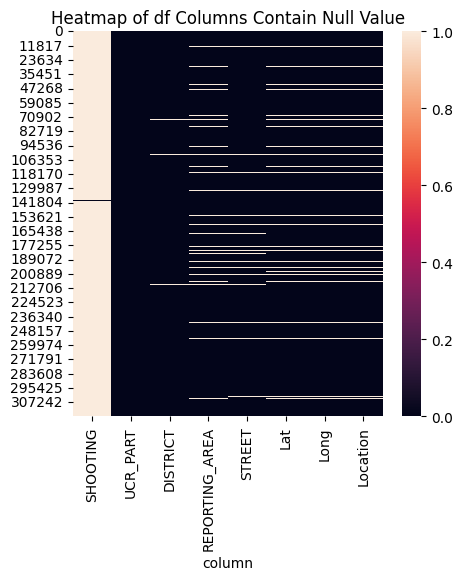

In [77]:
# Heatmap of df columns that contain null value
plt.figure(figsize=(5,5))
plt.title('Heatmap of df Columns Contain Null Value')
sns.heatmap(df[['SHOOTING','UCR_PART','DISTRICT','REPORTING_AREA','STREET','Lat','Long','Location']].isnull())
plt.xlabel('column')
plt.show()
# the results shows that there are correlation on some columns that contain null value,
# which are DISTRICT, REPORTING_AREA, STREET, Lat, Long, and Location column
# meanwhile, null value on SHOOTING and UCR_PART column hasn't correlation with the other column that contain null value

##### 1ST ITERATION

###### 1. SHOOTING
Let's handle the null value in the SHOOTING column first because it has the largest percentage of 99.68% According to df_cols_table, SHOOTING column has only one unique value, which is Y. We can interpret that the SHOOTING column is a column that indicates a shooting took place at each incident that responded by the BPD. Therefore, the null value in the SHOOTING column can be assumed that no shots have been fired at every incident handled by the BPD. Because the unique value in the SHOOTING column is Y, to fill in the incidents where there were no shots fired we use N.

In [78]:
# Fill null value on SHOOTING column with N (no shooting)
df['SHOOTING'].fillna(value='N', inplace=True)
df_null_table().iloc[[6]]
# the result shows that there aren't null value on SHOOTING column

columns  null count  null (%)
6  SHOOTING           0       0.0

###### 2. UCR_PART
Let's handle the null value in the UCR_PART. According to df_cols_table, UCR_PART column has 4 unique value which are PART ONE, PART TWO, PART THREE, and OTHER. However, UCR_PART classification must comply with the provisions on the UCR Handbook from the FBI for the entire Police Department at the United States. Since, UCR_PART on the UCR Handbook only classified into PART ONE and PART TWO we need to adjust the existing UCR_PART first.

In [79]:
# Import UCR Handbook from the FBI
ucr_handbook = pd.read_excel('ucr handbook.xlsx')
ucr_handbook['UCR PART'].value_counts().reset_index().rename(columns={'index':'UCR PART', 'UCR PART':'Count'}).sort_values('UCR PART')
# the result shows that UCR Handbook provide UCR PART categorization into PART ONE, JUSTIFIABLE PART ONE, PART TWO, and EXCLUDED

UCR PART  Count
2              EXCLUDED     23
3  JUSTIFIABLE PART ONE      1
1              PART ONE     62
0              PART TWO    135

In [80]:
# Display ucr_handbook
ucr_handbook
# the result shows that ucr_handbook consist of 3 columns which are UCR PART, OFFENSE CODE, and INCIDENT DESCRIPTION

UCR PART  OFFENSE CODE                          INCIDENT DESCRIPTION
0    PART ONE           404  A&B HANDS, FEET, ETC.  - MED. ATTENTION REQ.
1    PART ONE           900                                         ARSON
2    PART ONE           423                          ASSAULT - AGGRAVATED
3    PART ONE           413                ASSAULT - AGGRAVATED - BATTERY
4    PART ONE           402                 ASSAULT & BATTERY D/W - KNIFE
..        ...           ...                                           ...
216  EXCLUDED          3110            SERVICE TO OTHER PD OUTSIDE OF MA.
217  EXCLUDED          3007                                  SUDDEN DEATH
218  EXCLUDED          3008                     SUICIDE / SUICIDE ATTEMPT
219  EXCLUDED          3410                           TOWED MOTOR VEHICLE
220  EXCLUDED          3125                                WARRANT ARREST

[221 rows x 3 columns]

In [81]:
# Merge df with ucr_handbook
df = df.merge(ucr_handbook, how='left', left_on='OFFENSE_CODE', right_on='OFFENSE CODE').drop(['OFFENSE CODE','INCIDENT DESCRIPTION'], axis='columns')
df.head()
# the result shows that column UCR PART from ucr_handbook placed on the far right of the df

INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP   OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH  DAY DAY_OF_WEEK  HOUR    UCR_PART       STREET        Lat       Long                     Location  UCR PART
0      I182070945           619               LARCENY    LARCENY ALL OTHERS      D14            808        N  2018-09-02 13:00:00  2018      9    2      SUNDAY    13    PART ONE   LINCOLN ST  42.357791 -71.139371  (42.35779134, -71.13937053)  PART ONE
1      I182070943          1402             VANDALISM             VANDALISM      C11            347        N  2018-08-21 00:00:00  2018      8   21     TUESDAY     0    PART TWO     HECLA ST  42.306821 -71.060300  (42.30682138, -71.06030035)  PART TWO
2      I182070941          3410                 TOWED   TOWED MOTOR VEHICLE       D4            151        N  2018-09-03 19:27:00  2018      9    3      MONDAY    19  PART THREE  CAZENOVE ST  42.346589 -71.072429  (42.34658879, -71.07242943)  EXCLUDED
3      I182070940          3114  INVESTIGATE PROPERTY  INVESTIGATE PROPERTY       D4            272        N  2018-09-03 21:16:00  2018      9    3      MONDAY    21  PART THREE   NEWCOMB ST  42.334182 -71.078664  (42.33418175, -71.07866441)  PART TWO
4      I182070938          3114  INVESTIGATE PROPERTY  INVESTIGATE PROPERTY       B3            421        N  2018-09-03 21:05:00  2018      9    3      MONDAY    21  PART THREE     DELHI ST  42.275365 -71.090361  (42.27536542, -71.09036101)  PART TWO

In [82]:
# In order to make comparisons between column UCR_PART and UCR PART easier, we need to fix the column position
cols = df.columns.tolist()
cols = cols[0:14] + cols[-1:] + cols[14:-1]
df = df[cols]
df.head()
# the result shows column UCR_PART next to column UCR PART to make it easier to compare the values of both columns

INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP   OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH  DAY DAY_OF_WEEK  HOUR    UCR_PART  UCR PART       STREET        Lat       Long                     Location
0      I182070945           619               LARCENY    LARCENY ALL OTHERS      D14            808        N  2018-09-02 13:00:00  2018      9    2      SUNDAY    13    PART ONE  PART ONE   LINCOLN ST  42.357791 -71.139371  (42.35779134, -71.13937053)
1      I182070943          1402             VANDALISM             VANDALISM      C11            347        N  2018-08-21 00:00:00  2018      8   21     TUESDAY     0    PART TWO  PART TWO     HECLA ST  42.306821 -71.060300  (42.30682138, -71.06030035)
2      I182070941          3410                 TOWED   TOWED MOTOR VEHICLE       D4            151        N  2018-09-03 19:27:00  2018      9    3      MONDAY    19  PART THREE  EXCLUDED  CAZENOVE ST  42.346589 -71.072429  (42.34658879, -71.07242943)
3      I182070940          3114  INVESTIGATE PROPERTY  INVESTIGATE PROPERTY       D4            272        N  2018-09-03 21:16:00  2018      9    3      MONDAY    21  PART THREE  PART TWO   NEWCOMB ST  42.334182 -71.078664  (42.33418175, -71.07866441)
4      I182070938          3114  INVESTIGATE PROPERTY  INVESTIGATE PROPERTY       B3            421        N  2018-09-03 21:05:00  2018      9    3      MONDAY    21  PART THREE  PART TWO     DELHI ST  42.275365 -71.090361  (42.27536542, -71.09036101)

In [83]:
# Let's check the UCR_PART miss categorization from the existing df
df.groupby(['UCR PART','UCR_PART'])[['INCIDENT_NUMBER']].count()
# the result shows that some of proper UCR PART ONE being miss categorized as PART THREE and OTHER from the existing df,
# the proper JUSTIFIABLE UCR PART ONE being miss categorized as OTHER from the existing df,
# some of proper UCR PART TWO being miss categorized as PART THREE and OTHER from the existing df,
# and some of incident that EXCLUDED from UCR being miss categorized as OTHER from the existing df

INCIDENT_NUMBER
UCR PART             UCR_PART                   
EXCLUDED             PART THREE            63857
JUSTIFIABLE PART ONE OTHER                     1
PART ONE             OTHER                   103
                     PART ONE              61628
                     PART THREE             3019
PART TWO             OTHER                  1128
                     PART THREE            91661
                     PART TWO              97563

In [84]:
# Drop the UCR_PART column and rename the UCR PART column became UCR_PART column
df.drop(columns=['UCR_PART'], inplace=True)
df.rename(columns={'UCR PART': 'UCR_PART'}, inplace=True)
df.head(1)
# the result shows that the OFFENSE_DESCRIPTION column already dropped and the NAME column already renamed into OFFENSE_DESCRIPTION

INCIDENT_NUMBER  OFFENSE_CODE OFFENSE_CODE_GROUP OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH  DAY DAY_OF_WEEK  HOUR  UCR_PART      STREET        Lat       Long                     Location
0      I182070945           619            LARCENY  LARCENY ALL OTHERS      D14            808        N  2018-09-02 13:00:00  2018      9    2      SUNDAY    13  PART ONE  LINCOLN ST  42.357791 -71.139371  (42.35779134, -71.13937053)

In [85]:
# Let's check null value on UCR_PART column
df_null_table().iloc[[13]]
# the result shows that there aren't null value on UCR_PART column
# by merging ucr_handbook with df can overcome null values in the UCR_PART column
# this caused by each INCIDENT DESCRIPTION has been categorized in the proper UCR PART in accordance with the FBI rules

columns  null count  null (%)
13  UCR_PART           0       0.0

###### 3. DISTRICT
According to Heatmap of df columns that contain null value, DISTRICT column has correlation with REPORTING_AREA, STREET, Lat, Long, and Location column. Since DISTRICT column has the least amount of null value (1765 data) compared to REPORTING_AREA, STREET, Lat, Long, and Location column; let's prioritized handling null value on DISTRICT column among the other.

In order to fill null value on DISTRICT column, we need to refer back at REPORTING_AREA, STREET, Lat, Long, and Location column. Since Lat, Long, and Location column contain coordinate point which is a very specific point of the occurred incident location, we can first focus on using Location. Then STREET and REPORTING_AREA column which are more general to fill the null value on the DISTRICT column.

In [86]:
# Let's check Location column value in which DISTRICT column that contain null value
df[df['DISTRICT'].isnull() & ~df['Lat'].isnull() & ~df['Long'].isnull()
  & ~df['Location'].isnull()][['DISTRICT','Lat', 'Long', 'Location']].sort_values(['Location'])
# the result shows that there are 897 rows on DISTRICT column that contain null value with Location column non null value
# we need to fill the null value on DISTRICT column according to Location column non null value

DISTRICT        Lat       Long                     Location
186052      NaN  42.237226 -71.131902  (42.23722567, -71.13190217)
211504      NaN  42.252570 -71.109633  (42.25257033, -71.10963326)
1190        NaN  42.252610 -71.118332  (42.25261020, -71.11833242)
186601      NaN  42.253822 -71.140221  (42.25382178, -71.14022124)
312511      NaN  42.257949 -71.161229  (42.25794926, -71.16122880)
...         ...        ...        ...                          ...
203592      NaN  42.382124 -71.064728  (42.38212444, -71.06472807)
288979      NaN  42.382600 -71.039804  (42.38259978, -71.03980383)
208555      NaN  42.383585 -71.075361  (42.38358492, -71.07536138)
9209        NaN  42.385841 -71.077591  (42.38584106, -71.07759142)
153779      NaN  42.388445 -71.000408  (42.38844526, -71.00040800)

[897 rows x 4 columns]

In [87]:
# Let's fill null value on DISTRICT column using its mode according to Location column non null value
df.loc[df['DISTRICT'].isnull(), 'DISTRICT'] = df.groupby('Location')['DISTRICT'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['DISTRICT'].isnull() & ~df['Lat'].isnull() & ~df['Long'].isnull()
  & ~df['Location'].isnull()][['DISTRICT','Lat', 'Long', 'Location']].sort_values(['Location'])
# the result shows that there are 834 rows remaining null values on DISTRICT column with Location column non null value
# let's continue to fill null value on DISTRICT column considering REPORTING_AREA & STREET column non null value

DISTRICT        Lat       Long                     Location
186052      NaN  42.237226 -71.131902  (42.23722567, -71.13190217)
1190        NaN  42.252610 -71.118332  (42.25261020, -71.11833242)
186601      NaN  42.253822 -71.140221  (42.25382178, -71.14022124)
211609      NaN  42.258297 -71.160799  (42.25829702, -71.16079938)
171628      NaN  42.263633 -71.102686  (42.26363319, -71.10268624)
...         ...        ...        ...                          ...
212299      NaN  42.380542 -71.034095  (42.38054187, -71.03409477)
44572       NaN  42.381762 -71.066627  (42.38176159, -71.06662711)
203592      NaN  42.382124 -71.064728  (42.38212444, -71.06472807)
208555      NaN  42.383585 -71.075361  (42.38358492, -71.07536138)
153779      NaN  42.388445 -71.000408  (42.38844526, -71.00040800)

[834 rows x 4 columns]

In [88]:
# Let's check REPORTING_AREA & STREET column value in which DISTRICT column that contain null value
df[df['DISTRICT'].isnull() & ~df['REPORTING_AREA'].isnull() & ~df['STREET'].isnull()][['DISTRICT','REPORTING_AREA', 'STREET']].sort_values(['REPORTING_AREA','STREET'])
# the result shows that there are 17 rows on DISTRICT column that contain null value with REPORTING_AREA & STREET column non null value
# we need to fill the null value on DISTRICT column according to REPORTING_AREA & STREET column non null value

DISTRICT REPORTING_AREA                     STREET
158683      NaN             32                TOMAHAWK DR
21664       NaN             36                   HOTEL DR
182238      NaN             36                   HOTEL DR
156503      NaN             36                 TERMINAL C
43081       NaN             36         TRANSPORTATION WAY
185024      NaN             36         TRANSPORTATION WAY
185025      NaN             36         TRANSPORTATION WAY
185026      NaN             36         TRANSPORTATION WAY
317995      NaN            611             HUNTINGTON AVE
174677      NaN            611                 JAMAICAWAY
204495      NaN            914  MONSIGNOR DENNIS F O'CALL
228144      NaN            959             DORCHESTER AVE
248856      NaN            959             DORCHESTER AVE
248857      NaN            959             DORCHESTER AVE
265920      NaN            959             DORCHESTER AVE
268414      NaN            959             DORCHESTER AVE
268415      NaN            959             DORCHESTER AVE

In [89]:
# Let's fill null value on DISTRICT column using its mode according to REPORTING_AREA & STREET column non null value
df.loc[df['DISTRICT'].isnull(), 'DISTRICT'] = df.groupby(['STREET','REPORTING_AREA'])['DISTRICT'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['DISTRICT'].isnull() & ~df['REPORTING_AREA'].isnull() & ~df['STREET'].isnull()][['DISTRICT','REPORTING_AREA', 'STREET']].sort_values(['REPORTING_AREA','STREET'])
# the result shows that there are 4 remaining null values on DISTRICT column with REPORTING_AREA & STREET column non null value

DISTRICT REPORTING_AREA      STREET
21664       NaN             36    HOTEL DR
182238      NaN             36    HOTEL DR
156503      NaN             36  TERMINAL C
174677      NaN            611  JAMAICAWAY

In [90]:
# Let's check remaining REPORTING_AREA & STREET column non null value corresponding to DISTRICT column
df.groupby(['STREET','REPORTING_AREA'])[['DISTRICT']].agg(pd.Series.mode).loc[['HOTEL DR','TERMINAL C','JAMAICAWAY']]
# the result shows that remaining null values on DISTRICT column with REPORTING_AREA & STREET column non null value does contain a null value
# therefore we need to continue fill null value on DISTRICT column considering STREET column non null value only,
# it's because STREET column would represent better true value of a DISTRICT rather than REPORTING_AREA column

DISTRICT
STREET     REPORTING_AREA         
HOTEL DR   36                   []
TERMINAL C 36                   []
JAMAICAWAY 608                 E13
           610                 E13
           611                  []
           633                 E13
           634                 E13
           641                 E13

In [91]:
# Let's check STREET column value in which DISTRICT column that contain null value
df[df['DISTRICT'].isnull() & ~df['STREET'].isnull()][['DISTRICT','STREET']].sort_values(['STREET'])
# the result shows that there are 686 rows on DISTRICT column that contain null value with STREET column non null value
# we need to fill the null value on DISTRICT column according to STREET column non null value

DISTRICT            STREET
60474       NaN         ABBOT ST 
201363      NaN               ADA
92269       NaN            ALBANY
92268       NaN            ALBANY
9207        NaN            ALBANY
...         ...               ...
207916      NaN          WOODBINE
44218       NaN      WOODS MULLIN
275279      NaN  WOODWARD PARK ST
211944      NaN         WORCESTER
211945      NaN         WORCESTER

[686 rows x 2 columns]

In [92]:
# Let's fill null value on DISTRICT column using its mode according to STREET column non null value
df.loc[df['DISTRICT'].isnull(), 'DISTRICT'] = df.groupby('STREET')['DISTRICT'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['DISTRICT'].isnull() & ~df['STREET'].isnull()][['DISTRICT','STREET']].sort_values(['STREET'])
# the result shows that there are 418 remaining null values on DISTRICT column with STREET column non null value
# let's continue to fill null value on DISTRICT column considering REPORTING_AREA column non null value only,
# it's because REPORTING_AREA column also represent true value of a DISTRICT

DISTRICT        STREET
60474       NaN     ABBOT ST 
201363      NaN           ADA
92268       NaN        ALBANY
9207        NaN        ALBANY
21275       NaN        ALBANY
...         ...           ...
20          NaN       WOLCOTT
207916      NaN      WOODBINE
44218       NaN  WOODS MULLIN
211944      NaN     WORCESTER
211945      NaN     WORCESTER

[418 rows x 2 columns]

In [93]:
# Let's check REPORTING_AREA column value in which DISTRICT column that contain null value
df[df['DISTRICT'].isnull() & ~df['REPORTING_AREA'].isnull()][['DISTRICT','REPORTING_AREA']].sort_values(['REPORTING_AREA'])
# the result shows that there are 13 rows on DISTRICT column that contain null value with REPORTING_AREA column non null value
# we need to fill the null value on DISTRICT column according to REPORTING_AREA column non null value

DISTRICT REPORTING_AREA
244149      NaN            184
244150      NaN            184
148239      NaN            222
148240      NaN            222
227348      NaN            295
227349      NaN            295
227350      NaN            295
21664       NaN             36
156503      NaN             36
182238      NaN             36
270904      NaN            462
270905      NaN            462
270906      NaN            462

In [94]:
# Let's fill null value on DISTRICT column using its mode according to REPORTING_AREA column non null value
df.loc[df['DISTRICT'].isnull(), 'DISTRICT'] = df.groupby('REPORTING_AREA')['DISTRICT'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['DISTRICT'].isnull() & ~df['REPORTING_AREA'].isnull()][['DISTRICT','REPORTING_AREA']].sort_values(['REPORTING_AREA'])
# the result shows that there aren't remaining null values on DISTRICT column with REPORTING_AREA column non null value

Empty DataFrame
Columns: [DISTRICT, REPORTING_AREA]
Index: []

In [95]:
# Let's check remaining null value on DISTRICT column
df[df['DISTRICT'].isnull()]
# the result shows that there are 1408 null value on DISTRICT column
# we have successfully handled 357 null values on DISTRICT column

INCIDENT_NUMBER  OFFENSE_CODE               OFFENSE_CODE_GROUP                          OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH  DAY DAY_OF_WEEK  HOUR  UCR_PART    STREET        Lat       Long                     Location
15          I182070920          3006               MEDICAL ASSISTANCE                SICK/INJURED/MEDICAL - PERSON      NaN            NaN        N  2018-09-03 19:43:00  2018      9    3      MONDAY    19  PART TWO       NaN  42.352875 -71.073830  (42.35287456, -71.07382970)
20          I182070913          3006               MEDICAL ASSISTANCE                SICK/INJURED/MEDICAL - PERSON      NaN            NaN        N  2018-09-03 18:46:00  2018      9    3      MONDAY    18  PART TWO   WOLCOTT        NaN        NaN                          NaN
25          I182070906          3831  MOTOR VEHICLE ACCIDENT RESPONSE        M/V - LEAVING SCENE - PROPERTY DAMAGE      NaN            NaN        N  2018-09-03 18:20:00  2018      9    3      MONDAY    18  EXCLUDED       NaN  42.283593 -71.055657  (42.28359328, -71.05565683)
39          I182070889          1843                   DRUG VIOLATION                    DRUGS - PRESENT AT HEROIN      NaN            NaN        N  2018-09-03 18:05:00  2018      9    3      MONDAY    18  PART TWO       NaN  42.306769 -71.084319  (42.30676881, -71.08431925)
40          I182070889          3125                  WARRANT ARRESTS                               WARRANT ARREST      NaN            NaN        N  2018-09-03 18:05:00  2018      9    3      MONDAY    18  EXCLUDED       NaN  42.306769 -71.084319  (42.30676881, -71.08431925)
...                ...           ...                              ...                                          ...      ...            ...      ...                  ...   ...    ...  ...         ...   ...       ...       ...        ...        ...                          ...
318337      I152049991          1503               FIREARM VIOLATIONS  WEAPON - OTHER - CARRYING / POSSESSING, ETC      NaN            NaN        N  2015-06-16 18:35:00  2015      6   16     TUESDAY    18  PART TWO  HAMILTON        NaN        NaN                          NaN
318338      I152049991          1842                   DRUG VIOLATION         DRUGS - POSS CLASS A - HEROIN, ETC.       NaN            NaN        N  2015-06-16 18:35:00  2015      6   16     TUESDAY    18  PART TWO  HAMILTON        NaN        NaN                          NaN
318528      I152049734          1845                   DRUG VIOLATION                         DRUGS - POSS CLASS D      NaN            NaN        N  2015-06-15 19:00:00  2015      6   15      MONDAY    19  PART TWO       NaN        NaN        NaN                          NaN
318551      I152049699          3802  MOTOR VEHICLE ACCIDENT RESPONSE               M/V ACCIDENT - PROPERTY DAMAGE      NaN            NaN        N  2015-06-15 17:13:00  2015      6   15      MONDAY    17  EXCLUDED       NaN        NaN        NaN                          NaN
318601      I152049621           614       LARCENY FROM MOTOR VEHICLE        LARCENY THEFT FROM MV - NON-ACCESSORY      NaN            NaN        N  2015-06-15 11:30:00  2015      6   15      MONDAY    11  PART ONE   NEWCOMB        NaN        NaN                          NaN

[1408 rows x 18 columns]

###### 4. STREET
STREET column has the second least amount of null value (10875 data) compared to DISTRICT, REPORTING_AREA, Lat, Long, and Location column; therefore, we prioritized handling null value on STREET column at this section.

In order to fill null value on STREET column, we need to refer back at DISTRICT, REPORTING_AREA, Lat, Long, and Location column. Since Lat, Long, and Location column contain coordinate point which is a very specific point of the occurred incident location, we can first focus on it. Then using DISTRICT and REPORTING_AREA column which are more general to fill the null value on the STREET column.

In [96]:
# Let's check Location column value in which STREET column that contain null value
df[df['STREET'].isnull() & ~df['Location'].isnull()][['STREET','Lat','Long','Location']].sort_values(['Location'])
# the result shows that there are 1781 rows on STREET column that contain null value with Location column non null value
# we need to fill the null value on STREET column according to Location column non null value

STREET        Lat       Long                     Location
186052    NaN  42.237226 -71.131902  (42.23722567, -71.13190217)
1190      NaN  42.252610 -71.118332  (42.25261020, -71.11833242)
186601    NaN  42.253822 -71.140221  (42.25382178, -71.14022124)
211609    NaN  42.258297 -71.160799  (42.25829702, -71.16079938)
126477    NaN  42.262470 -71.155784  (42.26247002, -71.15578436)
...       ...        ...        ...                          ...
185571    NaN  42.382617 -71.039303  (42.38261747, -71.03930347)
203604    NaN  42.382617 -71.039303  (42.38261747, -71.03930347)
177822    NaN  42.382617 -71.039303  (42.38261747, -71.03930347)
208555    NaN  42.383585 -71.075361  (42.38358492, -71.07536138)
153779    NaN  42.388445 -71.000408  (42.38844526, -71.00040800)

[1781 rows x 4 columns]

In [97]:
# Let's fill null value on STREET column using its mode according to Location column non null value
df.loc[df['STREET'].isnull(), 'STREET'] = df.groupby('Location')['STREET'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['STREET'].isnull() & ~df['Location'].isnull()][['STREET','Lat','Long','Location']].sort_values(['Location'])
# the result shows that there are 1781 rows remaining null values on STREET column with Location column non null value
# since there is no change in the number of rows after STREET column being filled with the mode of Location column non null value
# it indicated that remaining null values on STREET column with Location column non null value does contain a null value
# let's continue to fill null value on STREET column considering DISTRICT & REPORTING_AREA column non null value

STREET        Lat       Long                     Location
186052    NaN  42.237226 -71.131902  (42.23722567, -71.13190217)
1190      NaN  42.252610 -71.118332  (42.25261020, -71.11833242)
186601    NaN  42.253822 -71.140221  (42.25382178, -71.14022124)
211609    NaN  42.258297 -71.160799  (42.25829702, -71.16079938)
126477    NaN  42.262470 -71.155784  (42.26247002, -71.15578436)
...       ...        ...        ...                          ...
185571    NaN  42.382617 -71.039303  (42.38261747, -71.03930347)
203604    NaN  42.382617 -71.039303  (42.38261747, -71.03930347)
177822    NaN  42.382617 -71.039303  (42.38261747, -71.03930347)
208555    NaN  42.383585 -71.075361  (42.38358492, -71.07536138)
153779    NaN  42.388445 -71.000408  (42.38844526, -71.00040800)

[1781 rows x 4 columns]

In [98]:
# Let's check DISTRICT & REPORTING_AREA column value in which STREET column contain null value
df[df['STREET'].isnull() & ~df['DISTRICT'].isnull() & ~df['REPORTING_AREA'].isnull()][['DISTRICT','REPORTING_AREA', 'STREET']].sort_values(['DISTRICT','REPORTING_AREA'])
# the result shows that there are 971 rows on STREET column that contain null value with DISTRICT & REPORTING_AREA column non null value
# we need to fill the null value on STREET column according to DISTRICT & REPORTING_AREA non null value

DISTRICT REPORTING_AREA STREET
272161       A1            101    NaN
297803       A1            104    NaN
15148        A1            109    NaN
175334       A1            111    NaN
163457       A1            116    NaN
...         ...            ...    ...
270572       E5            691    NaN
63989        E5            705    NaN
302418       E5            713    NaN
165049       E5            748    NaN
52240        E5            783    NaN

[971 rows x 3 columns]

In [99]:
# Let's fill null value on STREET column using its mode according to DISTRICT & REPORTING_AREA column non null value
df.loc[df['STREET'].isnull(), 'STREET'] = df.groupby(['DISTRICT','REPORTING_AREA'])['STREET'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['STREET'].isnull() & ~df['DISTRICT'].isnull() & ~df['REPORTING_AREA'].isnull()][['DISTRICT','REPORTING_AREA', 'STREET']].sort_values(['DISTRICT','REPORTING_AREA'])
# the result shows that there are 194 remaining null values on STREET column with DISTRICT & REPORTING_AREA column non null value

DISTRICT REPORTING_AREA STREET
142819       A1            131    NaN
180078       A1            131    NaN
115170       A1            133    NaN
205689       A1            142    NaN
264865       A1            146    NaN
...         ...            ...    ...
231235       E5            436    NaN
123236       E5            501    NaN
218448       E5            508    NaN
280928       E5            574    NaN
52240        E5            783    NaN

[194 rows x 3 columns]

In [100]:
# Let's check remaining DISTRICT & REPORTING_AREA column non null value corresponding to STREET column
df.groupby(['DISTRICT','REPORTING_AREA'])[['STREET']].agg(pd.Series.mode).loc['A1'].loc[['131','133','142','146']]
# the result shows that remaining null values on STREET column with DISTRICT & REPORTING_AREA column non null value does contain a null value
# therefore we need to continue fill null value on STREET column considering DISTRICT column non null value only,
# it's because STREET column would represent better true value of a DISTRICT rather than REPORTING_AREA column

STREET
REPORTING_AREA       
131                []
133                []
142                []
146                []

In [101]:
# Let's check DISTRICT column value in which STREET column that contain null value
df[df['STREET'].isnull() & ~df['DISTRICT'].isnull()][['DISTRICT', 'STREET']].sort_values(['DISTRICT'])
# the result shows that there are 8911 rows on STREET column that contain null value with REPORTING_AREA column non null value
# we need to fill the null value on STREET column according to DISTRICT column non null value

DISTRICT STREET
195742       A1    NaN
144339       A1    NaN
144338       A1    NaN
144273       A1    NaN
206829       A1    NaN
...         ...    ...
142784       E5    NaN
142783       E5    NaN
234449       E5    NaN
149742       E5    NaN
181814       E5    NaN

[9105 rows x 2 columns]

In [102]:
# Let's fill null value on STREET column using its mode according to DISTRICT column non null value
df.loc[df['STREET'].isnull(), 'STREET'] = df.groupby('DISTRICT')['STREET'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['STREET'].isnull() & ~df['DISTRICT'].isnull()][['DISTRICT', 'STREET']].sort_values(['DISTRICT'])
# the result shows that there aren't remaining null values on STREET column with DISTRICT column non null value
# let's continue to fill null value on STREET column considering REPORTING_AREA column non null value only,
# it's because REPORTING_AREA column also represent true value of a STREET

Empty DataFrame
Columns: [DISTRICT, STREET]
Index: []

In [103]:
# Let's check REPORTING_AREA column value in which STREET column that contain null value
df.loc[df['STREET'].isnull(), 'STREET'] = df.groupby('REPORTING_AREA')['STREET'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['STREET'].isnull() & ~df['REPORTING_AREA'].isnull()][['REPORTING_AREA', 'STREET']].sort_values(['REPORTING_AREA'])
# the result shows that there aren't row on STREET column that contain null value with REPORTING_AREA column non null value
# we don't need to fill the null value on STREET column according to REPORTING_AREA column non null value

Empty DataFrame
Columns: [REPORTING_AREA, STREET]
Index: []

In [104]:
# Let's check remaining null value on STREET column
df[df['STREET'].isnull()]
# the result shows that there are 993 null value on STREET column
# we have successfully handled 9882 null values on STREET column

INCIDENT_NUMBER  OFFENSE_CODE               OFFENSE_CODE_GROUP                             OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH  DAY DAY_OF_WEEK  HOUR  UCR_PART STREET        Lat       Long                     Location
15          I182070920          3006               MEDICAL ASSISTANCE                   SICK/INJURED/MEDICAL - PERSON      NaN            NaN        N  2018-09-03 19:43:00  2018      9    3      MONDAY    19  PART TWO    NaN  42.352875 -71.073830  (42.35287456, -71.07382970)
25          I182070906          3831  MOTOR VEHICLE ACCIDENT RESPONSE           M/V - LEAVING SCENE - PROPERTY DAMAGE      NaN            NaN        N  2018-09-03 18:20:00  2018      9    3      MONDAY    18  EXCLUDED    NaN  42.283593 -71.055657  (42.28359328, -71.05565683)
39          I182070889          1843                   DRUG VIOLATION                       DRUGS - PRESENT AT HEROIN      NaN            NaN        N  2018-09-03 18:05:00  2018      9    3      MONDAY    18  PART TWO    NaN  42.306769 -71.084319  (42.30676881, -71.08431925)
40          I182070889          3125                  WARRANT ARRESTS                                  WARRANT ARREST      NaN            NaN        N  2018-09-03 18:05:00  2018      9    3      MONDAY    18  EXCLUDED    NaN  42.306769 -71.084319  (42.30676881, -71.08431925)
41          I182070889          1841                   DRUG VIOLATION  DRUGS - POSS CLASS A - INTENT TO MFR DIST DISP      NaN            NaN        N  2018-09-03 18:05:00  2018      9    3      MONDAY    18  PART TWO    NaN  42.306769 -71.084319  (42.30676881, -71.08431925)
...                ...           ...                              ...                                             ...      ...            ...      ...                  ...   ...    ...  ...         ...   ...       ...    ...        ...        ...                          ...
317554      I152050973          1402                        VANDALISM                                       VANDALISM      NaN            NaN        N  2015-06-15 16:00:00  2015      6   15      MONDAY    16  PART TWO    NaN        NaN        NaN                          NaN
318005      I152050430          2905                       VIOLATIONS                 VAL - OPERATING WITHOUT LICENSE      NaN            NaN        N  2015-06-18 07:05:00  2015      6   18    THURSDAY     7  PART TWO    NaN        NaN        NaN                          NaN
318302      I152050042           802                   SIMPLE ASSAULT                        ASSAULT SIMPLE - BATTERY      NaN            NaN        N  2015-06-16 21:33:00  2015      6   16     TUESDAY    21  PART TWO    NaN        NaN        NaN                          NaN
318528      I152049734          1845                   DRUG VIOLATION                            DRUGS - POSS CLASS D      NaN            NaN        N  2015-06-15 19:00:00  2015      6   15      MONDAY    19  PART TWO    NaN        NaN        NaN                          NaN
318551      I152049699          3802  MOTOR VEHICLE ACCIDENT RESPONSE                  M/V ACCIDENT - PROPERTY DAMAGE      NaN            NaN        N  2015-06-15 17:13:00  2015      6   15      MONDAY    17  EXCLUDED    NaN        NaN        NaN                          NaN

[993 rows x 18 columns]

###### 5. REPORTING_AREA
REPORTING_AREA column has the third least amount of null value (20263 data) compared to DISTRICT, STREET, Lat, Long, and Location column; therefore, we prioritized handling null value on REPORTING_AREA column at this section.

In order to fill null value on REPORTING_AREA column, we need to refer back at DISTRICT, STREET, Lat, Long, and Location column. Since Lat, Long, and Location column contain coordinate point which is a very specific point of the occurred incident location, we can first focus on it. Then using DISTRICT and STREET column which are more general to fill the null value on the REPORTING_AREA column.

In [105]:
# Let's check Location column value in which REPORTING_AREA column that contain null value
df[df['REPORTING_AREA'].isnull() & ~df['Lat'].isnull() & ~df['Long'].isnull()
  & ~df['Location'].isnull()][['REPORTING_AREA','Lat', 'Long', 'Location']].sort_values(['Location'])
# the result shows that there are 2085 rows on REPORTING_AREA column that contain null value with Location column non null value
# we need to fill the null value on REPORTING_AREA column according to Location column non null value

REPORTING_AREA        Lat       Long                     Location
186052            NaN  42.237226 -71.131902  (42.23722567, -71.13190217)
1190              NaN  42.252610 -71.118332  (42.25261020, -71.11833242)
186601            NaN  42.253822 -71.140221  (42.25382178, -71.14022124)
211609            NaN  42.258297 -71.160799  (42.25829702, -71.16079938)
220959            NaN  42.262470 -71.155784  (42.26247002, -71.15578436)
...               ...        ...        ...                          ...
185571            NaN  42.382617 -71.039303  (42.38261747, -71.03930347)
177822            NaN  42.382617 -71.039303  (42.38261747, -71.03930347)
208555            NaN  42.383585 -71.075361  (42.38358492, -71.07536138)
9209              NaN  42.385841 -71.077591  (42.38584106, -71.07759142)
153779            NaN  42.388445 -71.000408  (42.38844526, -71.00040800)

[2085 rows x 4 columns]

In [106]:
# Let's fill null value on REPORTING_AREA column using its mode according to Location column non null value
df.loc[df['REPORTING_AREA'].isnull(), 'REPORTING_AREA'] = df.groupby('Location')['REPORTING_AREA'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['REPORTING_AREA'].isnull() & ~df['Lat'].isnull() & ~df['Long'].isnull()
  & ~df['Location'].isnull()][['REPORTING_AREA','Lat', 'Long', 'Location']].sort_values(['Location'])
# the result shows that there are 1990 rows remaining null values on REPORTING_AREA column with Location column non null value
# let's continue to fill null value on REPORTING_AREA column considering DISTRICT & STREET column non null value only,

REPORTING_AREA        Lat       Long                     Location
186052            NaN  42.237226 -71.131902  (42.23722567, -71.13190217)
1190              NaN  42.252610 -71.118332  (42.25261020, -71.11833242)
186601            NaN  42.253822 -71.140221  (42.25382178, -71.14022124)
211609            NaN  42.258297 -71.160799  (42.25829702, -71.16079938)
220960            NaN  42.262470 -71.155784  (42.26247002, -71.15578436)
...               ...        ...        ...                          ...
203604            NaN  42.382617 -71.039303  (42.38261747, -71.03930347)
177822            NaN  42.382617 -71.039303  (42.38261747, -71.03930347)
185571            NaN  42.382617 -71.039303  (42.38261747, -71.03930347)
208555            NaN  42.383585 -71.075361  (42.38358492, -71.07536138)
153779            NaN  42.388445 -71.000408  (42.38844526, -71.00040800)

[1990 rows x 4 columns]

In [107]:
# Let's check DISTRICT & STREET column value in which REPORTING_AREA column that contain null value
df[df['REPORTING_AREA'].isnull() & ~df['DISTRICT'].isnull() & ~df['STREET'].isnull()][['DISTRICT', 'STREET','REPORTING_AREA']].sort_values(['DISTRICT','STREET'])
# the result shows that there are 18855 rows on REPORTING_AREA column that contain null value with DISTRICT & STREET column non null value
# we need to fill the null value on REPORTING_AREA column according to DISTRICT & STREET column non null value

DISTRICT                  STREET REPORTING_AREA
291498       A1             ACCOLON WAY            NaN
76581        A1             ANDERSON ST            NaN
102391       A1             ANDERSON ST            NaN
26894        A1  ANTHONY RIP VALENTI WA            NaN
113932       A1  ANTHONY RIP VALENTI WA            NaN
...         ...                     ...            ...
124878       E5                 WELD ST            NaN
143477       E5                 WELD ST            NaN
79506        E5            WEST ROXBURY            NaN
109998       E5            WEST ROXBURY            NaN
151571       E5            WEST ROXBURY            NaN

[18760 rows x 3 columns]

In [108]:
# Let's fill null value on REPORTING_AREA column using its mode according to DISTRICT & STREET column non null value
df.loc[df['REPORTING_AREA'].isnull(), 'REPORTING_AREA'] = df.groupby(['DISTRICT','STREET'])['REPORTING_AREA'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['REPORTING_AREA'].isnull() & ~df['DISTRICT'].isnull() & ~df['STREET'].isnull()][['DISTRICT', 'STREET','REPORTING_AREA']].sort_values(['DISTRICT','STREET'])
# the result shows that there are 1027 remaining null values on REPORTING_AREA column with DISTRICT & STREET column non null value

DISTRICT                  STREET REPORTING_AREA
291498       A1             ACCOLON WAY            NaN
26894        A1  ANTHONY RIP VALENTI WA            NaN
113932       A1  ANTHONY RIP VALENTI WA            NaN
123585       A1  ANTHONY RIP VALENTI WA            NaN
125273       A1  ANTHONY RIP VALENTI WA            NaN
...         ...                     ...            ...
266168       E5          W ROXBURY PKWY            NaN
275111       E5          W ROXBURY PKWY            NaN
79506        E5            WEST ROXBURY            NaN
109998       E5            WEST ROXBURY            NaN
151571       E5            WEST ROXBURY            NaN

[1027 rows x 3 columns]

In [109]:
# Let's check remaining DISTRICT & STREET column non null value corresponding to REPORTING_AREA column
df.groupby(['STREET','DISTRICT'])[['REPORTING_AREA']].agg(pd.Series.mode).loc[['ACCOLON WAY','ANTHONY RIP VALENTI WA','W ROXBURY PKWY','WEST ROXBURY']]
# the result shows that remaining null values on REPORTING_AREA column with DISTRICT & STREET column non null value does contain a null value
# therefore we need to continue fill null value on REPORTING_AREA column considering DISTRICT column non null value only,
# it's because STREET column would represent better true value of a DISTRICT rather than STREET column

REPORTING_AREA
STREET                 DISTRICT               
ACCOLON WAY            A1                   []
ANTHONY RIP VALENTI WA A1                   []
W ROXBURY PKWY         E5                   []
WEST ROXBURY           E5                   []

In [110]:
# Let's check REPORTING_AREA column value in which DISTRICT column that contain null value
df[df['REPORTING_AREA'].isnull() & ~df['DISTRICT'].isnull()][['DISTRICT','REPORTING_AREA']].sort_values(['DISTRICT'])
# the result shows that there are 1027 rows on REPORTING_AREA column that contain null value with DISTRICT column non null value
# we need to fill the null value on REPORTING_AREA column according to DISTRICT column non null value

DISTRICT REPORTING_AREA
252          A1            NaN
184684       A1            NaN
184670       A1            NaN
184462       A1            NaN
184350       A1            NaN
...         ...            ...
79506        E5            NaN
289095       E5            NaN
112913       E5            NaN
70176        E5            NaN
275994       E5            NaN

[1027 rows x 2 columns]

In [111]:
# Let's fill null value on REPORTING_AREA column using its mode according to DISTRICT column non null value
df.loc[df['REPORTING_AREA'].isnull(), 'REPORTING_AREA'] = df.groupby('DISTRICT')['REPORTING_AREA'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['REPORTING_AREA'].isnull() & ~df['DISTRICT'].isnull()][['DISTRICT','REPORTING_AREA']].sort_values(['DISTRICT'])
# the result shows that there aren't remaining null values on REPORTING_AREA column with DISTRICT column non null value
# let's continue to fill null value on REPORTING_AREA column considering STREET column non null value only,
# it's because STREET column also represent true value of a REPORTING_AREA

Empty DataFrame
Columns: [DISTRICT, REPORTING_AREA]
Index: []

In [112]:
# Let's check REPORTING_AREA column value in which STREET column that contain null value
df[df['REPORTING_AREA'].isnull() & ~df['STREET'].isnull()][['STREET','REPORTING_AREA']].sort_values(['STREET'])
# the result shows that there are 415 rows on REPORTING_AREA column that contain null value with STREET column non null value
# we need to fill the null value on REPORTING_AREA column according to STREET column non null value

STREET REPORTING_AREA
60474      ABBOT ST             NaN
201363           ADA            NaN
92268         ALBANY            NaN
9207          ALBANY            NaN
92269         ALBANY            NaN
...              ...            ...
20           WOLCOTT            NaN
207916      WOODBINE            NaN
44218   WOODS MULLIN            NaN
211944     WORCESTER            NaN
211945     WORCESTER            NaN

[415 rows x 2 columns]

In [113]:
# Let's fill null value on REPORTING_AREA column using its mode according to STREET column non null value
df.loc[df['REPORTING_AREA'].isnull(), 'REPORTING_AREA'] = df.groupby('STREET')['REPORTING_AREA'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['REPORTING_AREA'].isnull() & ~df['STREET'].isnull()][['STREET','REPORTING_AREA']].sort_values(['STREET'])
# the result shows that there are 415 remaining null values on REPORTING_AREA column with STREET column non null value
# since there is no change in the number of rows after REPORTING_AREA column being filled with the mode of STREET column non null value
# it indicated that remaining null values on REPORTING_AREA column with STREET column non null value does contain a null value

STREET REPORTING_AREA
60474      ABBOT ST             NaN
201363           ADA            NaN
92268         ALBANY            NaN
9207          ALBANY            NaN
92269         ALBANY            NaN
...              ...            ...
20           WOLCOTT            NaN
207916      WOODBINE            NaN
44218   WOODS MULLIN            NaN
211944     WORCESTER            NaN
211945     WORCESTER            NaN

[415 rows x 2 columns]

In [114]:
# Let's check remaining null value on REPORTING_AREA column
df[df['REPORTING_AREA'].isnull()]
# the result shows that there are 1408 null value on REPORTING_AREA column
# we have successfully handled 18855 null values on REPORTING_AREA column

INCIDENT_NUMBER  OFFENSE_CODE               OFFENSE_CODE_GROUP                          OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH  DAY DAY_OF_WEEK  HOUR  UCR_PART    STREET        Lat       Long                     Location
15          I182070920          3006               MEDICAL ASSISTANCE                SICK/INJURED/MEDICAL - PERSON      NaN            NaN        N  2018-09-03 19:43:00  2018      9    3      MONDAY    19  PART TWO       NaN  42.352875 -71.073830  (42.35287456, -71.07382970)
20          I182070913          3006               MEDICAL ASSISTANCE                SICK/INJURED/MEDICAL - PERSON      NaN            NaN        N  2018-09-03 18:46:00  2018      9    3      MONDAY    18  PART TWO   WOLCOTT        NaN        NaN                          NaN
25          I182070906          3831  MOTOR VEHICLE ACCIDENT RESPONSE        M/V - LEAVING SCENE - PROPERTY DAMAGE      NaN            NaN        N  2018-09-03 18:20:00  2018      9    3      MONDAY    18  EXCLUDED       NaN  42.283593 -71.055657  (42.28359328, -71.05565683)
39          I182070889          1843                   DRUG VIOLATION                    DRUGS - PRESENT AT HEROIN      NaN            NaN        N  2018-09-03 18:05:00  2018      9    3      MONDAY    18  PART TWO       NaN  42.306769 -71.084319  (42.30676881, -71.08431925)
40          I182070889          3125                  WARRANT ARRESTS                               WARRANT ARREST      NaN            NaN        N  2018-09-03 18:05:00  2018      9    3      MONDAY    18  EXCLUDED       NaN  42.306769 -71.084319  (42.30676881, -71.08431925)
...                ...           ...                              ...                                          ...      ...            ...      ...                  ...   ...    ...  ...         ...   ...       ...       ...        ...        ...                          ...
318337      I152049991          1503               FIREARM VIOLATIONS  WEAPON - OTHER - CARRYING / POSSESSING, ETC      NaN            NaN        N  2015-06-16 18:35:00  2015      6   16     TUESDAY    18  PART TWO  HAMILTON        NaN        NaN                          NaN
318338      I152049991          1842                   DRUG VIOLATION         DRUGS - POSS CLASS A - HEROIN, ETC.       NaN            NaN        N  2015-06-16 18:35:00  2015      6   16     TUESDAY    18  PART TWO  HAMILTON        NaN        NaN                          NaN
318528      I152049734          1845                   DRUG VIOLATION                         DRUGS - POSS CLASS D      NaN            NaN        N  2015-06-15 19:00:00  2015      6   15      MONDAY    19  PART TWO       NaN        NaN        NaN                          NaN
318551      I152049699          3802  MOTOR VEHICLE ACCIDENT RESPONSE               M/V ACCIDENT - PROPERTY DAMAGE      NaN            NaN        N  2015-06-15 17:13:00  2015      6   15      MONDAY    17  EXCLUDED       NaN        NaN        NaN                          NaN
318601      I152049621           614       LARCENY FROM MOTOR VEHICLE        LARCENY THEFT FROM MV - NON-ACCESSORY      NaN            NaN        N  2015-06-15 11:30:00  2015      6   15      MONDAY    11  PART ONE   NEWCOMB        NaN        NaN                          NaN

[1408 rows x 18 columns]

###### 6. Location
Location column has the most amount of null value (20743 data) compared to DISTRICT, STREET, and REPORTING AREA. The number of null value on Location column same as on the Lat and Long column. Since Lat and Long column represent Latitude point and Longitude point of Location column, let's prioritized handling null value on Location column at this section.

In order to fill null value on Location column, we need to refer back at DISTRICT, REPORTING_AREA, and STREET column. We can first focus on using DISTRICT, STREET, and REPORTING_AREA column simultaneously to fill the null value on the Location column.

In [115]:
# Let's check DISTRICT, REPORTING_AREA, & STREET column value in which Location column that contain null value
df[df['Location'].isnull() & ~df['DISTRICT'].isnull() & ~df['REPORTING_AREA'].isnull()
    & ~df['STREET'].isnull()][['DISTRICT','REPORTING_AREA', 'STREET', 'Lat', 'Long', 'Location'
    ]].sort_values(['DISTRICT','REPORTING_AREA','STREET','Location'])
# the result shows that there are 20156 rows on Location column that contain null value with DISTRICT, REPORTING_AREA, & STREET column non null value
# we need to fill the null value on Location column according to DISTRICT, REPORTING_AREA, & STREET column non null value

DISTRICT REPORTING_AREA          STREET  Lat  Long Location
40161        A1            100        BROAD ST  NaN   NaN      NaN
1207         A1            100      LIBERTY SQ  NaN   NaN      NaN
52278        A1            100      LIBERTY SQ  NaN   NaN      NaN
102604       A1            100      LIBERTY SQ  NaN   NaN      NaN
104964       A1            101      CENTRAL ST  NaN   NaN      NaN
...         ...            ...             ...  ...   ...      ...
275111       E5            822  W ROXBURY PKWY  NaN   NaN      NaN
79506        E5            822    WEST ROXBURY  NaN   NaN      NaN
109998       E5            822    WEST ROXBURY  NaN   NaN      NaN
151571       E5            822    WEST ROXBURY  NaN   NaN      NaN
95048        E5            910   BEECHLAND CIR  NaN   NaN      NaN

[20156 rows x 6 columns]

In [116]:
# Let's fill null value on Location column using its mode according to DISTRICT, REPORTING_AREA, & STREET column non null value
df.loc[df['Location'].isnull(), 'Location'] = df.groupby(['DISTRICT','REPORTING_AREA','STREET'])['Location'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['Location'].isnull() & ~df['DISTRICT'].isnull() & ~df['REPORTING_AREA'].isnull()
    & ~df['STREET'].isnull()][['DISTRICT','REPORTING_AREA', 'STREET', 'Lat', 'Long', 'Location'
    ]].sort_values(['DISTRICT','REPORTING_AREA','STREET','Location'])
# the result shows that there are 1847 remaining null values on Location column with DISTRICT, REPORTING_AREA, & STREET column non null value

DISTRICT REPORTING_AREA                  STREET  Lat  Long Location
207650       A1            111             NEW SUDBURY  NaN   NaN      NaN
291498       A1            112             ACCOLON WAY  NaN   NaN      NaN
26894        A1            112  ANTHONY RIP VALENTI WA  NaN   NaN      NaN
113932       A1            112  ANTHONY RIP VALENTI WA  NaN   NaN      NaN
123585       A1            112  ANTHONY RIP VALENTI WA  NaN   NaN      NaN
...         ...            ...                     ...  ...   ...      ...
266168       E5            822          W ROXBURY PKWY  NaN   NaN      NaN
275111       E5            822          W ROXBURY PKWY  NaN   NaN      NaN
79506        E5            822            WEST ROXBURY  NaN   NaN      NaN
109998       E5            822            WEST ROXBURY  NaN   NaN      NaN
151571       E5            822            WEST ROXBURY  NaN   NaN      NaN

[1847 rows x 6 columns]

In [117]:
# Let's check remaining DISTRICT, REPORTING_AREA, & STREET column non null value corresponding to Location column
df.groupby(['STREET','REPORTING_AREA','DISTRICT'])[['Location']].agg(pd.Series.mode).loc[['NEW SUDBURY','ACCOLON WAY','ANTHONY RIP VALENTI WA','W ROXBURY PKWY']]
# the result shows that remaining null values on Location column with DISTRICT, REPORTING_AREA, & STREET column non null value does contain a null value
# therefore we need to continue fill null value on Location column considering DISTRICT & STREET column non null value only,
# it's because DISTRICT & STREET column would represent better true value of a Location rather than DISTRICT & REPORTING_AREA column

Location
STREET                 REPORTING_AREA DISTRICT         
NEW SUDBURY            111            A1             []
                       134            D4             []
                       165            D4             []
ACCOLON WAY            112            A1             []
ANTHONY RIP VALENTI WA 112            A1             []
W ROXBURY PKWY         822            E5             []

In [118]:
# Let's check DISTRICT & STREET column value in which Location column that contain null value
df[df['Location'].isnull() & ~df['DISTRICT'].isnull() & ~df['STREET'].isnull()][['DISTRICT', 
    'STREET', 'Lat', 'Long', 'Location']].sort_values(['DISTRICT','STREET','Location'])
# the result shows that there are 1847 rows on Location column that contain null value with DISTRICT & STREET column non null value
# we need to fill the null value on Location column according to DISTRICT & STREET column non null value

DISTRICT                  STREET  Lat  Long Location
291498       A1             ACCOLON WAY  NaN   NaN      NaN
26894        A1  ANTHONY RIP VALENTI WA  NaN   NaN      NaN
113932       A1  ANTHONY RIP VALENTI WA  NaN   NaN      NaN
123585       A1  ANTHONY RIP VALENTI WA  NaN   NaN      NaN
125273       A1  ANTHONY RIP VALENTI WA  NaN   NaN      NaN
...         ...                     ...  ...   ...      ...
293549       E5           WASHINGTON ST  NaN   NaN      NaN
293550       E5           WASHINGTON ST  NaN   NaN      NaN
79506        E5            WEST ROXBURY  NaN   NaN      NaN
109998       E5            WEST ROXBURY  NaN   NaN      NaN
151571       E5            WEST ROXBURY  NaN   NaN      NaN

[1847 rows x 5 columns]

In [119]:
# Let's fill null value on Location column using its mode according to DISTRICT & STREET column non null value
df.loc[df['Location'].isnull(), 'Location'] = df.groupby(['DISTRICT','STREET'])['Location'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['Location'].isnull() & ~df['DISTRICT'].isnull() & ~df['STREET'].isnull()][['DISTRICT', 
    'STREET', 'Lat', 'Long', 'Location']].sort_values(['DISTRICT','STREET','Location'])
# the result shows that there are 1440 remaining null values on Location column with DISTRICT & STREET column non null value
# we need to continue fill null value on Location column considering DISTRICT & REPORTING_AREA column non null value only,
# it's because DISTRICT & REPORTING_AREA column would represent better true value of a Location rather than REPORTING_AREA & STREET column

DISTRICT                  STREET  Lat  Long Location
291498       A1             ACCOLON WAY  NaN   NaN      NaN
26894        A1  ANTHONY RIP VALENTI WA  NaN   NaN      NaN
113932       A1  ANTHONY RIP VALENTI WA  NaN   NaN      NaN
123585       A1  ANTHONY RIP VALENTI WA  NaN   NaN      NaN
125273       A1  ANTHONY RIP VALENTI WA  NaN   NaN      NaN
...         ...                     ...  ...   ...      ...
266168       E5          W ROXBURY PKWY  NaN   NaN      NaN
275111       E5          W ROXBURY PKWY  NaN   NaN      NaN
79506        E5            WEST ROXBURY  NaN   NaN      NaN
109998       E5            WEST ROXBURY  NaN   NaN      NaN
151571       E5            WEST ROXBURY  NaN   NaN      NaN

[1440 rows x 5 columns]

In [120]:
# Let's check DISTRICT & REPORTING_AREA column value in which Location column that contain null value
df[df['Location'].isnull() & ~df['DISTRICT'].isnull() & ~df['REPORTING_AREA'].isnull()][['DISTRICT', 
    'REPORTING_AREA', 'Lat', 'Long', 'Location']].sort_values(['DISTRICT','REPORTING_AREA','Location'])
# the result shows that there are 1440 rows on Location column that contain null value with DISTRICT & REPORTING_AREA column non null value
# we need to fill the null value on Location column according to DISTRICT & REPORTING_AREA column non null value

DISTRICT REPORTING_AREA  Lat  Long Location
207650       A1            111  NaN   NaN      NaN
252          A1            112  NaN   NaN      NaN
915          A1            112  NaN   NaN      NaN
2712         A1            112  NaN   NaN      NaN
4258         A1            112  NaN   NaN      NaN
...         ...            ...  ...   ...      ...
301604       E5            822  NaN   NaN      NaN
304101       E5            822  NaN   NaN      NaN
306509       E5            822  NaN   NaN      NaN
311313       E5            822  NaN   NaN      NaN
312630       E5            822  NaN   NaN      NaN

[1440 rows x 5 columns]

In [121]:
# Let's fill null value on Location column using its mode according to DISTRICT & REPORTING_AREA column non null value
df.loc[df['Location'].isnull(), 'Location'] = df.groupby(['DISTRICT','REPORTING_AREA'])['Location'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['Location'].isnull() & ~df['DISTRICT'].isnull() & ~df['REPORTING_AREA'].isnull()][['DISTRICT', 
    'REPORTING_AREA', 'Lat', 'Long', 'Location']].sort_values(['DISTRICT','REPORTING_AREA','Location'])
# the result shows that there are 181 remaining null values on Location column with DISTRICT & REPORTING_AREA column non null value
# we need to continue fill null value on Location column considering REPORTING_AREA & STREET column non null value only,
# it's because REPORTING_AREA & STREET column would represent better true value of a Location rather than DISTRICT column only

DISTRICT REPORTING_AREA  Lat  Long Location
309149       A1            175  NaN   NaN      NaN
309195       A1            175  NaN   NaN      NaN
309197       A1            175  NaN   NaN      NaN
310669       A1            175  NaN   NaN      NaN
310908       A1            175  NaN   NaN      NaN
...         ...            ...  ...   ...      ...
270971       D4             92  NaN   NaN      NaN
271167       D4             92  NaN   NaN      NaN
271741       D4             92  NaN   NaN      NaN
262484       E5            510  NaN   NaN      NaN
268516       E5            510  NaN   NaN      NaN

[181 rows x 5 columns]

In [122]:
# Let's check REPORTING_AREA & STREET column value in which Location column that contain null value
df[df['Location'].isnull() & ~df['REPORTING_AREA'].isnull() & ~df['STREET'].isnull()][['REPORTING_AREA', 
    'STREET', 'Lat', 'Long', 'Location']].sort_values(['REPORTING_AREA','STREET','Location'])
# the result shows that there are 181 rows on Location column that contain null value with REPORTING_AREA & STREET column non null value
# we need to fill the null value on Location column according to REPORTING_AREA & STREET column non null value

REPORTING_AREA          STREET  Lat  Long Location
32976             171         BOWDOIN  NaN   NaN      NaN
64147             171         BOWDOIN  NaN   NaN      NaN
86820             171         BOWDOIN  NaN   NaN      NaN
88032             171         BOWDOIN  NaN   NaN      NaN
120090            171         BOWDOIN  NaN   NaN      NaN
...               ...             ...  ...   ...      ...
270970             92        COURT ST  NaN   NaN      NaN
270971             92        COURT ST  NaN   NaN      NaN
271167             92        COURT ST  NaN   NaN      NaN
271741             92        COURT ST  NaN   NaN      NaN
307697            935  DORCHESTER AVE  NaN   NaN      NaN

[181 rows x 5 columns]

In [123]:
# Let's fill null value on Location column using its mode according to REPORTING_AREA & STREET column non null value
df.loc[df['Location'].isnull(), 'Location'] = df.groupby(['REPORTING_AREA','STREET'])['Location'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['Location'].isnull() & ~df['REPORTING_AREA'].isnull() & ~df['STREET'].isnull()][['REPORTING_AREA', 
    'STREET', 'Lat', 'Long', 'Location']].sort_values(['REPORTING_AREA','STREET','Location'])
# the result shows that there are 47 remaining null values on Location column with REPORTING_AREA & STREET column non null value
# we need to continue fill null value on Location column considering DISTRICT column non null value only,
# it's because DISTRICTcolumn would represent better true value of a Location rather than STREET or REPORTING_AREA column only

REPORTING_AREA             STREET  Lat  Long Location
32976             171            BOWDOIN  NaN   NaN      NaN
64147             171            BOWDOIN  NaN   NaN      NaN
86820             171            BOWDOIN  NaN   NaN      NaN
88032             171            BOWDOIN  NaN   NaN      NaN
120090            171            BOWDOIN  NaN   NaN      NaN
164944            171            BOWDOIN  NaN   NaN      NaN
193135            171            BOWDOIN  NaN   NaN      NaN
215072            171            BOWDOIN  NaN   NaN      NaN
218892            171            BOWDOIN  NaN   NaN      NaN
229057            171            BOWDOIN  NaN   NaN      NaN
249506            171            BOWDOIN  NaN   NaN      NaN
281114            171            BOWDOIN  NaN   NaN      NaN
301338            171            BOWDOIN  NaN   NaN      NaN
301339            171            BOWDOIN  NaN   NaN      NaN
75257             301         N POINT DR  NaN   NaN      NaN
75301             301         N POINT DR  NaN   NaN      NaN
75302             301         N POINT DR  NaN   NaN      NaN
75303             301         N POINT DR  NaN   NaN      NaN
75304             301         N POINT DR  NaN   NaN      NaN
256672            301         N POINT DR  NaN   NaN      NaN
257100            301         N POINT DR  NaN   NaN      NaN
258479            301         N POINT DR  NaN   NaN      NaN
258493            301         N POINT DR  NaN   NaN      NaN
258494            301         N POINT DR  NaN   NaN      NaN
259053            301         N POINT DR  NaN   NaN      NaN
260343            301         N POINT DR  NaN   NaN      NaN
262186            301         N POINT DR  NaN   NaN      NaN
265454            301         N POINT DR  NaN   NaN      NaN
267525            301         N POINT DR  NaN   NaN      NaN
273156            301         N POINT DR  NaN   NaN      NaN
273396            301         N POINT DR  NaN   NaN      NaN
273801            301         N POINT DR  NaN   NaN      NaN
273965            301         N POINT DR  NaN   NaN      NaN
273966            301         N POINT DR  NaN   NaN      NaN
275989            301         N POINT DR  NaN   NaN      NaN
281514            301         N POINT DR  NaN   NaN      NaN
281716            301         N POINT DR  NaN   NaN      NaN
287510            301         N POINT DR  NaN   NaN      NaN
297503            301         N POINT DR  NaN   NaN      NaN
318059            301         N POINT DR  NaN   NaN      NaN
207695            574          HAVARD ST  NaN   NaN      NaN
207696            574          HAVARD ST  NaN   NaN      NaN
262520            617  AVE LOUIS PASTEUR  NaN   NaN      NaN
277301            617  AVE LOUIS PASTEUR  NaN   NaN      NaN
278220            617  AVE LOUIS PASTEUR  NaN   NaN      NaN
281293            617  AVE LOUIS PASTEUR  NaN   NaN      NaN
289518            617  AVE LOUIS PASTEUR  NaN   NaN      NaN

In [124]:
# Let's check DISTRICT column value in which Location column that contain null value
df[df['Location'].isnull() & ~df['DISTRICT'].isnull()][['DISTRICT','Lat', 'Long', 'Location']].sort_values(['DISTRICT','Location'])
# the result shows that there are 47 rows on Location column that contain null value with DISTRICT column non null value
# we need to fill the null value on Location column according to DISTRICT column non null value

DISTRICT  Lat  Long Location
262520       B2  NaN   NaN      NaN
277301       B2  NaN   NaN      NaN
278220       B2  NaN   NaN      NaN
281293       B2  NaN   NaN      NaN
289518       B2  NaN   NaN      NaN
207695       B3  NaN   NaN      NaN
207696       B3  NaN   NaN      NaN
32976       C11  NaN   NaN      NaN
64147       C11  NaN   NaN      NaN
86820       C11  NaN   NaN      NaN
88032       C11  NaN   NaN      NaN
120090      C11  NaN   NaN      NaN
164944      C11  NaN   NaN      NaN
193135      C11  NaN   NaN      NaN
215072      C11  NaN   NaN      NaN
218892      C11  NaN   NaN      NaN
229057      C11  NaN   NaN      NaN
249506      C11  NaN   NaN      NaN
281114      C11  NaN   NaN      NaN
301338      C11  NaN   NaN      NaN
301339      C11  NaN   NaN      NaN
75257        C6  NaN   NaN      NaN
75301        C6  NaN   NaN      NaN
75302        C6  NaN   NaN      NaN
75303        C6  NaN   NaN      NaN
75304        C6  NaN   NaN      NaN
256672       C6  NaN   NaN      NaN
257100       C6  NaN   NaN      NaN
258479       C6  NaN   NaN      NaN
258493       C6  NaN   NaN      NaN
258494       C6  NaN   NaN      NaN
259053       C6  NaN   NaN      NaN
260343       C6  NaN   NaN      NaN
262186       C6  NaN   NaN      NaN
265454       C6  NaN   NaN      NaN
267525       C6  NaN   NaN      NaN
273156       C6  NaN   NaN      NaN
273396       C6  NaN   NaN      NaN
273801       C6  NaN   NaN      NaN
273965       C6  NaN   NaN      NaN
273966       C6  NaN   NaN      NaN
275989       C6  NaN   NaN      NaN
281514       C6  NaN   NaN      NaN
281716       C6  NaN   NaN      NaN
287510       C6  NaN   NaN      NaN
297503       C6  NaN   NaN      NaN
318059       C6  NaN   NaN      NaN

In [125]:
# Let's fill null value on Location column using its mode according to DISTRICT column non null value
df.loc[df['Location'].isnull(), 'Location'] = df.groupby('DISTRICT')['Location'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['Location'].isnull() & ~df['DISTRICT'].isnull()][['DISTRICT','Lat', 'Long', 'Location']].sort_values(['DISTRICT','Location'])
# the result shows that there aren't remaining null values on Location column with DISTRICT column non null value
# we need to continue fill null value on Location column considering STREET column non null value only,
# it's because STREET would represent better true value of a Location rather than REPORTING_AREA column

Empty DataFrame
Columns: [DISTRICT, Lat, Long, Location]
Index: []

In [126]:
# Let's check STREET column value in which Location column that contain null value
df[df['Location'].isnull() & ~df['STREET'].isnull()][['STREET','Lat', 'Long', 'Location']].sort_values(['STREET','Location'])
# the result shows that there are 410 rows on Location column that contain null value with STREET column non null value
# we need to fill the null value on Location column according to STREET column non null value

STREET  Lat  Long Location
60474      ABBOT ST   NaN   NaN      NaN
201363           ADA  NaN   NaN      NaN
9207          ALBANY  NaN   NaN      NaN
21275         ALBANY  NaN   NaN      NaN
92268         ALBANY  NaN   NaN      NaN
...              ...  ...   ...      ...
20           WOLCOTT  NaN   NaN      NaN
207916      WOODBINE  NaN   NaN      NaN
44218   WOODS MULLIN  NaN   NaN      NaN
211944     WORCESTER  NaN   NaN      NaN
211945     WORCESTER  NaN   NaN      NaN

[410 rows x 4 columns]

In [127]:
# Let's fill null value on Location column using its mode according to STREET column non null value
df.loc[df['Location'].isnull(), 'Location'] = df.groupby('STREET')['Location'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['Location'].isnull() & ~df['STREET'].isnull()][['STREET','Lat', 'Long', 'Location']].sort_values(['STREET','Location'])
# the result shows that there are 409 remaining null values on Location column with STREET column non null value
# we need to continue fill null value on Location column considering REPORTING_AREA column non null value

STREET  Lat  Long Location
60474      ABBOT ST   NaN   NaN      NaN
201363           ADA  NaN   NaN      NaN
9207          ALBANY  NaN   NaN      NaN
21275         ALBANY  NaN   NaN      NaN
92268         ALBANY  NaN   NaN      NaN
...              ...  ...   ...      ...
20           WOLCOTT  NaN   NaN      NaN
207916      WOODBINE  NaN   NaN      NaN
44218   WOODS MULLIN  NaN   NaN      NaN
211944     WORCESTER  NaN   NaN      NaN
211945     WORCESTER  NaN   NaN      NaN

[409 rows x 4 columns]

In [128]:
# Let's check REPORTING_AREA column value in which Location column that contain null value
df.loc[df['Location'].isnull(), 'Location'] = df.groupby('REPORTING_AREA')['Location'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['Location'].isnull() & ~df['REPORTING_AREA'].isnull()][['REPORTING_AREA','Lat', 'Long', 'Location']].sort_values(['REPORTING_AREA','Location'])
# the result shows that there aren't row on Location column that contain null value with REPORTING_AREA column non null value
# we don't need to fill the null value on Location column according to REPORTING_AREA column non null value

Empty DataFrame
Columns: [REPORTING_AREA, Lat, Long, Location]
Index: []

In [129]:
# Let's check remaining null value on Location column
df[df['Location'].isnull()]
# the result shows that there are 586 null value on Location column
# we have successfully handled 20157 null values on Location column

INCIDENT_NUMBER  OFFENSE_CODE               OFFENSE_CODE_GROUP                          OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH  DAY DAY_OF_WEEK  HOUR  UCR_PART    STREET  Lat  Long Location
20          I182070913          3006               MEDICAL ASSISTANCE                SICK/INJURED/MEDICAL - PERSON      NaN            NaN        N  2018-09-03 18:46:00  2018      9    3      MONDAY    18  PART TWO   WOLCOTT  NaN   NaN      NaN
126         I182070799          3410                            TOWED                          TOWED MOTOR VEHICLE      NaN            NaN        N  2018-09-03 11:55:00  2018      9    3      MONDAY    11  EXCLUDED   CHELSEA  NaN   NaN      NaN
424         I182070455          3006               MEDICAL ASSISTANCE                SICK/INJURED/MEDICAL - PERSON      NaN            NaN        N  2018-09-02 00:29:00  2018      9    2      SUNDAY     0  PART TWO    KELTON  NaN   NaN      NaN
436         I182070440          3006               MEDICAL ASSISTANCE                SICK/INJURED/MEDICAL - PERSON      NaN            NaN        N  2018-09-02 01:01:00  2018      9    2      SUNDAY     1  PART TWO       NaN  NaN   NaN      NaN
443         I182070433          3108             FIRE RELATED REPORTS          FIRE REPORT - HOUSE, BUILDING, ETC.      NaN            NaN        N  2018-09-02 00:13:00  2018      9    2      SUNDAY     0  PART ONE  WESTLAND  NaN   NaN      NaN
...                ...           ...                              ...                                          ...      ...            ...      ...                  ...   ...    ...  ...         ...   ...       ...       ...  ...   ...      ...
318337      I152049991          1503               FIREARM VIOLATIONS  WEAPON - OTHER - CARRYING / POSSESSING, ETC      NaN            NaN        N  2015-06-16 18:35:00  2015      6   16     TUESDAY    18  PART TWO  HAMILTON  NaN   NaN      NaN
318338      I152049991          1842                   DRUG VIOLATION         DRUGS - POSS CLASS A - HEROIN, ETC.       NaN            NaN        N  2015-06-16 18:35:00  2015      6   16     TUESDAY    18  PART TWO  HAMILTON  NaN   NaN      NaN
318528      I152049734          1845                   DRUG VIOLATION                         DRUGS - POSS CLASS D      NaN            NaN        N  2015-06-15 19:00:00  2015      6   15      MONDAY    19  PART TWO       NaN  NaN   NaN      NaN
318551      I152049699          3802  MOTOR VEHICLE ACCIDENT RESPONSE               M/V ACCIDENT - PROPERTY DAMAGE      NaN            NaN        N  2015-06-15 17:13:00  2015      6   15      MONDAY    17  EXCLUDED       NaN  NaN   NaN      NaN
318601      I152049621           614       LARCENY FROM MOTOR VEHICLE        LARCENY THEFT FROM MV - NON-ACCESSORY      NaN            NaN        N  2015-06-15 11:30:00  2015      6   15      MONDAY    11  PART ONE   NEWCOMB  NaN   NaN      NaN

[586 rows x 18 columns]

##### 2ND ITERATION

In [130]:
# Let's check null value for each column after completing the first iteration of Checking & Handling Missing Values Section
df_null_table()
# the result shows columns that contain null value becomes DISTRICT, REPORTING_AREA, STREET, Lat, Long, and Location
# SHOOTING & UCR_PART column has been handled at the first iteration
# the amount of null value on DISTRICT column decreased from 0.55% to 0.44%,
# the amount of null value on REPORTING_AREA column decreased from 20263 to 1408,
# the amount of null value on STREET column decreased from 10875 to 993,
# the amount of null value on Lat and Long column remain the same at 6.50%,
# it's because we haven't handled null values on Lat and Long column at the first iteration
# the amount of null value on Location column decreased from 20743 to 586

columns  null count  null (%)
0       INCIDENT_NUMBER           0      0.00
1          OFFENSE_CODE           0      0.00
2    OFFENSE_CODE_GROUP           0      0.00
3   OFFENSE_DESCRIPTION           0      0.00
4              DISTRICT        1408      0.44
5        REPORTING_AREA        1408      0.44
6              SHOOTING           0      0.00
7      OCCURRED_ON_DATE           0      0.00
8                  YEAR           0      0.00
9                 MONTH           0      0.00
10                  DAY           0      0.00
11          DAY_OF_WEEK           0      0.00
12                 HOUR           0      0.00
13             UCR_PART           0      0.00
14               STREET         993      0.31
15                  Lat       20743      6.50
16                 Long       20743      6.50
17             Location         586      0.18

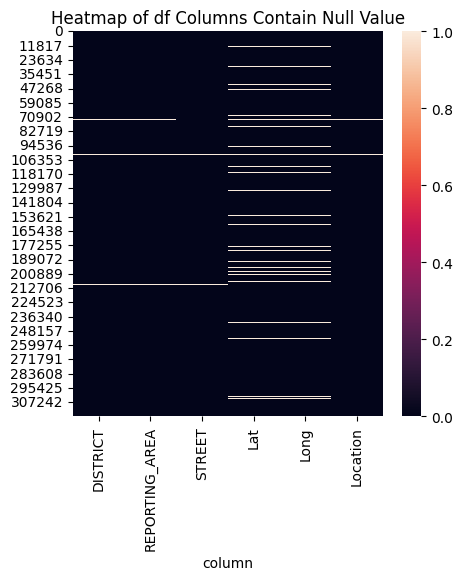

In [131]:
# Heatmap of df columns that contain null value
plt.figure(figsize=(5,5))
plt.title('Heatmap of df Columns Contain Null Value')
sns.heatmap(df[['DISTRICT','REPORTING_AREA','STREET','Lat','Long','Location']].isnull())
plt.xlabel('column')
plt.show()
# since STREET column has the least amount of null value (993 data) compared to DISTRICT and REPORTING_AREA column; 
# let's prioritized handling null value on STREET column among the other column.

###### 1. STREET
STREET column has 993 remaining null values after the first iteration of Checking & Handling Missing Values Section. According to heatmap of df columns that contain null value at the second iteration section, if we handle null value on STREET column, we will have the opportunity to be able to handle null values on DISTRICT and REPORTING_AREA column. STREET column contains categorical value of street name the incident took place. Therefore, we can handle null value on STREET column using the mode of street name the incident took place from the overall data.

In [132]:
# Let's check Location column value in which STREET column that contain null value
df[df['STREET'].isnull() & ~df['Location'].isnull()][['STREET','Lat','Long','Location']].sort_values(['Location'])
# the result shows that there are 816 rows on STREET column that contain null value with Location column non null value
# we need to fill the null value on STREET column according to Location column non null value

STREET        Lat       Long                     Location
186052    NaN  42.237226 -71.131902  (42.23722567, -71.13190217)
1190      NaN  42.252610 -71.118332  (42.25261020, -71.11833242)
186601    NaN  42.253822 -71.140221  (42.25382178, -71.14022124)
211609    NaN  42.258297 -71.160799  (42.25829702, -71.16079938)
171628    NaN  42.263633 -71.102686  (42.26363319, -71.10268624)
...       ...        ...        ...                          ...
212299    NaN  42.380542 -71.034095  (42.38054187, -71.03409477)
44572     NaN  42.381762 -71.066627  (42.38176159, -71.06662711)
203592    NaN  42.382124 -71.064728  (42.38212444, -71.06472807)
208555    NaN  42.383585 -71.075361  (42.38358492, -71.07536138)
153779    NaN  42.388445 -71.000408  (42.38844526, -71.00040800)

[816 rows x 4 columns]

In [133]:
# Let's fill null value on STREET column using its mode according to Location column non null value
df.loc[df['STREET'].isnull(), 'STREET'] = df.groupby('Location')['STREET'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['STREET'].isnull() & ~df['Location'].isnull()][['STREET','Lat','Long','Location']].sort_values(['Location'])
# the result shows that there are 816 rows remaining null values on STREET column with Location column non null value
# since there is no change in the number of rows after STREET column being filled with the mode of Location column non null value
# it indicated that remaining null values on STREET column with Location column non null value does contain a null value
# let's continue to fill null value on STREET column considering STREET column mode from the overall data

STREET        Lat       Long                     Location
186052    NaN  42.237226 -71.131902  (42.23722567, -71.13190217)
1190      NaN  42.252610 -71.118332  (42.25261020, -71.11833242)
186601    NaN  42.253822 -71.140221  (42.25382178, -71.14022124)
211609    NaN  42.258297 -71.160799  (42.25829702, -71.16079938)
171628    NaN  42.263633 -71.102686  (42.26363319, -71.10268624)
...       ...        ...        ...                          ...
212299    NaN  42.380542 -71.034095  (42.38054187, -71.03409477)
44572     NaN  42.381762 -71.066627  (42.38176159, -71.06662711)
203592    NaN  42.382124 -71.064728  (42.38212444, -71.06472807)
208555    NaN  42.383585 -71.075361  (42.38358492, -71.07536138)
153779    NaN  42.388445 -71.000408  (42.38844526, -71.00040800)

[816 rows x 4 columns]

In [134]:
# Fill null value on STREET column with mode from the overall data
df['STREET'].fillna(value=df['STREET'].mode()[0], inplace=True)
df_null_table().iloc[[14]]
# the result shows that there aren't null value on STREET column

columns  null count  null (%)
14  STREET           0       0.0

###### 2. DISTRICT
DISTRICT column has 1408 remaining null values after the first iteration of Checking & Handling Missing Values Section. Since STREET already hasn't null values, we can fill null value on DISTRICT column by referring back to Location, STREET, and REPORTING_AREA column.

In [135]:
# Let's check Location column value in which DISTRICT column that contain null value
df[df['DISTRICT'].isnull() & ~df['Lat'].isnull() & ~df['Long'].isnull()
  & ~df['Location'].isnull()][['DISTRICT','Lat', 'Long', 'Location']].sort_values(['Location'])
# the result shows that there are 821 rows on DISTRICT column that contain null value with Location column non null value
# we need to fill the null value on DISTRICT column according to Location column non null value

DISTRICT        Lat       Long                     Location
186052      NaN  42.237226 -71.131902  (42.23722567, -71.13190217)
1190        NaN  42.252610 -71.118332  (42.25261020, -71.11833242)
186601      NaN  42.253822 -71.140221  (42.25382178, -71.14022124)
211609      NaN  42.258297 -71.160799  (42.25829702, -71.16079938)
89427       NaN  42.263633 -71.102686  (42.26363319, -71.10268624)
...         ...        ...        ...                          ...
212299      NaN  42.380542 -71.034095  (42.38054187, -71.03409477)
44572       NaN  42.381762 -71.066627  (42.38176159, -71.06662711)
203592      NaN  42.382124 -71.064728  (42.38212444, -71.06472807)
208555      NaN  42.383585 -71.075361  (42.38358492, -71.07536138)
153779      NaN  42.388445 -71.000408  (42.38844526, -71.00040800)

[821 rows x 4 columns]

In [136]:
# Let's fill null value on DISTRICT column using its mode according to Location column non null value
df.loc[df['DISTRICT'].isnull(), 'DISTRICT'] = df.groupby('Location')['DISTRICT'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['DISTRICT'].isnull() & ~df['Lat'].isnull() & ~df['Long'].isnull()
  & ~df['Location'].isnull()][['DISTRICT','Lat', 'Long', 'Location']].sort_values(['Location'])
# the result shows that there are 821 rows remaining null values on DISTRICT column with Location column non null value
# since there is no change in the number of rows after DISTRICT column being filled with the mode of Location column non null value
# it indicated that remaining null values on DISTRICT column with Location column non null value does contain a null value
# let's continue to fill null value on DISTRICT column considering REPORTING_AREA & STREET column non null value

DISTRICT        Lat       Long                     Location
186052      NaN  42.237226 -71.131902  (42.23722567, -71.13190217)
1190        NaN  42.252610 -71.118332  (42.25261020, -71.11833242)
186601      NaN  42.253822 -71.140221  (42.25382178, -71.14022124)
211609      NaN  42.258297 -71.160799  (42.25829702, -71.16079938)
89427       NaN  42.263633 -71.102686  (42.26363319, -71.10268624)
...         ...        ...        ...                          ...
212299      NaN  42.380542 -71.034095  (42.38054187, -71.03409477)
44572       NaN  42.381762 -71.066627  (42.38176159, -71.06662711)
203592      NaN  42.382124 -71.064728  (42.38212444, -71.06472807)
208555      NaN  42.383585 -71.075361  (42.38358492, -71.07536138)
153779      NaN  42.388445 -71.000408  (42.38844526, -71.00040800)

[821 rows x 4 columns]

In [137]:
# Let's check REPORTING_AREA & STREET column value in which DISTRICT column that contain null value
# df.loc[df['DISTRICT'].isnull(), 'DISTRICT'] = df.groupby(['STREET','REPORTING_AREA'])['DISTRICT'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['DISTRICT'].isnull() & ~df['REPORTING_AREA'].isnull() & ~df['STREET'].isnull()][['DISTRICT','REPORTING_AREA', 'STREET']].sort_values(['REPORTING_AREA','STREET'])
# the result shows that there aren't rows on DISTRICT column that contain null value with REPORTING_AREA & STREET column non null value
# we don't need to fill the null value on DISTRICT column according to REPORTING_AREA & STREET column non null value
# let's continue to fill null value on DISTRICT column considering STREET column non null value only,
# it's because STREET column also represent true value of a DISTRICT

Empty DataFrame
Columns: [DISTRICT, REPORTING_AREA, STREET]
Index: []

In [138]:
# Let's check STREET column value in which DISTRICT column that contain null value
df[df['DISTRICT'].isnull() & ~df['STREET'].isnull()][['DISTRICT','STREET']].sort_values(['STREET'])
# the result shows that there are 1408 rows on DISTRICT column that contain null value with STREET column non null value
# we need to fill the null value on DISTRICT column according to STREET column non null value

DISTRICT        STREET
60474       NaN     ABBOT ST 
201363      NaN           ADA
92268       NaN        ALBANY
21275       NaN        ALBANY
9207        NaN        ALBANY
...         ...           ...
20          NaN       WOLCOTT
207916      NaN      WOODBINE
44218       NaN  WOODS MULLIN
211944      NaN     WORCESTER
211945      NaN     WORCESTER

[1408 rows x 2 columns]

In [139]:
# Let's fill null value on DISTRICT column using its mode according to STREET column non null value
df.loc[df['DISTRICT'].isnull(), 'DISTRICT'] = df.groupby('STREET')['DISTRICT'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['DISTRICT'].isnull() & ~df['STREET'].isnull()][['DISTRICT','STREET']].sort_values(['STREET'])
# the result shows that there are 415 remaining null values on DISTRICT column with STREET column non null value
# let's continue to fill null value on DISTRICT column considering REPORTING_AREA column non null value only,
# it's because REPORTING_AREA column also represent true value of a DISTRICT

DISTRICT        STREET
60474       NaN     ABBOT ST 
201363      NaN           ADA
92268       NaN        ALBANY
9207        NaN        ALBANY
92269       NaN        ALBANY
...         ...           ...
20          NaN       WOLCOTT
207916      NaN      WOODBINE
44218       NaN  WOODS MULLIN
211944      NaN     WORCESTER
211945      NaN     WORCESTER

[415 rows x 2 columns]

In [140]:
# Let's check REPORTING_AREA column value in which DISTRICT column that contain null value
# df.loc[df['DISTRICT'].isnull(), 'DISTRICT'] = df.groupby('REPORTING_AREA')['DISTRICT'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['DISTRICT'].isnull() & ~df['REPORTING_AREA'].isnull()][['DISTRICT','REPORTING_AREA']].sort_values(['REPORTING_AREA'])
# the result shows that there aren't row on DISTRICT column that contain null value with REPORTING_AREA column non null value
# we don't need to fill the null value on DISTRICT column according to REPORTING_AREA column non null value

Empty DataFrame
Columns: [DISTRICT, REPORTING_AREA]
Index: []

In [141]:
# Let's check remaining null value on DISTRICT column
df[df['DISTRICT'].isnull()]
# the result shows that there are 415 null value on DISTRICT column
# we have successfully handled 993 null values on DISTRICT column

INCIDENT_NUMBER  OFFENSE_CODE          OFFENSE_CODE_GROUP                          OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH  DAY DAY_OF_WEEK  HOUR  UCR_PART       STREET  Lat  Long Location
20          I182070913          3006          MEDICAL ASSISTANCE                SICK/INJURED/MEDICAL - PERSON      NaN            NaN        N  2018-09-03 18:46:00  2018      9    3      MONDAY    18  PART TWO      WOLCOTT  NaN   NaN      NaN
126         I182070799          3410                       TOWED                          TOWED MOTOR VEHICLE      NaN            NaN        N  2018-09-03 11:55:00  2018      9    3      MONDAY    11  EXCLUDED      CHELSEA  NaN   NaN      NaN
424         I182070455          3006          MEDICAL ASSISTANCE                SICK/INJURED/MEDICAL - PERSON      NaN            NaN        N  2018-09-02 00:29:00  2018      9    2      SUNDAY     0  PART TWO       KELTON  NaN   NaN      NaN
443         I182070433          3108        FIRE RELATED REPORTS          FIRE REPORT - HOUSE, BUILDING, ETC.      NaN            NaN        N  2018-09-02 00:13:00  2018      9    2      SUNDAY     0  PART ONE     WESTLAND  NaN   NaN      NaN
1000        I182069838          3111           LICENSE VIOLATION                    LICENSE PREMISE VIOLATION      NaN            NaN        N  2018-08-31 01:46:00  2018      8   31      FRIDAY     1  PART TWO    STOUGHTON  NaN   NaN      NaN
...                ...           ...                         ...                                          ...      ...            ...      ...                  ...   ...    ...  ...         ...   ...       ...          ...  ...   ...      ...
317712      I152050789          3114        INVESTIGATE PROPERTY                         INVESTIGATE PROPERTY      NaN            NaN        N  2015-06-19 10:43:00  2015      6   19      FRIDAY    10  PART TWO  PITSMOOR RD  NaN   NaN      NaN
317972      I152050469          3125             WARRANT ARRESTS                               WARRANT ARREST      NaN            NaN        N  2015-06-18 10:55:00  2015      6   18    THURSDAY    10  EXCLUDED  WINSLOW AVE  NaN   NaN      NaN
318337      I152049991          1503          FIREARM VIOLATIONS  WEAPON - OTHER - CARRYING / POSSESSING, ETC      NaN            NaN        N  2015-06-16 18:35:00  2015      6   16     TUESDAY    18  PART TWO     HAMILTON  NaN   NaN      NaN
318338      I152049991          1842              DRUG VIOLATION         DRUGS - POSS CLASS A - HEROIN, ETC.       NaN            NaN        N  2015-06-16 18:35:00  2015      6   16     TUESDAY    18  PART TWO     HAMILTON  NaN   NaN      NaN
318601      I152049621           614  LARCENY FROM MOTOR VEHICLE        LARCENY THEFT FROM MV - NON-ACCESSORY      NaN            NaN        N  2015-06-15 11:30:00  2015      6   15      MONDAY    11  PART ONE      NEWCOMB  NaN   NaN      NaN

[415 rows x 18 columns]

###### 3. REPORTING_AREA
REPORTING_AREA column has 1408 remaining null values after the first iteration of Checking & Handling Missing Values Section. Since STREET already hasn't null values, we can fill null value on REPORTING_AREA column by referring back to Location, STREET, and DISTRICT column.

In [142]:
# Let's check Location column value in which REPORTING_AREA column that contain null value
df[df['REPORTING_AREA'].isnull() & ~df['Lat'].isnull() & ~df['Long'].isnull()
  & ~df['Location'].isnull()][['REPORTING_AREA','Lat', 'Long', 'Location']].sort_values(['Location'])
# the result shows that there are 821 rows on REPORTING_AREA column that contain null value with Location column non null value
# we need to fill the null value on REPORTING_AREA column according to Location column non null value

REPORTING_AREA        Lat       Long                     Location
186052            NaN  42.237226 -71.131902  (42.23722567, -71.13190217)
1190              NaN  42.252610 -71.118332  (42.25261020, -71.11833242)
186601            NaN  42.253822 -71.140221  (42.25382178, -71.14022124)
211609            NaN  42.258297 -71.160799  (42.25829702, -71.16079938)
89427             NaN  42.263633 -71.102686  (42.26363319, -71.10268624)
...               ...        ...        ...                          ...
212299            NaN  42.380542 -71.034095  (42.38054187, -71.03409477)
44572             NaN  42.381762 -71.066627  (42.38176159, -71.06662711)
203592            NaN  42.382124 -71.064728  (42.38212444, -71.06472807)
208555            NaN  42.383585 -71.075361  (42.38358492, -71.07536138)
153779            NaN  42.388445 -71.000408  (42.38844526, -71.00040800)

[821 rows x 4 columns]

In [143]:
# Let's fill null value on REPORTING_AREA column using its mode according to Location column non null value
df.loc[df['REPORTING_AREA'].isnull(), 'REPORTING_AREA'] = df.groupby('Location')['REPORTING_AREA'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['REPORTING_AREA'].isnull() & ~df['Lat'].isnull() & ~df['Long'].isnull()
  & ~df['Location'].isnull()][['REPORTING_AREA','Lat', 'Long', 'Location']].sort_values(['Location'])
# the result shows that there are 821 rows remaining null values on REPORTING_AREA column with Location column non null value
# since there is no change in the number of rows after REPORTING_AREA column being filled with the mode of Location column non null value
# it indicated that remaining null values on REPORTING_AREA column with Location column non null value does contain a null value
# let's continue to fill null value on REPORTING_AREA column considering DISTRICT & STREET column non null value only,

REPORTING_AREA        Lat       Long                     Location
186052            NaN  42.237226 -71.131902  (42.23722567, -71.13190217)
1190              NaN  42.252610 -71.118332  (42.25261020, -71.11833242)
186601            NaN  42.253822 -71.140221  (42.25382178, -71.14022124)
211609            NaN  42.258297 -71.160799  (42.25829702, -71.16079938)
89427             NaN  42.263633 -71.102686  (42.26363319, -71.10268624)
...               ...        ...        ...                          ...
212299            NaN  42.380542 -71.034095  (42.38054187, -71.03409477)
44572             NaN  42.381762 -71.066627  (42.38176159, -71.06662711)
203592            NaN  42.382124 -71.064728  (42.38212444, -71.06472807)
208555            NaN  42.383585 -71.075361  (42.38358492, -71.07536138)
153779            NaN  42.388445 -71.000408  (42.38844526, -71.00040800)

[821 rows x 4 columns]

In [144]:
# Let's check REPORTING_AREA column value in which DISTRICT & STREET column that contain null value
df[df['REPORTING_AREA'].isnull() & ~df['DISTRICT'].isnull() & ~df['STREET'].isnull()][['DISTRICT','STREET','REPORTING_AREA']].sort_values(['DISTRICT','STREET'])
# the result shows that there are 993 rows on REPORTING_AREA column that contain null value with DISTRICT & STREET column non null value
# we need to fill the null value on REPORTING_AREA column according to DISTRICT & STREET column non null value

DISTRICT         STREET REPORTING_AREA
15           A1  WASHINGTON ST            NaN
25           A1  WASHINGTON ST            NaN
39           A1  WASHINGTON ST            NaN
40           A1  WASHINGTON ST            NaN
41           A1  WASHINGTON ST            NaN
...         ...            ...            ...
317554       A1  WASHINGTON ST            NaN
318005       A1  WASHINGTON ST            NaN
318302       A1  WASHINGTON ST            NaN
318528       A1  WASHINGTON ST            NaN
318551       A1  WASHINGTON ST            NaN

[993 rows x 3 columns]

In [145]:
# Let's fill null value on REPORTING_AREA column using its mode according to DISTRICT & STREET column non null value
df.loc[df['REPORTING_AREA'].isnull(), 'REPORTING_AREA'] = df.groupby(['DISTRICT','STREET'])['REPORTING_AREA'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['REPORTING_AREA'].isnull() & ~df['DISTRICT'].isnull() & ~df['STREET'].isnull()][['DISTRICT', 'STREET','REPORTING_AREA']].sort_values(['DISTRICT','STREET'])
# the result shows that there aren't remaining null value on REPORTING_AREA column with DISTRICT & STREET column non null value

Empty DataFrame
Columns: [DISTRICT, STREET, REPORTING_AREA]
Index: []

In [146]:
# Let's check REPORTING_AREA column value in which DISTRICT column that contain null value
# df.loc[df['REPORTING_AREA'].isnull(), 'REPORTING_AREA'] = df.groupby('DISTRICT')['REPORTING_AREA'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['REPORTING_AREA'].isnull() & ~df['DISTRICT'].isnull()][['DISTRICT','REPORTING_AREA']].sort_values(['DISTRICT'])
# the result shows that there aren't rows on REPORTING_AREA column that contain null value with DISTRICT column non null value
# we don't need to fill the null value on REPORTING_AREA column according to DISTRICT column non null value

Empty DataFrame
Columns: [DISTRICT, REPORTING_AREA]
Index: []

In [147]:
# Let's check REPORTING_AREA column value in which STREET column that contain null value
df[df['REPORTING_AREA'].isnull() & ~df['STREET'].isnull()][['STREET','REPORTING_AREA']].sort_values(['STREET'])
# the result shows that there are 415 rows on REPORTING_AREA column that contain null value with STREET column non null value
# we need to fill the null value on REPORTING_AREA column according to STREET column non null value

STREET REPORTING_AREA
60474      ABBOT ST             NaN
201363           ADA            NaN
92268         ALBANY            NaN
9207          ALBANY            NaN
92269         ALBANY            NaN
...              ...            ...
20           WOLCOTT            NaN
207916      WOODBINE            NaN
44218   WOODS MULLIN            NaN
211944     WORCESTER            NaN
211945     WORCESTER            NaN

[415 rows x 2 columns]

In [148]:
# Let's fill null value on REPORTING_AREA column using its mode according to STREET column non null value
df.loc[df['REPORTING_AREA'].isnull(), 'REPORTING_AREA'] = df.groupby('STREET')['REPORTING_AREA'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['REPORTING_AREA'].isnull() & ~df['STREET'].isnull()][['STREET','REPORTING_AREA']].sort_values(['STREET'])
# the result shows that there are 415 remaining null values on REPORTING_AREA column with STREET column non null value
# since there is no change in the number of rows after REPORTING_AREA column being filled with the mode of STREET column non null value
# it indicated that remaining null values on REPORTING_AREA column with STREET column non null value does contain a null value

STREET REPORTING_AREA
60474      ABBOT ST             NaN
201363           ADA            NaN
92268         ALBANY            NaN
9207          ALBANY            NaN
92269         ALBANY            NaN
...              ...            ...
20           WOLCOTT            NaN
207916      WOODBINE            NaN
44218   WOODS MULLIN            NaN
211944     WORCESTER            NaN
211945     WORCESTER            NaN

[415 rows x 2 columns]

In [149]:
# Let's check remaining null value on REPORTING_AREA column
df[df['REPORTING_AREA'].isnull()]
# the result shows that there are 415 null value on REPORTING_AREA column
# we have successfully handled 993 null values on REPORTING_AREA column

INCIDENT_NUMBER  OFFENSE_CODE          OFFENSE_CODE_GROUP                          OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH  DAY DAY_OF_WEEK  HOUR  UCR_PART       STREET  Lat  Long Location
20          I182070913          3006          MEDICAL ASSISTANCE                SICK/INJURED/MEDICAL - PERSON      NaN            NaN        N  2018-09-03 18:46:00  2018      9    3      MONDAY    18  PART TWO      WOLCOTT  NaN   NaN      NaN
126         I182070799          3410                       TOWED                          TOWED MOTOR VEHICLE      NaN            NaN        N  2018-09-03 11:55:00  2018      9    3      MONDAY    11  EXCLUDED      CHELSEA  NaN   NaN      NaN
424         I182070455          3006          MEDICAL ASSISTANCE                SICK/INJURED/MEDICAL - PERSON      NaN            NaN        N  2018-09-02 00:29:00  2018      9    2      SUNDAY     0  PART TWO       KELTON  NaN   NaN      NaN
443         I182070433          3108        FIRE RELATED REPORTS          FIRE REPORT - HOUSE, BUILDING, ETC.      NaN            NaN        N  2018-09-02 00:13:00  2018      9    2      SUNDAY     0  PART ONE     WESTLAND  NaN   NaN      NaN
1000        I182069838          3111           LICENSE VIOLATION                    LICENSE PREMISE VIOLATION      NaN            NaN        N  2018-08-31 01:46:00  2018      8   31      FRIDAY     1  PART TWO    STOUGHTON  NaN   NaN      NaN
...                ...           ...                         ...                                          ...      ...            ...      ...                  ...   ...    ...  ...         ...   ...       ...          ...  ...   ...      ...
317712      I152050789          3114        INVESTIGATE PROPERTY                         INVESTIGATE PROPERTY      NaN            NaN        N  2015-06-19 10:43:00  2015      6   19      FRIDAY    10  PART TWO  PITSMOOR RD  NaN   NaN      NaN
317972      I152050469          3125             WARRANT ARRESTS                               WARRANT ARREST      NaN            NaN        N  2015-06-18 10:55:00  2015      6   18    THURSDAY    10  EXCLUDED  WINSLOW AVE  NaN   NaN      NaN
318337      I152049991          1503          FIREARM VIOLATIONS  WEAPON - OTHER - CARRYING / POSSESSING, ETC      NaN            NaN        N  2015-06-16 18:35:00  2015      6   16     TUESDAY    18  PART TWO     HAMILTON  NaN   NaN      NaN
318338      I152049991          1842              DRUG VIOLATION         DRUGS - POSS CLASS A - HEROIN, ETC.       NaN            NaN        N  2015-06-16 18:35:00  2015      6   16     TUESDAY    18  PART TWO     HAMILTON  NaN   NaN      NaN
318601      I152049621           614  LARCENY FROM MOTOR VEHICLE        LARCENY THEFT FROM MV - NON-ACCESSORY      NaN            NaN        N  2015-06-15 11:30:00  2015      6   15      MONDAY    11  PART ONE      NEWCOMB  NaN   NaN      NaN

[415 rows x 18 columns]

###### 4. Location
Location column has 586 remaining null values after the first iteration of Checking & Handling Missing Values Section. Since Location already hasn't null values, we can fill null value on Location column by referring back to DISTRICT, STREET, and REPORTING_AREA  column.

In [150]:
# Let's check DISTRICT, REPORTING_AREA, & STREET column value in which Location column that contain null value
df[df['Location'].isnull() & ~df['DISTRICT'].isnull() & ~df['REPORTING_AREA'].isnull()
    & ~df['STREET'].isnull()][['DISTRICT','REPORTING_AREA', 'STREET', 'Lat', 'Long', 'Location'
    ]].sort_values(['DISTRICT','REPORTING_AREA','STREET','Location'])
# the result shows that there are 177 rows on Location column that contain null value with DISTRICT, REPORTING_AREA, & STREET column non null value
# we need to fill the null value on Location column according to DISTRICT, REPORTING_AREA, & STREET column non null value

DISTRICT REPORTING_AREA         STREET  Lat  Long Location
436          A1            112  WASHINGTON ST  NaN   NaN      NaN
2246         A1            112  WASHINGTON ST  NaN   NaN      NaN
2746         A1            112  WASHINGTON ST  NaN   NaN      NaN
4609         A1            112  WASHINGTON ST  NaN   NaN      NaN
5591         A1            112  WASHINGTON ST  NaN   NaN      NaN
...         ...            ...            ...  ...   ...      ...
317554       A1            112  WASHINGTON ST  NaN   NaN      NaN
318005       A1            112  WASHINGTON ST  NaN   NaN      NaN
318302       A1            112  WASHINGTON ST  NaN   NaN      NaN
318528       A1            112  WASHINGTON ST  NaN   NaN      NaN
318551       A1            112  WASHINGTON ST  NaN   NaN      NaN

[177 rows x 6 columns]

In [151]:
# Let's fill null value on Location column using its mode according to DISTRICT, REPORTING_AREA, & STREET column non null value
df.loc[df['Location'].isnull(), 'Location'] = df.groupby(['DISTRICT','REPORTING_AREA','STREET'])['Location'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['Location'].isnull() & ~df['DISTRICT'].isnull() & ~df['REPORTING_AREA'].isnull()
    & ~df['STREET'].isnull()][['DISTRICT','REPORTING_AREA', 'STREET', 'Lat', 'Long', 'Location'
    ]].sort_values(['DISTRICT','REPORTING_AREA','STREET','Location'])
# the result shows that there aren't remaining null values on Location column with DISTRICT column non null value
# we need to continue fill null value on Location column considering DISTRICT & STREET column non null value only,
# it's because DISTRICT & STREET column would represent better true value of a Location rather than DISTRICT & REPORTING_AREA column

Empty DataFrame
Columns: [DISTRICT, REPORTING_AREA, STREET, Lat, Long, Location]
Index: []

In [152]:
# Let's check DISTRICT & STREET column value in which Location column that contain null value
# df.loc[df['Location'].isnull(), 'Location'] = df.groupby(['DISTRICT','STREET'])['Location'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['Location'].isnull() & ~df['DISTRICT'].isnull() & ~df['STREET'].isnull()][['DISTRICT', 
    'STREET', 'Lat', 'Long', 'Location']].sort_values(['DISTRICT','STREET','Location'])
# the result shows that there aren't rows on Location column that contain null value with DISTRICT & STREET column non null value
# we don't need to fill the null value on Location column according to DISTRICT & STREET column non null value
# we need to continue fill null value on Location column considering DISTRICT & REPORTING_AREA column non null value only,
# it's because DISTRICT & REPORTING_AREA column would represent better true value of a Location rather than REPORTING_AREA & STREET column

Empty DataFrame
Columns: [DISTRICT, STREET, Lat, Long, Location]
Index: []

In [153]:
# Let's check DISTRICT & REPORTING_AREA column value in which Location column that contain null value
# df.loc[df['Location'].isnull(), 'Location'] = df.groupby(['DISTRICT','REPORTING_AREA'])['Location'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['Location'].isnull() & ~df['DISTRICT'].isnull() & ~df['REPORTING_AREA'].isnull()][['DISTRICT', 
    'REPORTING_AREA', 'Lat', 'Long', 'Location']].sort_values(['DISTRICT','REPORTING_AREA','Location'])
# the result shows that there aren't rows on Location column that contain null value with DISTRICT & REPORTING_AREA column non null value
# we don't need to fill the null value on Location column according to DISTRICT & REPORTING_AREA column non null value
# we need to continue fill null value on Location column considering REPORTING_AREA & STREET column non null value only,
# it's because REPORTING_AREA & STREET column would represent better true value of a Location rather than DISTRICT column only

Empty DataFrame
Columns: [DISTRICT, REPORTING_AREA, Lat, Long, Location]
Index: []

In [154]:
# Let's check REPORTING_AREA & STREET column value in which Location column that contain null value
# df.loc[df['Location'].isnull(), 'Location'] = df.groupby(['REPORTING_AREA','STREET'])['Location'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['Location'].isnull() & ~df['REPORTING_AREA'].isnull() & ~df['STREET'].isnull()][['REPORTING_AREA', 
    'STREET', 'Lat', 'Long', 'Location']].sort_values(['REPORTING_AREA','STREET','Location'])
# the result shows that there aren't rows on Location column that contain null value with REPORTING_AREA & STREET column non null value
# we don't need to fill the null value on Location column according to REPORTING_AREA & STREET column non null value
# we need to continue fill null value on Location column considering DISTRICT column non null value only,
# it's because DISTRICTcolumn would represent better true value of a Location rather than STREET or REPORTING_AREA column only

Empty DataFrame
Columns: [REPORTING_AREA, STREET, Lat, Long, Location]
Index: []

In [155]:
# Let's check DISTRICT column value in which Location column that contain null value
# df.loc[df['Location'].isnull(), 'Location'] = df.groupby('DISTRICT')['Location'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['Location'].isnull() & ~df['DISTRICT'].isnull()][['DISTRICT','Lat', 'Long', 'Location']].sort_values(['DISTRICT','Location'])
# the result shows that there aren't rows on Location column that contain null value with DISTRICT column non null value
# we don't need to fill the null value on Location column according to DISTRICT column non null value
# we need to continue fill null value on Location column considering STREET column non null value only,
# it's because STREET would represent better true value of a Location rather than REPORTING_AREA column

Empty DataFrame
Columns: [DISTRICT, Lat, Long, Location]
Index: []

In [156]:
# Let's check STREET column value in which Location column that contain null value
df[df['Location'].isnull() & ~df['STREET'].isnull()][['STREET','Lat', 'Long', 'Location']].sort_values(['STREET','Location'])
# the result shows that there are 409 rows on Location column that contain null value with STREET column non null value
# we need to fill the null value on Location column according to STREET column non null value

STREET  Lat  Long Location
60474      ABBOT ST   NaN   NaN      NaN
201363           ADA  NaN   NaN      NaN
9207          ALBANY  NaN   NaN      NaN
21275         ALBANY  NaN   NaN      NaN
92268         ALBANY  NaN   NaN      NaN
...              ...  ...   ...      ...
20           WOLCOTT  NaN   NaN      NaN
207916      WOODBINE  NaN   NaN      NaN
44218   WOODS MULLIN  NaN   NaN      NaN
211944     WORCESTER  NaN   NaN      NaN
211945     WORCESTER  NaN   NaN      NaN

[409 rows x 4 columns]

In [157]:
# Let's fill null value on Location column using its mode according to STREET column non null value
df.loc[df['Location'].isnull(), 'Location'] = df.groupby('STREET')['Location'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['Location'].isnull() & ~df['STREET'].isnull()][['STREET','Lat', 'Long', 'Location']].sort_values(['STREET','Location'])
# the result shows that there are 409 remaining null values on Location column with STREET column non null value
# we need to continue fill null value on Location column considering REPORTING_AREA column non null value

STREET  Lat  Long Location
60474      ABBOT ST   NaN   NaN      NaN
201363           ADA  NaN   NaN      NaN
9207          ALBANY  NaN   NaN      NaN
21275         ALBANY  NaN   NaN      NaN
92268         ALBANY  NaN   NaN      NaN
...              ...  ...   ...      ...
20           WOLCOTT  NaN   NaN      NaN
207916      WOODBINE  NaN   NaN      NaN
44218   WOODS MULLIN  NaN   NaN      NaN
211944     WORCESTER  NaN   NaN      NaN
211945     WORCESTER  NaN   NaN      NaN

[409 rows x 4 columns]

In [158]:
# Let's check REPORTING_AREA column value in which Location column that contain null value
# df.loc[df['Location'].isnull(), 'Location'] = df.groupby('REPORTING_AREA')['Location'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['Location'].isnull() & ~df['REPORTING_AREA'].isnull()][['REPORTING_AREA','Lat', 'Long', 'Location']].sort_values(['REPORTING_AREA','Location'])
# the result shows that there aren't row on Location column that contain null value with REPORTING_AREA column non null value
# we don't need to fill the null value on Location column according to REPORTING_AREA column non null value

Empty DataFrame
Columns: [REPORTING_AREA, Lat, Long, Location]
Index: []

In [159]:
# Let's check remaining null value on Location column
df[df['Location'].isnull()]
# the result shows that there are 409 null value on Location column
# we have successfully handled 177 null values on Location column

INCIDENT_NUMBER  OFFENSE_CODE          OFFENSE_CODE_GROUP                          OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH  DAY DAY_OF_WEEK  HOUR  UCR_PART       STREET  Lat  Long Location
20          I182070913          3006          MEDICAL ASSISTANCE                SICK/INJURED/MEDICAL - PERSON      NaN            NaN        N  2018-09-03 18:46:00  2018      9    3      MONDAY    18  PART TWO      WOLCOTT  NaN   NaN      NaN
126         I182070799          3410                       TOWED                          TOWED MOTOR VEHICLE      NaN            NaN        N  2018-09-03 11:55:00  2018      9    3      MONDAY    11  EXCLUDED      CHELSEA  NaN   NaN      NaN
424         I182070455          3006          MEDICAL ASSISTANCE                SICK/INJURED/MEDICAL - PERSON      NaN            NaN        N  2018-09-02 00:29:00  2018      9    2      SUNDAY     0  PART TWO       KELTON  NaN   NaN      NaN
443         I182070433          3108        FIRE RELATED REPORTS          FIRE REPORT - HOUSE, BUILDING, ETC.      NaN            NaN        N  2018-09-02 00:13:00  2018      9    2      SUNDAY     0  PART ONE     WESTLAND  NaN   NaN      NaN
1000        I182069838          3111           LICENSE VIOLATION                    LICENSE PREMISE VIOLATION      NaN            NaN        N  2018-08-31 01:46:00  2018      8   31      FRIDAY     1  PART TWO    STOUGHTON  NaN   NaN      NaN
...                ...           ...                         ...                                          ...      ...            ...      ...                  ...   ...    ...  ...         ...   ...       ...          ...  ...   ...      ...
317712      I152050789          3114        INVESTIGATE PROPERTY                         INVESTIGATE PROPERTY      NaN            NaN        N  2015-06-19 10:43:00  2015      6   19      FRIDAY    10  PART TWO  PITSMOOR RD  NaN   NaN      NaN
317972      I152050469          3125             WARRANT ARRESTS                               WARRANT ARREST      NaN            NaN        N  2015-06-18 10:55:00  2015      6   18    THURSDAY    10  EXCLUDED  WINSLOW AVE  NaN   NaN      NaN
318337      I152049991          1503          FIREARM VIOLATIONS  WEAPON - OTHER - CARRYING / POSSESSING, ETC      NaN            NaN        N  2015-06-16 18:35:00  2015      6   16     TUESDAY    18  PART TWO     HAMILTON  NaN   NaN      NaN
318338      I152049991          1842              DRUG VIOLATION         DRUGS - POSS CLASS A - HEROIN, ETC.       NaN            NaN        N  2015-06-16 18:35:00  2015      6   16     TUESDAY    18  PART TWO     HAMILTON  NaN   NaN      NaN
318601      I152049621           614  LARCENY FROM MOTOR VEHICLE        LARCENY THEFT FROM MV - NON-ACCESSORY      NaN            NaN        N  2015-06-15 11:30:00  2015      6   15      MONDAY    11  PART ONE      NEWCOMB  NaN   NaN      NaN

[409 rows x 18 columns]

##### 3RD ITERATION

In [160]:
# Let's check null value for each column after completing the second iteration of Checking & Handling Missing Values Section
df_null_table()
# the result shows columns that contain null value becomes DISTRICT, REPORTING_AREA, Lat, Long, and Location
# STREET column has been handled at the second iteration
# the amount of null value on DISTRICT column decreased from 0.44% to 0.13%,
# the amount of null value on REPORTING_AREA column decreased from 1408 to 415,
# the amount of null value on Lat and Long column remain the same at 6.50%,
# it's because we haven't handled null values on Lat and Long column at the second iteration
# the amount of null value on Location column decreased from 586 to 409

columns  null count  null (%)
0       INCIDENT_NUMBER           0      0.00
1          OFFENSE_CODE           0      0.00
2    OFFENSE_CODE_GROUP           0      0.00
3   OFFENSE_DESCRIPTION           0      0.00
4              DISTRICT         415      0.13
5        REPORTING_AREA         415      0.13
6              SHOOTING           0      0.00
7      OCCURRED_ON_DATE           0      0.00
8                  YEAR           0      0.00
9                 MONTH           0      0.00
10                  DAY           0      0.00
11          DAY_OF_WEEK           0      0.00
12                 HOUR           0      0.00
13             UCR_PART           0      0.00
14               STREET           0      0.00
15                  Lat       20743      6.50
16                 Long       20743      6.50
17             Location         409      0.13

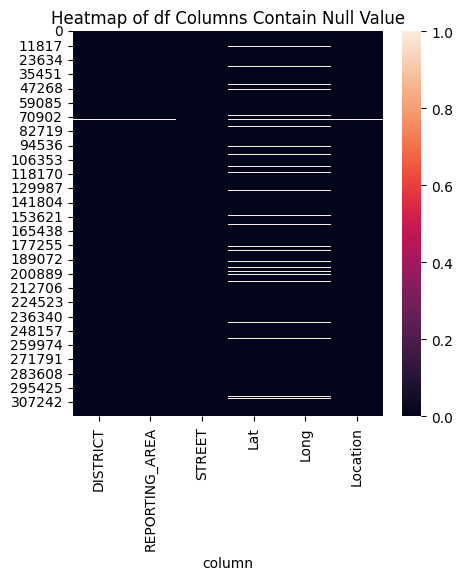

In [161]:
# Heatmap of df columns that contain null value
plt.figure(figsize=(5,5))
plt.title('Heatmap of df Columns Contain Null Value')
sns.heatmap(df[['DISTRICT','REPORTING_AREA','STREET','Lat','Long','Location']].isnull())
plt.xlabel('column')
plt.show()
# since REPORTING_AREA associated with the DISTRICT the crime was reported, 
# let's prioritized handling null value on DISTRICT column among the other column.

###### 1. DISTRICT
DISTRICT column has 415 remaining null values after the second iteration of Checking & Handling Missing Values Section. According to heatmap of df columns that contain null value at the third iteration section, if we handle null value on DISTRICT column, we will have the opportunity to be able to handle null values on REPORTING_AREA and Location column. DISTRICT column contains categorical value of where the crime was reported. Therefore, we can handle null value on DISTRICT column using the mode of where the crime was reported from the overall data.

In [162]:
# Let's check Location column value in which DISTRICT column that contain null value
df[df['DISTRICT'].isnull() & ~df['Lat'].isnull() & ~df['Long'].isnull()
  & ~df['Location'].isnull()][['DISTRICT','Lat', 'Long', 'Location']].sort_values(['Location'])
# the result shows that there are 5 rows on DISTRICT column that contain null value with Location column non null value
# we need to fill the null value on DISTRICT column according to Location column non null value

DISTRICT        Lat       Long                     Location
206287      NaN  42.343198 -71.087907  (42.34319770, -71.08790747)
203990      NaN  42.343362 -71.083319  (42.34336199, -71.08331858)
194054      NaN  42.350383 -71.081224  (42.35038342, -71.08122390)
127856      NaN  42.354112 -71.075682  (42.35411213, -71.07568185)
92377       NaN  42.377630 -71.059202  (42.37763033, -71.05920235)

In [163]:
# Let's fill null value on DISTRICT column using its mode according to Location column non null value
df.loc[df['DISTRICT'].isnull(), 'DISTRICT'] = df.groupby('Location')['DISTRICT'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['DISTRICT'].isnull() & ~df['Lat'].isnull() & ~df['Long'].isnull()
  & ~df['Location'].isnull()][['DISTRICT','Lat', 'Long', 'Location']].sort_values(['Location'])
# the result shows that there are 5 rows remaining null values on DISTRICT column with Location column non null value
# since there is no change in the number of rows after DISTRICT column being filled with the mode of Location column non null value
# it indicated that remaining null values on DISTRICT column with Location column non null value does contain a null value
# let's continue to fill null value on DISTRICT column considering REPORTING_AREA & STREET column non null value

DISTRICT        Lat       Long                     Location
206287      NaN  42.343198 -71.087907  (42.34319770, -71.08790747)
203990      NaN  42.343362 -71.083319  (42.34336199, -71.08331858)
194054      NaN  42.350383 -71.081224  (42.35038342, -71.08122390)
127856      NaN  42.354112 -71.075682  (42.35411213, -71.07568185)
92377       NaN  42.377630 -71.059202  (42.37763033, -71.05920235)

In [164]:
# Let's check REPORTING_AREA & STREET column value in which DISTRICT column that contain null value
# df.loc[df['DISTRICT'].isnull(), 'DISTRICT'] = df.groupby(['STREET','REPORTING_AREA'])['DISTRICT'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['DISTRICT'].isnull() & ~df['REPORTING_AREA'].isnull() & ~df['STREET'].isnull()][['DISTRICT','REPORTING_AREA', 'STREET']].sort_values(['REPORTING_AREA','STREET'])
# the result shows that there aren't rows on DISTRICT column that contain null value with REPORTING_AREA & STREET column non null value
# we don't need to fill the null value on DISTRICT column according to REPORTING_AREA & STREET column non null value
# therefore we need to continue fill null value on DISTRICT column considering STREET column non null value only,
# it's because STREET column would represent better true value of a DISTRICT rather than REPORTING_AREA column

Empty DataFrame
Columns: [DISTRICT, REPORTING_AREA, STREET]
Index: []

In [165]:
# Let's check STREET column value in which DISTRICT column that contain null value
df[df['DISTRICT'].isnull() & ~df['STREET'].isnull()][['DISTRICT','STREET']].sort_values(['STREET'])
# the result shows that there are 415 rows on DISTRICT column that contain null value with STREET column non null value
# we need to fill the null value on DISTRICT column according to STREET column non null value

DISTRICT        STREET
60474       NaN     ABBOT ST 
201363      NaN           ADA
92268       NaN        ALBANY
9207        NaN        ALBANY
92269       NaN        ALBANY
...         ...           ...
20          NaN       WOLCOTT
207916      NaN      WOODBINE
44218       NaN  WOODS MULLIN
211944      NaN     WORCESTER
211945      NaN     WORCESTER

[415 rows x 2 columns]

In [166]:
# Let's fill null value on DISTRICT column using its mode according to STREET column non null value
df.loc[df['DISTRICT'].isnull(), 'DISTRICT'] = df.groupby('STREET')['DISTRICT'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['DISTRICT'].isnull() & ~df['STREET'].isnull()][['DISTRICT','STREET']].sort_values(['STREET'])
# the result shows that there are 415 remaining null values on DISTRICT column with STREET column non null value
# since there is no change in the number of rows after Location column being filled with the mode of STREET column non null value
# it indicated that remaining null values on Location column with STREET column non null value does contain a null value
# let's continue to fill null value on DISTRICT column considering REPORTING_AREA column non null value only,
# it's because REPORTING_AREA column also represent true value of a DISTRICT

DISTRICT        STREET
60474       NaN     ABBOT ST 
201363      NaN           ADA
92268       NaN        ALBANY
9207        NaN        ALBANY
92269       NaN        ALBANY
...         ...           ...
20          NaN       WOLCOTT
207916      NaN      WOODBINE
44218       NaN  WOODS MULLIN
211944      NaN     WORCESTER
211945      NaN     WORCESTER

[415 rows x 2 columns]

In [167]:
# Let's check REPORTING_AREA column value in which DISTRICT column that contain null value
# df.loc[df['DISTRICT'].isnull(), 'DISTRICT'] = df.groupby('REPORTING_AREA')['DISTRICT'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['DISTRICT'].isnull() & ~df['REPORTING_AREA'].isnull()][['DISTRICT','REPORTING_AREA']].sort_values(['REPORTING_AREA'])
# the result shows that there aren't rows on DISTRICT column that contain null value with REPORTING_AREA column non null value
# we don't need to fill the null value on DISTRICT column according to REPORTING_AREA column non null value

Empty DataFrame
Columns: [DISTRICT, REPORTING_AREA]
Index: []

In [168]:
# Fill null value on DISTRICT column with mode from the overall data
df['DISTRICT'].fillna(value=df['DISTRICT'].mode()[0], inplace=True)
df_null_table().iloc[[4]]
# the result shows that there aren't null value on REPORTING_AREA column

columns  null count  null (%)
4  DISTRICT           0       0.0

In [169]:
# Let's check remaining null value on DISTRICT column
df[df['DISTRICT'].isnull()]
# the result shows that there aren't null value on DISTRICT column
# we have successfully handled 415 null values on DISTRICT column

Empty DataFrame
Columns: [INCIDENT_NUMBER, OFFENSE_CODE, OFFENSE_CODE_GROUP, OFFENSE_DESCRIPTION, DISTRICT, REPORTING_AREA, SHOOTING, OCCURRED_ON_DATE, YEAR, MONTH, DAY, DAY_OF_WEEK, HOUR, UCR_PART, STREET, Lat, Long, Location]
Index: []

###### 2. REPORTING_AREA
REPORTING_AREA column has 415 remaining null values after the second iteration of Checking & Handling Missing Values Section. Since DISTRICT already hasn't null values, we can fill null value on REPORTING_AREA column by referring back to Location, DISTRICT, and STREET column.

In [170]:
# Let's check Location column value in which REPORTING_AREA column that contain null value
df[df['REPORTING_AREA'].isnull() & ~df['Lat'].isnull() & ~df['Long'].isnull()
  & ~df['Location'].isnull()][['REPORTING_AREA','Lat', 'Long', 'Location']].sort_values(['Location'])
# the result shows that there are 5 rows on REPORTING_AREA column that contain null value with Location column non null value
# we need to fill the null value on REPORTING_AREA column according to Location column non null value

REPORTING_AREA        Lat       Long                     Location
206287            NaN  42.343198 -71.087907  (42.34319770, -71.08790747)
203990            NaN  42.343362 -71.083319  (42.34336199, -71.08331858)
194054            NaN  42.350383 -71.081224  (42.35038342, -71.08122390)
127856            NaN  42.354112 -71.075682  (42.35411213, -71.07568185)
92377             NaN  42.377630 -71.059202  (42.37763033, -71.05920235)

In [171]:
# Let's fill null value on REPORTING_AREA column using its mode according to Location column non null value
df.loc[df['REPORTING_AREA'].isnull(), 'REPORTING_AREA'] = df.groupby('Location')['REPORTING_AREA'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['REPORTING_AREA'].isnull() & ~df['Lat'].isnull() & ~df['Long'].isnull()
  & ~df['Location'].isnull()][['REPORTING_AREA','Lat', 'Long', 'Location']].sort_values(['Location'])
# the result shows that there are 5 rows remaining null values on REPORTING_AREA column with Location column non null value
# since there is no change in the number of rows after REPORTING_AREA column being filled with the mode of Location column non null value
# it indicated that remaining null values on REPORTING_AREA column with Location column non null value does contain a null value
# let's continue to fill null value on REPORTING_AREA column considering DISTRICT & STREET column non null value only,

REPORTING_AREA        Lat       Long                     Location
206287            NaN  42.343198 -71.087907  (42.34319770, -71.08790747)
203990            NaN  42.343362 -71.083319  (42.34336199, -71.08331858)
194054            NaN  42.350383 -71.081224  (42.35038342, -71.08122390)
127856            NaN  42.354112 -71.075682  (42.35411213, -71.07568185)
92377             NaN  42.377630 -71.059202  (42.37763033, -71.05920235)

In [172]:
# Let's check REPORTING_AREA column value in which DISTRICT & STREET column that contain null value
df[df['REPORTING_AREA'].isnull() & ~df['DISTRICT'].isnull() & ~df['STREET'].isnull()][['DISTRICT','STREET','REPORTING_AREA']].sort_values(['DISTRICT','STREET'])
# the result shows that there are 415 rows on REPORTING_AREA column that contain null value with DISTRICT & STREET column non null value
# we need to fill the null value on REPORTING_AREA column according to DISTRICT & STREET column non null value

DISTRICT        STREET REPORTING_AREA
60474        B2     ABBOT ST             NaN
201363       B2           ADA            NaN
9207         B2        ALBANY            NaN
21275        B2        ALBANY            NaN
92268        B2        ALBANY            NaN
...         ...           ...            ...
20           B2       WOLCOTT            NaN
207916       B2      WOODBINE            NaN
44218        B2  WOODS MULLIN            NaN
211944       B2     WORCESTER            NaN
211945       B2     WORCESTER            NaN

[415 rows x 3 columns]

In [173]:
# Let's fill null value on REPORTING_AREA column using its mode according to DISTRICT & STREET column non null value
df.loc[df['REPORTING_AREA'].isnull(), 'REPORTING_AREA'] = df.groupby(['DISTRICT','STREET'])['REPORTING_AREA'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['REPORTING_AREA'].isnull() & ~df['DISTRICT'].isnull() & ~df['STREET'].isnull()][['DISTRICT', 'STREET','REPORTING_AREA']].sort_values(['DISTRICT','STREET'])
# the result shows that there 415 remaining null values on REPORTING_AREA column with DISTRICT & STREET column non null value

DISTRICT        STREET REPORTING_AREA
60474        B2     ABBOT ST             NaN
201363       B2           ADA            NaN
9207         B2        ALBANY            NaN
21275        B2        ALBANY            NaN
92268        B2        ALBANY            NaN
...         ...           ...            ...
20           B2       WOLCOTT            NaN
207916       B2      WOODBINE            NaN
44218        B2  WOODS MULLIN            NaN
211944       B2     WORCESTER            NaN
211945       B2     WORCESTER            NaN

[415 rows x 3 columns]

In [174]:
# Let's check REPORTING_AREA column value in which DISTRICT column that contain null value
df[df['REPORTING_AREA'].isnull() & ~df['DISTRICT'].isnull()][['DISTRICT','REPORTING_AREA']].sort_values(['DISTRICT'])
# the result shows that there 415 rows on REPORTING_AREA column that contain null value with DISTRICT column non null value
# we don't need to fill the null value on REPORTING_AREA column according to DISTRICT column non null value

DISTRICT REPORTING_AREA
20           B2            NaN
180186       B2            NaN
180151       B2            NaN
179116       B2            NaN
178659       B2            NaN
...         ...            ...
58030        B2            NaN
56953        B2            NaN
51934        B2            NaN
60474        B2            NaN
318601       B2            NaN

[415 rows x 2 columns]

In [175]:
# Let's fill null value on REPORTING_AREA column using its mode according to DISTRICT column non null value
df.loc[df['REPORTING_AREA'].isnull(), 'REPORTING_AREA'] = df.groupby('DISTRICT')['REPORTING_AREA'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['REPORTING_AREA'].isnull() & ~df['DISTRICT'].isnull()][['DISTRICT','REPORTING_AREA']].sort_values(['DISTRICT'])
# the result shows that there aren't remaining null values on REPORTING_AREA column with DISTRICT column non null value
# let's continue to fill null value on REPORTING_AREA column considering STREET column non null value only,
# it's because STREET column also represent true value of a REPORTING_AREA

Empty DataFrame
Columns: [DISTRICT, REPORTING_AREA]
Index: []

In [176]:
# Let's check REPORTING_AREA column value in which STREET column that contain null value
# df.loc[df['REPORTING_AREA'].isnull(), 'REPORTING_AREA'] = df.groupby('STREET')['REPORTING_AREA'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['REPORTING_AREA'].isnull() & ~df['STREET'].isnull()][['STREET','REPORTING_AREA']].sort_values(['STREET'])
# the result shows that there aren't rows on REPORTING_AREA column that contain null value with STREET column non null value
# we don't need to fill the null value on REPORTING_AREA column according to STREET column non null value

Empty DataFrame
Columns: [STREET, REPORTING_AREA]
Index: []

In [177]:
# Let's check remaining null value on REPORTING_AREA column
df[df['REPORTING_AREA'].isnull()]
# the result shows that there aren't null value on REPORTING_AREA column
# we have successfully handled 415 null values on REPORTING_AREA column

Empty DataFrame
Columns: [INCIDENT_NUMBER, OFFENSE_CODE, OFFENSE_CODE_GROUP, OFFENSE_DESCRIPTION, DISTRICT, REPORTING_AREA, SHOOTING, OCCURRED_ON_DATE, YEAR, MONTH, DAY, DAY_OF_WEEK, HOUR, UCR_PART, STREET, Lat, Long, Location]
Index: []

###### 3. Location
Location column has 409 remaining null values after the second iteration of Checking & Handling Missing Values Section. Since REPORTING_AREA and DISTRICT already hasn't null values, we can fill null value on Location column by referring back to STREET, REPORTING_AREA, and DISTRICT column.

In [178]:
# Let's check DISTRICT, REPORTING_AREA, & STREET column value in which Location column that contain null value
df[df['Location'].isnull() & ~df['DISTRICT'].isnull() & ~df['REPORTING_AREA'].isnull()
    & ~df['STREET'].isnull()][['DISTRICT','REPORTING_AREA', 'STREET', 'Lat', 'Long', 'Location'
    ]].sort_values(['DISTRICT','REPORTING_AREA','STREET','Location'])
# the result shows that there are 409 rows on Location column that contain null value with DISTRICT, REPORTING_AREA, & STREET column non null value
# we need to fill the null value on Location column according to DISTRICT, REPORTING_AREA, & STREET column non null value

DISTRICT REPORTING_AREA        STREET  Lat  Long Location
60474        B2            330     ABBOT ST   NaN   NaN      NaN
201363       B2            330           ADA  NaN   NaN      NaN
9207         B2            330        ALBANY  NaN   NaN      NaN
21275        B2            330        ALBANY  NaN   NaN      NaN
92268        B2            330        ALBANY  NaN   NaN      NaN
...         ...            ...           ...  ...   ...      ...
20           B2            330       WOLCOTT  NaN   NaN      NaN
207916       B2            330      WOODBINE  NaN   NaN      NaN
44218        B2            330  WOODS MULLIN  NaN   NaN      NaN
211944       B2            330     WORCESTER  NaN   NaN      NaN
211945       B2            330     WORCESTER  NaN   NaN      NaN

[409 rows x 6 columns]

In [179]:
# Let's fill null value on Location column using its mode according to DISTRICT, REPORTING_AREA, & STREET column non null value
df.loc[df['Location'].isnull(), 'Location'] = df.groupby(['DISTRICT','REPORTING_AREA','STREET'])['Location'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['Location'].isnull() & ~df['DISTRICT'].isnull() & ~df['REPORTING_AREA'].isnull()
    & ~df['STREET'].isnull()][['DISTRICT','REPORTING_AREA', 'STREET', 'Lat', 'Long', 'Location'
    ]].sort_values(['DISTRICT','REPORTING_AREA','STREET','Location'])
# the result shows that there are 409 remaining null values on Location column with DISTRICT, REPORTING_AREA, & STREET column non null value

DISTRICT REPORTING_AREA        STREET  Lat  Long Location
60474        B2            330     ABBOT ST   NaN   NaN      NaN
201363       B2            330           ADA  NaN   NaN      NaN
9207         B2            330        ALBANY  NaN   NaN      NaN
21275        B2            330        ALBANY  NaN   NaN      NaN
92268        B2            330        ALBANY  NaN   NaN      NaN
...         ...            ...           ...  ...   ...      ...
20           B2            330       WOLCOTT  NaN   NaN      NaN
207916       B2            330      WOODBINE  NaN   NaN      NaN
44218        B2            330  WOODS MULLIN  NaN   NaN      NaN
211944       B2            330     WORCESTER  NaN   NaN      NaN
211945       B2            330     WORCESTER  NaN   NaN      NaN

[409 rows x 6 columns]

In [180]:
# Let's check DISTRICT & STREET column value in which Location column that contain null value
df[df['Location'].isnull() & ~df['DISTRICT'].isnull() & ~df['STREET'].isnull()][['DISTRICT', 
    'STREET', 'Lat', 'Long', 'Location']].sort_values(['DISTRICT','STREET','Location'])
# the result shows that there 409 rows on Location column that contain null value with DISTRICT & STREET column non null value
# we don't need to fill the null value on Location column according to DISTRICT & STREET column non null value
# we need to continue fill null value on Location column considering DISTRICT & REPORTING_AREA column non null value only,
# it's because DISTRICT & REPORTING_AREA column would represent better true value of a Location rather than REPORTING_AREA & STREET column

DISTRICT        STREET  Lat  Long Location
60474        B2     ABBOT ST   NaN   NaN      NaN
201363       B2           ADA  NaN   NaN      NaN
9207         B2        ALBANY  NaN   NaN      NaN
21275        B2        ALBANY  NaN   NaN      NaN
92268        B2        ALBANY  NaN   NaN      NaN
...         ...           ...  ...   ...      ...
20           B2       WOLCOTT  NaN   NaN      NaN
207916       B2      WOODBINE  NaN   NaN      NaN
44218        B2  WOODS MULLIN  NaN   NaN      NaN
211944       B2     WORCESTER  NaN   NaN      NaN
211945       B2     WORCESTER  NaN   NaN      NaN

[409 rows x 5 columns]

In [181]:
# Let's fill null value on Location column using its mode according to DISTRICT & STREET column non null value
df.loc[df['Location'].isnull(), 'Location'] = df.groupby(['DISTRICT','STREET'])['Location'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['Location'].isnull() & ~df['DISTRICT'].isnull() & ~df['STREET'].isnull()][['DISTRICT', 
    'STREET', 'Lat', 'Long', 'Location']].sort_values(['DISTRICT','STREET','Location'])
# the result shows that there are 409 remaining null values on Location column with DISTRICT & STREET column non null value
# we need to continue fill null value on Location column considering DISTRICT & REPORTING_AREA column non null value only,
# it's because DISTRICT & REPORTING_AREA column would represent better true value of a Location rather than REPORTING_AREA & STREET column

DISTRICT        STREET  Lat  Long Location
60474        B2     ABBOT ST   NaN   NaN      NaN
201363       B2           ADA  NaN   NaN      NaN
9207         B2        ALBANY  NaN   NaN      NaN
21275        B2        ALBANY  NaN   NaN      NaN
92268        B2        ALBANY  NaN   NaN      NaN
...         ...           ...  ...   ...      ...
20           B2       WOLCOTT  NaN   NaN      NaN
207916       B2      WOODBINE  NaN   NaN      NaN
44218        B2  WOODS MULLIN  NaN   NaN      NaN
211944       B2     WORCESTER  NaN   NaN      NaN
211945       B2     WORCESTER  NaN   NaN      NaN

[409 rows x 5 columns]

In [182]:
# Let's check DISTRICT & REPORTING_AREA column value in which Location column that contain null value
df[df['Location'].isnull() & ~df['DISTRICT'].isnull() & ~df['REPORTING_AREA'].isnull()][['DISTRICT', 
    'REPORTING_AREA', 'Lat', 'Long', 'Location']].sort_values(['DISTRICT','REPORTING_AREA','Location'])
# the result shows that there aren't rows on Location column that contain null value with DISTRICT & REPORTING_AREA column non null value
# we don't need to fill the null value on Location column according to DISTRICT & REPORTING_AREA column non null value
# we need to continue fill null value on Location column considering REPORTING_AREA & STREET column non null value only,
# it's because REPORTING_AREA & STREET column would represent better true value of a Location rather than DISTRICT column only

DISTRICT REPORTING_AREA  Lat  Long Location
20           B2            330  NaN   NaN      NaN
126          B2            330  NaN   NaN      NaN
424          B2            330  NaN   NaN      NaN
443          B2            330  NaN   NaN      NaN
1000         B2            330  NaN   NaN      NaN
...         ...            ...  ...   ...      ...
317712       B2            330  NaN   NaN      NaN
317972       B2            330  NaN   NaN      NaN
318337       B2            330  NaN   NaN      NaN
318338       B2            330  NaN   NaN      NaN
318601       B2            330  NaN   NaN      NaN

[409 rows x 5 columns]

In [183]:
# Let's fill null value on Location column using its mode according to DISTRICT & REPORTING_AREA column non null value
df.loc[df['Location'].isnull(), 'Location'] = df.groupby(['DISTRICT','REPORTING_AREA'])['Location'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['Location'].isnull() & ~df['DISTRICT'].isnull() & ~df['REPORTING_AREA'].isnull()][['DISTRICT', 
    'REPORTING_AREA', 'Lat', 'Long', 'Location']].sort_values(['DISTRICT','REPORTING_AREA','Location'])
# the result shows that there aren't remaining null values on Location column with DISTRICT & REPORTING_AREA column non null value
# we need to continue fill null value on Location column considering REPORTING_AREA & STREET column non null value only,
# it's because REPORTING_AREA & STREET column would represent better true value of a Location rather than DISTRICT column only

Empty DataFrame
Columns: [DISTRICT, REPORTING_AREA, Lat, Long, Location]
Index: []

In [184]:
# Let's check REPORTING_AREA & STREET column value in which Location column that contain null value
df[df['Location'].isnull() & ~df['REPORTING_AREA'].isnull() & ~df['STREET'].isnull()][['REPORTING_AREA', 
    'STREET', 'Lat', 'Long', 'Location']].sort_values(['REPORTING_AREA','STREET','Location'])
# the result shows that there aren't rows on Location column that contain null value with REPORTING_AREA & STREET column non null value
# we don't need to fill the null value on Location column according to REPORTING_AREA & STREET column non null value
# we need to continue fill null value on Location column considering DISTRICT column non null value only,
# it's because DISTRICTcolumn would represent better true value of a Location rather than STREET or REPORTING_AREA column only

Empty DataFrame
Columns: [REPORTING_AREA, STREET, Lat, Long, Location]
Index: []

In [185]:
# Let's check DISTRICT column value in which Location column that contain null value
# df.loc[df['Location'].isnull(), 'Location'] = df.groupby('DISTRICT')['Location'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['Location'].isnull() & ~df['DISTRICT'].isnull()][['DISTRICT','Lat', 'Long', 'Location']].sort_values(['DISTRICT','Location'])
# the result shows that there aren't rows on Location column that contain null value with DISTRICT column non null value
# we don't need to fill the null value on Location column according to DISTRICT column non null value
# we need to continue fill null value on Location column considering STREET column non null value only,
# it's because STREET would represent better true value of a Location rather than REPORTING_AREA column

Empty DataFrame
Columns: [DISTRICT, Lat, Long, Location]
Index: []

In [186]:
# Let's check STREET column value in which Location column that contain null value
# df.loc[df['Location'].isnull(), 'Location'] = df.groupby('STREET')['Location'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['Location'].isnull() & ~df['STREET'].isnull()][['STREET','Lat', 'Long', 'Location']].sort_values(['STREET','Location'])
# the result shows that there aren't rows on Location column that contain null value with STREET column non null value
# we don't need to continue fill null value on Location column considering REPORTING_AREA column non null value

Empty DataFrame
Columns: [STREET, Lat, Long, Location]
Index: []

In [187]:
# Let's check REPORTING_AREA column value in which Location column that contain null value
# df.loc[df['Location'].isnull(), 'Location'] = df.groupby('REPORTING_AREA')['Location'].transform(lambda x: x.fillna(x.describe(include='object')['top']))
df[df['Location'].isnull() & ~df['REPORTING_AREA'].isnull()][['REPORTING_AREA','Lat', 'Long', 'Location']].sort_values(['REPORTING_AREA','Location'])
# the result shows that there aren't row on Location column that contain null value with REPORTING_AREA column non null value
# we don't need to fill the null value on Location column according to REPORTING_AREA column non null value

Empty DataFrame
Columns: [REPORTING_AREA, Lat, Long, Location]
Index: []

In [188]:
# Let's check remaining null value on Location column
df[df['Location'].isnull()]
# the result shows that there aren't null value on Location column
# we have successfully handled 409 null values on Location column

Empty DataFrame
Columns: [INCIDENT_NUMBER, OFFENSE_CODE, OFFENSE_CODE_GROUP, OFFENSE_DESCRIPTION, DISTRICT, REPORTING_AREA, SHOOTING, OCCURRED_ON_DATE, YEAR, MONTH, DAY, DAY_OF_WEEK, HOUR, UCR_PART, STREET, Lat, Long, Location]
Index: []

###### 4. Lat & Long
Lat and Long column has 20743 remaining null values after the second iteration of Checking & Handling Missing Values Section. Since Location column already hasn't null values, we can fill null value on Location column by referring back to Location column.

In [189]:
df['Lat'] = round((df['Location'].str.extract('(\d+.\d+)(?:,)')).astype(float), 6)
df['Long'] = round((df['Location'].str.extract('(?:\d+.\d+,\s)(-\d+.\d+)')).astype(float), 6)
df.head()

INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP   OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH  DAY DAY_OF_WEEK  HOUR  UCR_PART       STREET        Lat       Long                     Location
0      I182070945           619               LARCENY    LARCENY ALL OTHERS      D14            808        N  2018-09-02 13:00:00  2018      9    2      SUNDAY    13  PART ONE   LINCOLN ST  42.357791 -71.139371  (42.35779134, -71.13937053)
1      I182070943          1402             VANDALISM             VANDALISM      C11            347        N  2018-08-21 00:00:00  2018      8   21     TUESDAY     0  PART TWO     HECLA ST  42.306821 -71.060300  (42.30682138, -71.06030035)
2      I182070941          3410                 TOWED   TOWED MOTOR VEHICLE       D4            151        N  2018-09-03 19:27:00  2018      9    3      MONDAY    19  EXCLUDED  CAZENOVE ST  42.346589 -71.072429  (42.34658879, -71.07242943)
3      I182070940          3114  INVESTIGATE PROPERTY  INVESTIGATE PROPERTY       D4            272        N  2018-09-03 21:16:00  2018      9    3      MONDAY    21  PART TWO   NEWCOMB ST  42.334182 -71.078664  (42.33418175, -71.07866441)
4      I182070938          3114  INVESTIGATE PROPERTY  INVESTIGATE PROPERTY       B3            421        N  2018-09-03 21:05:00  2018      9    3      MONDAY    21  PART TWO     DELHI ST  42.275365 -71.090361  (42.27536542, -71.09036101)

In [190]:
# Let's check remaining null value on Lat column
df[df['Lat'].isnull()]
# the result shows that there aren't null value on Lat column
# we have successfully handled 20743 null values on Lat column

Empty DataFrame
Columns: [INCIDENT_NUMBER, OFFENSE_CODE, OFFENSE_CODE_GROUP, OFFENSE_DESCRIPTION, DISTRICT, REPORTING_AREA, SHOOTING, OCCURRED_ON_DATE, YEAR, MONTH, DAY, DAY_OF_WEEK, HOUR, UCR_PART, STREET, Lat, Long, Location]
Index: []

In [191]:
# Let's check remaining null value on Long column
df[df['Long'].isnull()]
# the result shows that there aren't null value on Long column
# we have successfully handled 20743 null values on Long column

Empty DataFrame
Columns: [INCIDENT_NUMBER, OFFENSE_CODE, OFFENSE_CODE_GROUP, OFFENSE_DESCRIPTION, DISTRICT, REPORTING_AREA, SHOOTING, OCCURRED_ON_DATE, YEAR, MONTH, DAY, DAY_OF_WEEK, HOUR, UCR_PART, STREET, Lat, Long, Location]
Index: []

### DATA STORING

After doing several steps of data cleansing (Capitalized Non-Numeric Data Type Columns; Checking & Handling Whitespaces; Checking & Handling Duplicate Data; Checking & Handling Each Column Anomalies; Checking & Handling Missing Values), we have already got the clean data as follows.

In [192]:
# Let's check null value for each column after completing the second iteration of Checking & Handling Missing Values Section
df_null_table()
# the result shows there aren't columns that contain null value

columns  null count  null (%)
0       INCIDENT_NUMBER           0       0.0
1          OFFENSE_CODE           0       0.0
2    OFFENSE_CODE_GROUP           0       0.0
3   OFFENSE_DESCRIPTION           0       0.0
4              DISTRICT           0       0.0
5        REPORTING_AREA           0       0.0
6              SHOOTING           0       0.0
7      OCCURRED_ON_DATE           0       0.0
8                  YEAR           0       0.0
9                 MONTH           0       0.0
10                  DAY           0       0.0
11          DAY_OF_WEEK           0       0.0
12                 HOUR           0       0.0
13             UCR_PART           0       0.0
14               STREET           0       0.0
15                  Lat           0       0.0
16                 Long           0       0.0
17             Location           0       0.0

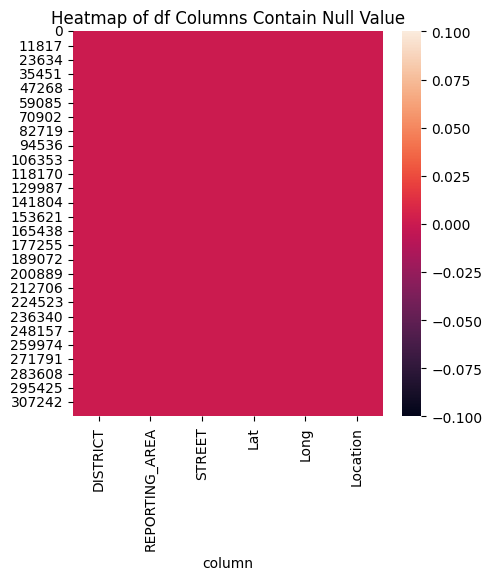

In [193]:
# Heatmap of df columns that contain null value
plt.figure(figsize=(5,5))
plt.title('Heatmap of df Columns Contain Null Value')
sns.heatmap(df[['DISTRICT','REPORTING_AREA','STREET','Lat','Long','Location']].isnull())
plt.xlabel('column')
plt.show()

In [194]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['Data Features', 'Data Type', 'Null', 'Unique', 'Unique Sample'],
                     data=listItem)
print(df.shape)
dfDesc

(319050, 18)


Data Features Data Type  Null  Unique                                               Unique Sample
0       INCIDENT_NUMBER    object     0  282517                                    [I152060802, I162019302]
1          OFFENSE_CODE     int64     0     221                                                [1832, 2632]
2    OFFENSE_CODE_GROUP    object     0      66                                      [BALLISTICS, GAMBLING]
3   OFFENSE_DESCRIPTION    object     0     221                    [HARASSMENT, BURGLARY - OTHER - ATTEMPT]
4              DISTRICT    object     0      12                                                   [D14, B3]
5        REPORTING_AREA    object     0     877                                                  [633, 355]
6              SHOOTING    object     0       2                                                      [Y, N]
7      OCCURRED_ON_DATE    object     0  233229                  [2015-09-23 12:30:00, 2016-10-02 04:30:00]
8                  YEAR     int64     0       4                                                [2018, 2015]
9                 MONTH     int64     0      12                                                      [5, 8]
10                  DAY     int64     0      31                                                      [1, 9]
11          DAY_OF_WEEK    object     0       7                                           [SUNDAY, TUESDAY]
12                 HOUR     int64     0      24                                                    [12, 15]
13             UCR_PART    object     0       4                            [PART ONE, JUSTIFIABLE PART ONE]
14               STREET    object     0    4583                           [SAINT CYPRIANS PL, LAMARTINE PL]
15                  Lat   float64     0   16906                                      [42.346693, 42.361056]
16                 Long   float64     0   16877                                    [-71.047738, -71.027189]
17             Location    object     0   18192  [(42.27267990, -71.10925935), (42.24915511, -71.14125117)]

In [195]:
df_cols_table()

Column Name  Number of Unique                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Unique Sample Description
0       INCIDENT_NUMBER            282517                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

## DATA ANALYSIS

As we already know, The BPD's mission statement is to fight crime, reduce fear, and improve the quality of life in Boston.

### FIGHT CRIME

In order to Fight Crime, The BPD want to know their performance of crime incident report in a given period of time as a whole and in each District.

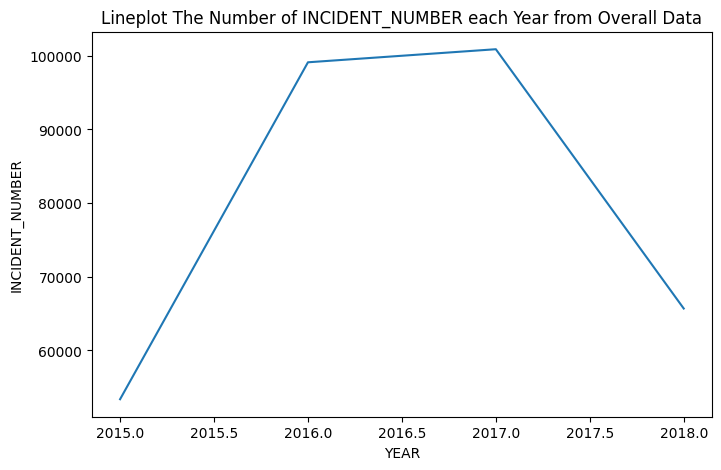

In [196]:
# Plot Lineplot The Number of INCIDENT_NUMBER each Year from Overall Data
y_in = df.groupby(['YEAR'])[['INCIDENT_NUMBER']].count().reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(data=y_in, x='YEAR', y='INCIDENT_NUMBER')
plt.title('Lineplot The Number of INCIDENT_NUMBER each Year from Overall Data')
plt.show()
# the result shows that there is increased number of INCIDENT_NUMBER from 2016 to 2017
# it show that The BPD can't fight the overall number of INCIDENT_NUMBER
# we exclude 2015 and 2018 because it hasn't complete data from the beginning to the end of year
# however, we can see the central tendency of the number of INCIDENT_NUMBER per day in 2016 and 2017
# then compare it with 2015 and 2018

In [197]:
# Add DATE column
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])
df['DATE'] = df['OCCURRED_ON_DATE'].dt.date
df['DATE'] = df['DATE'].astype(object)
df['OCCURRED_ON_DATE'] = df['OCCURRED_ON_DATE'].astype(object)
df[['DATE']].head()

DATE
0  2018-09-02
1  2018-08-21
2  2018-09-03
3  2018-09-03
4  2018-09-03

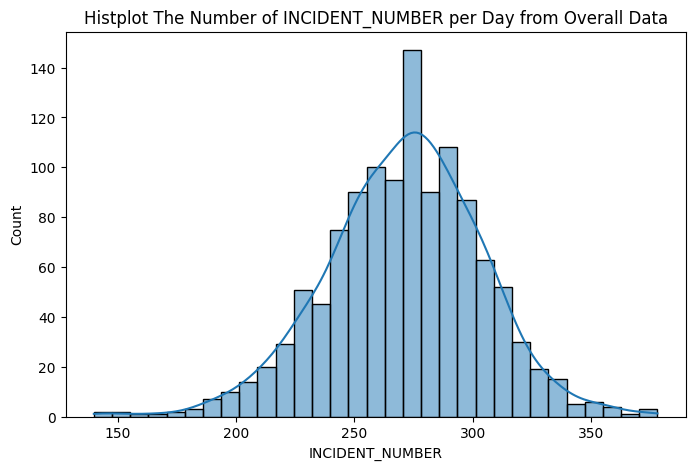

In [198]:
# Create Histplot
d_in = df.groupby(['DATE'])[['INCIDENT_NUMBER']].count().reset_index()
plt.figure(figsize=(8,5))
sns.histplot(d_in['INCIDENT_NUMBER'], kde = True)
plt.title('Histplot The Number of INCIDENT_NUMBER per Day from Overall Data')
plt.show()
# the result don't show clearly whether the data is normally distributed or not
# therefore, we need to perform Shapiro Wilk Test

In [199]:
# Shapiro Wilk Test
from scipy.stats import shapiro
sw_statistic, sw_pvalue = shapiro(d_in['INCIDENT_NUMBER'])

if sw_pvalue > 0.05 :
    print(f'P-Value: {sw_pvalue}. So, we assume a normal distribution')
else :
    print(f'P-Value: {sw_pvalue}. So, we do not assume a normal distribution')
# the result shows that The Number of INCIDENT_NUMBER per Day don't follow a normal distribution
# therefore, we need to use median as the measure of central tendency for The Number of INCIDENT_NUMBER per Day

P-Value: 6.404613668564707e-05. So, we do not assume a normal distribution


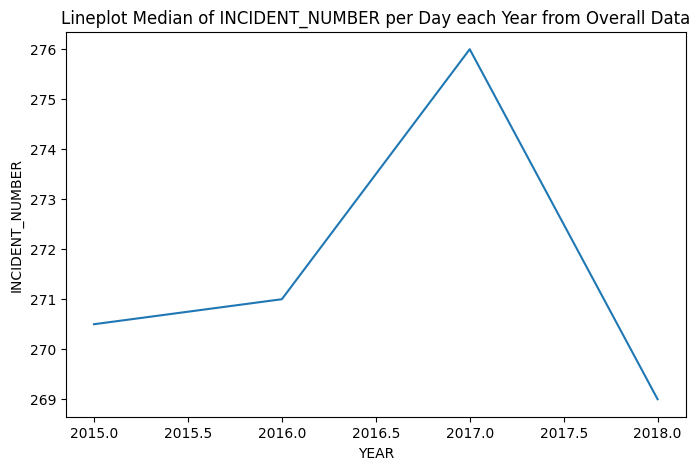

In [200]:
# Lineplot Median of INCIDENT_NUMBER per Day each Year from Overall Data 
d_in = df.groupby(['YEAR','DATE'])[['INCIDENT_NUMBER']].count().reset_index()
d_in = d_in.groupby(['YEAR'])[['INCIDENT_NUMBER']].median().reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(data=d_in, x='YEAR', y='INCIDENT_NUMBER')
plt.title('Lineplot Median of INCIDENT_NUMBER per Day each Year from Overall Data')
plt.show()
# the result shows that there is an increase median of INCIDENT_NUMBER per Day in 2016 to 2017
# median of INCIDENT_NUMBER per Day in 2016 and 2017 was greater than in 2015 and 2018
# therefore, we can say that there in an increase on INCIDENT_NUMBER per year and median of INCIDENT_NUMBER per Day
# although we don't have complete data for 2018 (only recorded until Sept 3, 2018),
# we can see there are declining trend of both INCIDENT_NUMBER per year and median of INCIDENT_NUMBER per Day
# if the BPD can maintain their performance until the end of 2018,
# the BPD could achieve their mission statement in term of Fight Crime
# let's check for each District

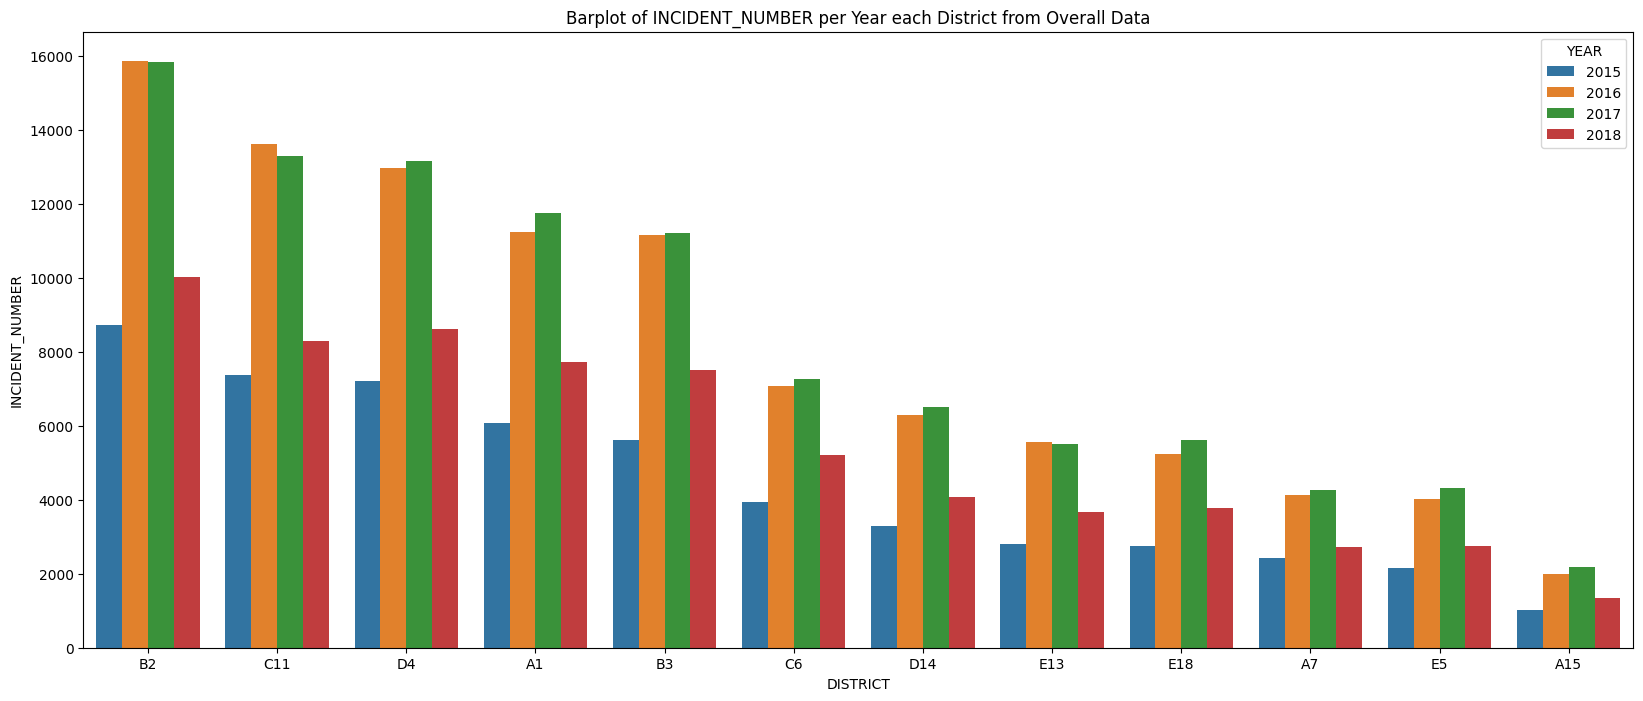

In [201]:
# Barplot of INCIDENT_NUMBER per Year each District from Overall Data
dy_in = df.groupby(['DISTRICT','YEAR'])[['INCIDENT_NUMBER']].count().reset_index()
plt.figure(figsize=(20,8))
sns.barplot(data=dy_in, x='DISTRICT', y='INCIDENT_NUMBER', hue='YEAR', order=df['DISTRICT'].value_counts().index)
plt.title('Barplot of INCIDENT_NUMBER per Year each District from Overall Data')
plt.show()
# the result shows that INCIDENT_NUMBER for each DISTRICT increased from year 2016 to 2017, 
# at D4,A1,B3,C6,D14,E18,A7,E5,A15
# and INCIDENT_NUMBER decreased from year 2016 to 2017 at B2, C11, and E13
# The BPD focused Fight Crime on the District with the most INCIDENT_NUMBER (B2 and C11)
# let's check for Median of INCIDENT_NUMBER per Day each District per Year

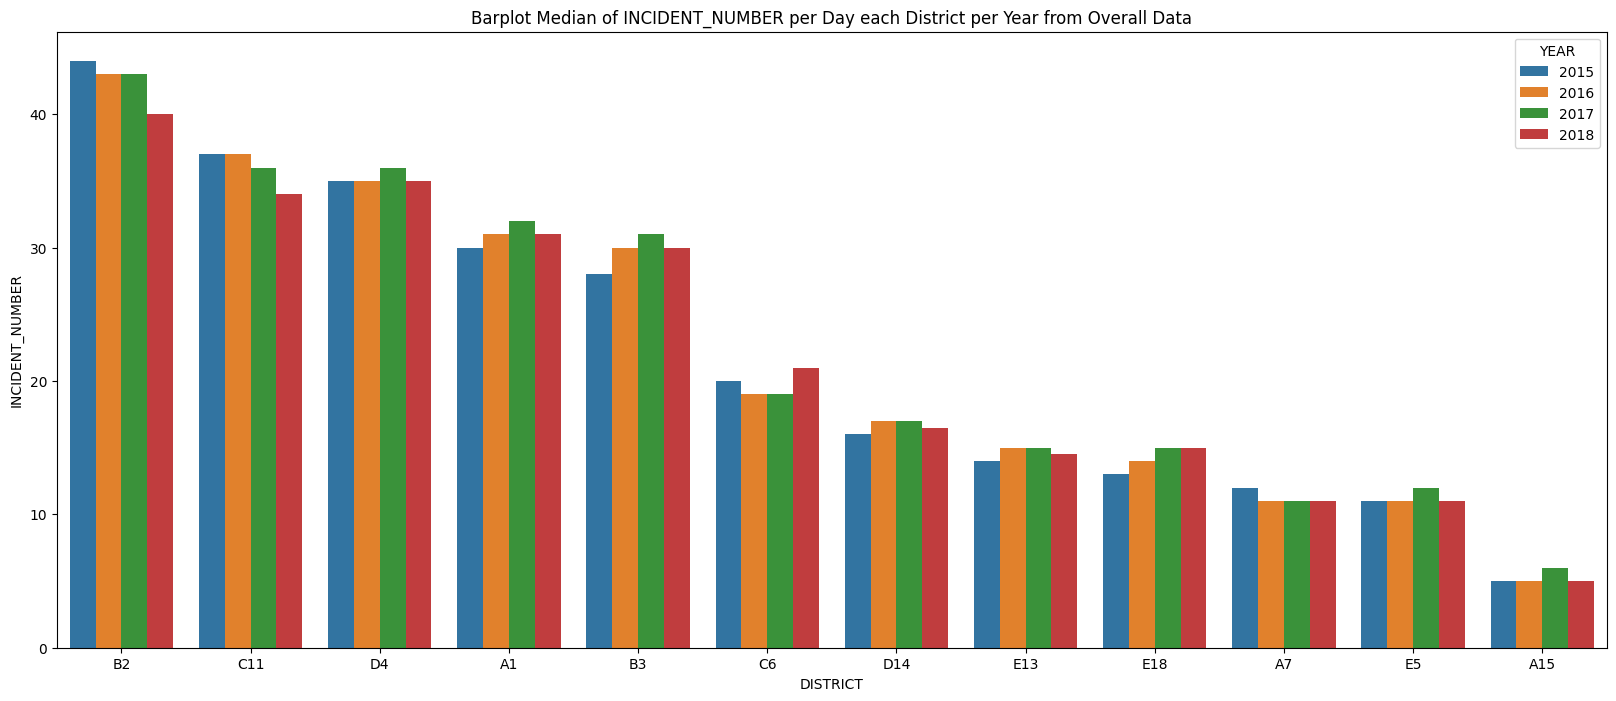

In [202]:
# Barplot Median of INCIDENT_NUMBER per Day each District per Year from Overall Data
dd_in = df.groupby(['DISTRICT','YEAR','DATE'])[['INCIDENT_NUMBER']].count().reset_index()
dd_in = dd_in.groupby(['DISTRICT','YEAR'])[['INCIDENT_NUMBER']].median().reset_index()
plt.figure(figsize=(20,8))
sns.barplot(data=dd_in, x='DISTRICT', y='INCIDENT_NUMBER', hue='YEAR', order=df['DISTRICT'].value_counts().index)
plt.title('Barplot Median of INCIDENT_NUMBER per Day each District per Year from Overall Data')
plt.show()
# the result shows that if The BPD maintain their performance until the end of 2018,
# The BPD could reduce median of INCIDENT_NUMBER per Day on each District
# it's because median of INCIDENT_NUMBER per Day on each District show decreased trend, except for C6
# therefore, the BPD need to focused their service especially on C6 in order to Fight Crime

### REDUCE FEAR

In order to Reduce Fear, The BPD want to know offenses that occur following which UCR Part determined by The FBI.

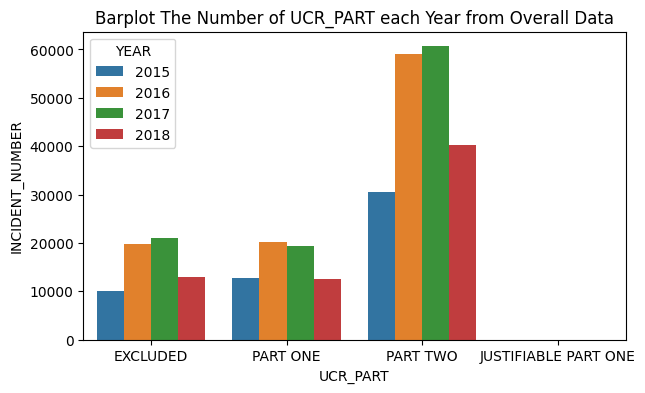

In [203]:
# Plot Barplot The Number of UCR_PART each Year from Overall Data
up_in = df.groupby(['YEAR','UCR_PART'])[['INCIDENT_NUMBER']].count().reset_index()
plt.figure(figsize=(7,4))
sns.barplot(data=up_in, x='UCR_PART', y='INCIDENT_NUMBER', hue='YEAR')
plt.title('Barplot The Number of UCR_PART each Year from Overall Data')
plt.show()
# the result shows that there is decreased number of UCR PART ONE from 2016 to 2017
# and increased number of UCR PART TWO and EXCLUDED from UCR PART from 2016 to 2017
# we exclude 2015 and 2018 because it hasn't complete data from the begining to the end of year
# since UCR PART ONE is a critical crime that can lead fear to the citizen,
# The BPD seems could achieve their mission statement in term of Reduce Fear
# however, we can see the median of the number of UCR_PART per day in 2016 and 2017 
# then compare it with 2015 and 2018

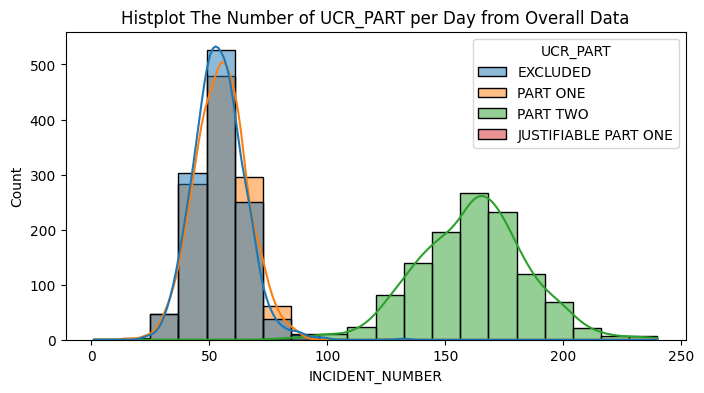

In [204]:
# Create Histplot
up_in = df.groupby(['YEAR','DATE','UCR_PART'])[['INCIDENT_NUMBER']].count().reset_index()
plt.figure(figsize=(8,4))
sns.histplot(data=up_in, x='INCIDENT_NUMBER', hue='UCR_PART', kde=True)
plt.title('Histplot The Number of UCR_PART per Day from Overall Data')
plt.show()
# the result shows that UCR PART ONE seems normally distributed
# while UCR PART TWO and EXCLUDED FROM UCR PART seems don't follow normal distribution
# let's perform Shapiro Wilk Test

In [205]:
# Shapiro Wilk Test
sw_statistic, sw_pvalue = shapiro(up_in[up_in['UCR_PART']=='PART ONE']['INCIDENT_NUMBER'])

if sw_pvalue > 0.05 :
    print(f'P-Value: {sw_pvalue}. So, we assume a normal distribution')
else :
    print(f'P-Value: {sw_pvalue}. So, we do not assume a normal distribution')
# the result shows that The Number of UCR PART ONE per Day follow a normal distribution
# therefore, we need to use mean as the measure of central tendency for The Number of UCR PART ONE per Day

P-Value: 0.15095016360282898. So, we assume a normal distribution


In [206]:
# Shapiro Wilk Test
sw_statistic, sw_pvalue = shapiro(up_in[up_in['UCR_PART']=='PART TWO']['INCIDENT_NUMBER'])

if sw_pvalue > 0.05 :
    print(f'P-Value: {sw_pvalue}. So, we assume a normal distribution')
else :
    print(f'P-Value: {sw_pvalue}. So, we do not assume a normal distribution')
# the result shows that The Number of UCR PART TWO per Day don't follow a normal distribution
# therefore, we need to use median as the measure of central tendency for The Number of UCR PART TWO per Day

P-Value: 0.011123272590339184. So, we do not assume a normal distribution


In [207]:
# Shapiro Wilk Test
sw_statistic, sw_pvalue = shapiro(up_in[up_in['UCR_PART']=='EXCLUDED']['INCIDENT_NUMBER'])

if sw_pvalue > 0.05 :
    print(f'P-Value: {sw_pvalue}. So, we assume a normal distribution')
else :
    print(f'P-Value: {sw_pvalue}. So, we do not assume a normal distribution')
# the result shows that The Number of EXCLUDED FROM UCR PART per Day don't follow a normal distribution
# therefore, we need to use median as the measure of central tendency for The Number of EXCLUDED FROM UCR PART per Day

P-Value: 9.389660273265155e-13. So, we do not assume a normal distribution


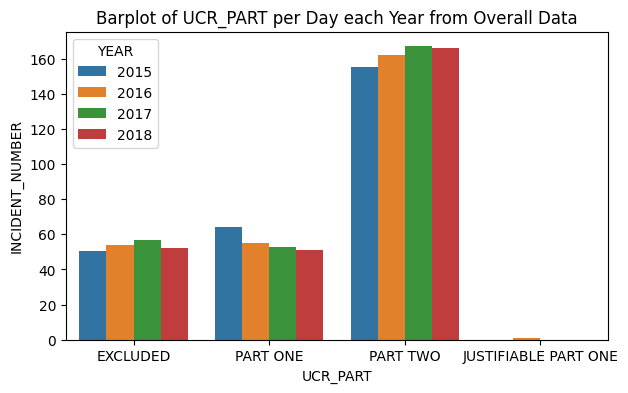

In [208]:
# Barplot of UCR_PART per Day each Year from Overall Data
up_in = df.groupby(['YEAR','DATE','UCR_PART'])[['INCIDENT_NUMBER']].count().reset_index().groupby(['YEAR','UCR_PART'])[['INCIDENT_NUMBER']].median().reset_index()
plt.figure(figsize=(7,4))
sns.barplot(data=up_in, x='UCR_PART', y='INCIDENT_NUMBER', hue='YEAR')
plt.title('Barplot of UCR_PART per Day each Year from Overall Data')
plt.show()
# the result shows that there is a decreased of UCR PART ONE per Day from 2015 to 2018
# it indicated that The BPD could achieve their mission statement in term of Reduce Fear
# however, UCR PART TWO also need to be monitored by the BPD
# UCR PART TWO per Day increased from 2015 to 2017, but it show a decreased in 2018
# if the BPD can mantain their performance until the end of 2018,
# the BPD could reduce UCR PART TWO per Day in 2018 
# and broader it's mission statement in term of Reduce Fear both on UCR PART ONE per Day and UCR PART TWO per Day
# it's applied same trend for EXCLUDED FROM UCR PART
# let's check for each District

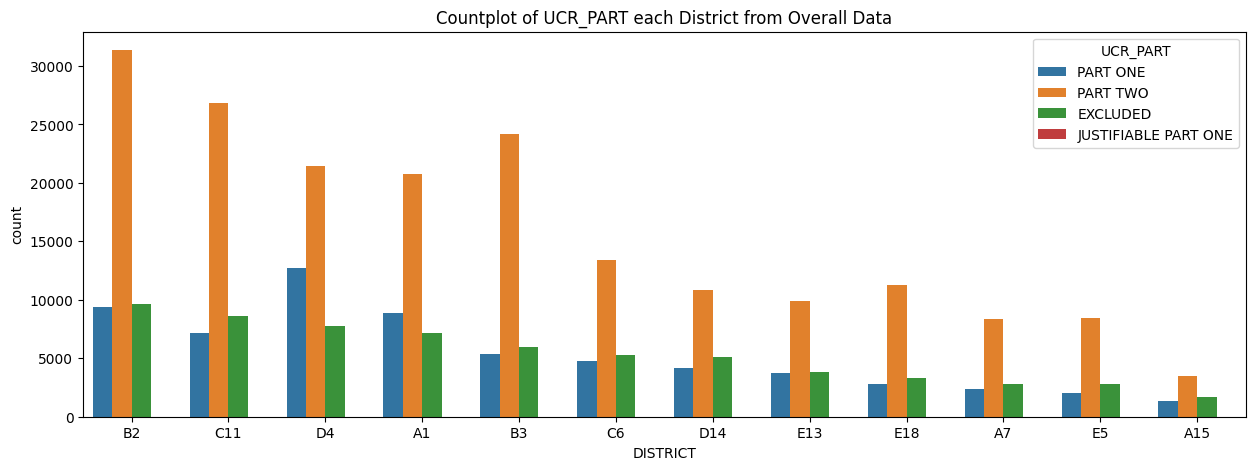

In [245]:
# Countplot of UCR_PART each District from Overall Data
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='DISTRICT', hue='UCR_PART', order=df['DISTRICT'].value_counts().index)
plt.title('Countplot of UCR_PART each District from Overall Data')
plt.show()
# the result shows that the most UCR_PART on each DISTRICT is PART TWO
# D4 has the most UCR PART ONE, 
# therefore The BPD need to focused their service in term of Reduce Fear at D4
# let's check for UCR_PART each District per Day

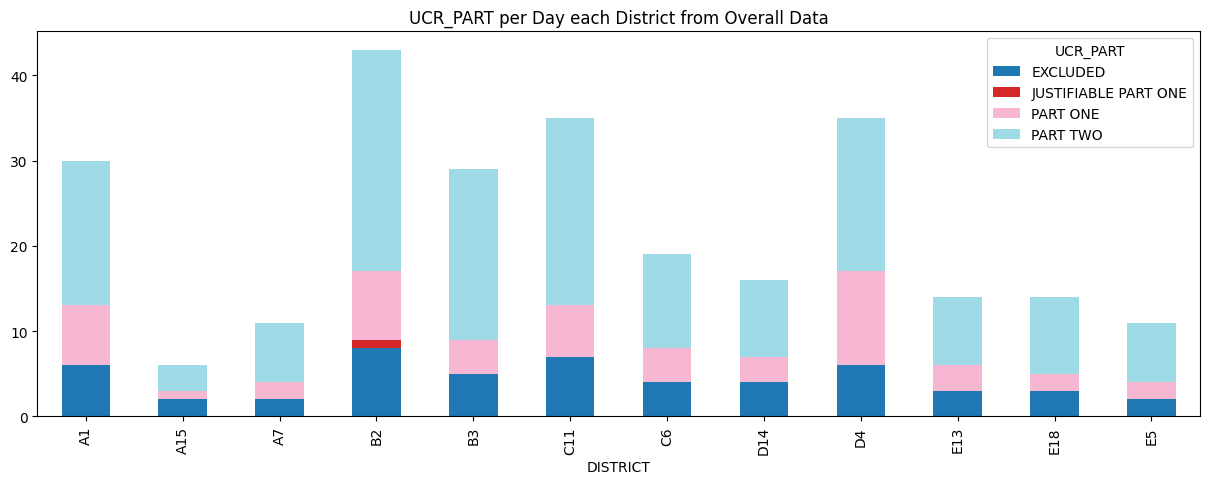

In [210]:
# Barplot of UCR_PART per Day each District from Overall Data
d_up = df.groupby(['DISTRICT','UCR_PART','DATE'])[['INCIDENT_NUMBER']].count().reset_index()
d_up = d_up.groupby(['DISTRICT','UCR_PART'])[['INCIDENT_NUMBER']].median().reset_index().sort_values('INCIDENT_NUMBER', ascending=False)
df_pivot = pd.pivot_table(d_up, index='DISTRICT', columns='UCR_PART', values='INCIDENT_NUMBER', aggfunc='sum')
df_pivot.plot.bar(stacked=True, colormap='tab20', figsize=(15,5), title='UCR_PART per Day each District from Overall Data')
plt.show()
# the result shows that The BPD need to focused on D4 first since it has the most UCR PART ONE per day
# then focused on B2 since it has the most UCR PART TWO per day
# in order to achieve The BPD mission statement in term of Reduce Fear

### IMPROVE THE QUALITY OF LIFE

In order to Inprove The Quality of Life, The BPD want to know the tendencies that trigger offenses in order to provide better service and awareness to citizens.

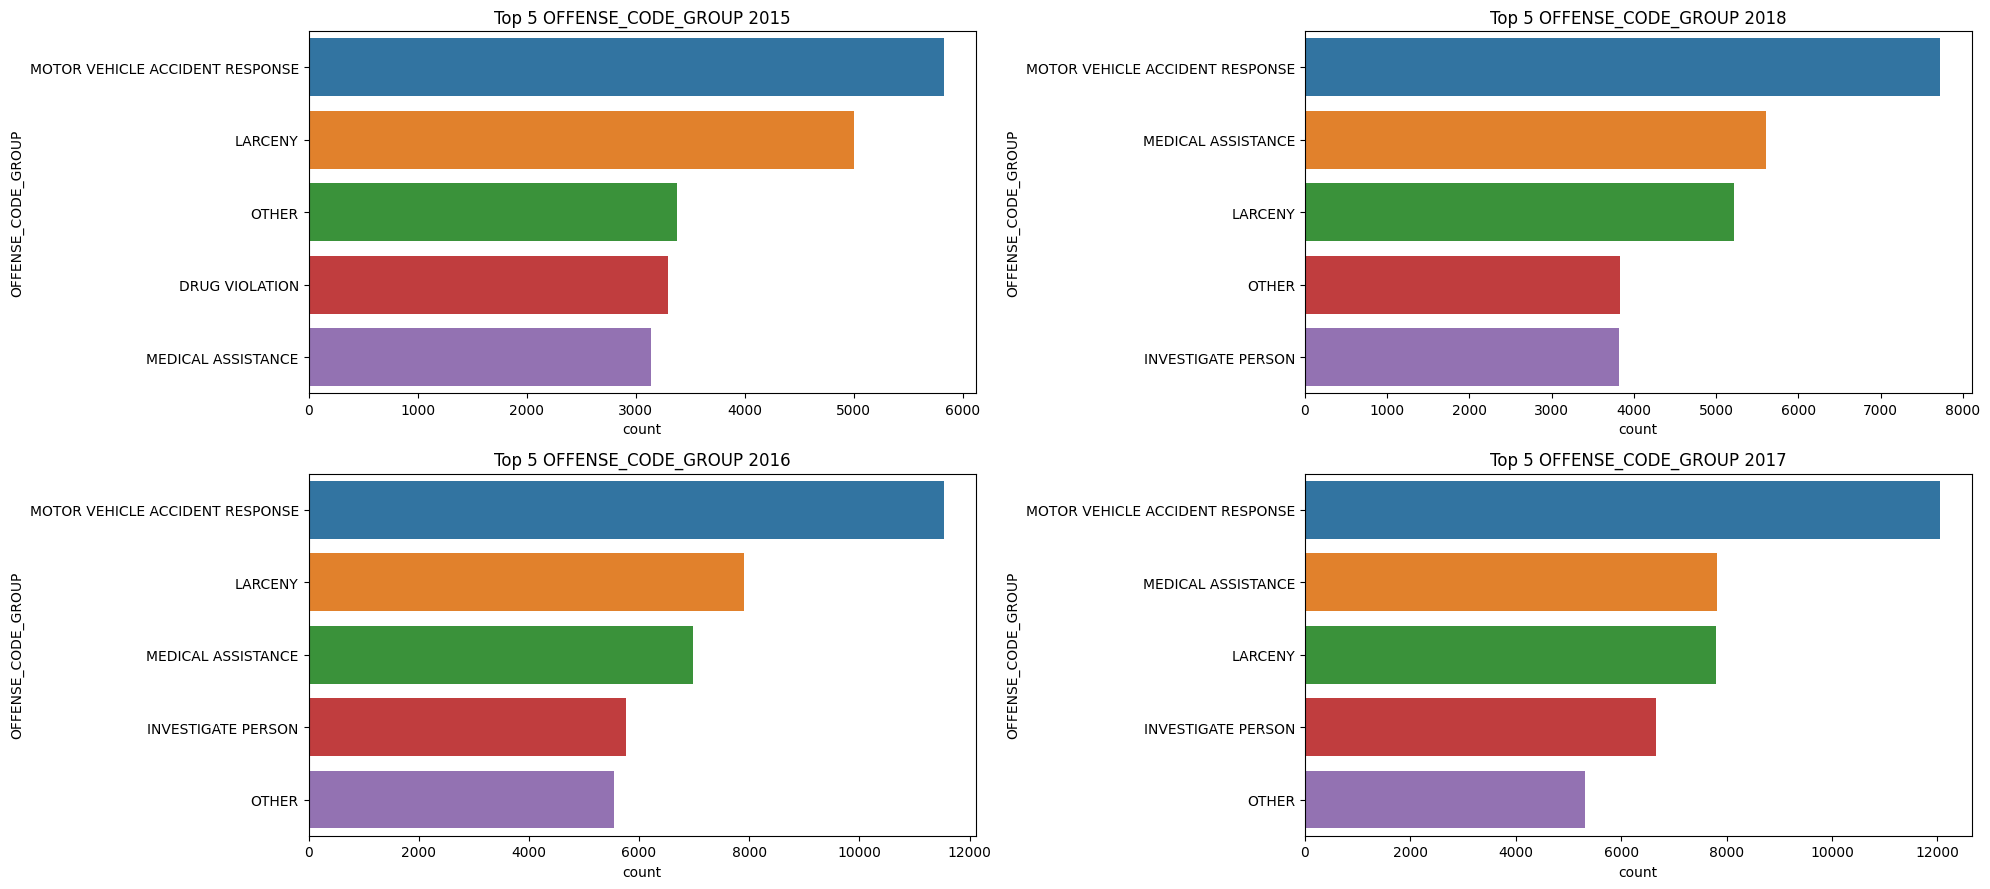

In [211]:
# Top 5 OFFENSE_CODE_GROUP per Year from Overall Data
fig, axs = plt.subplots(2,2)
sns.countplot(data = df[df['YEAR']==2015], y='OFFENSE_CODE_GROUP', order=df[df['YEAR']==2015]['OFFENSE_CODE_GROUP'].value_counts().head(5).index, ax=axs[0,0])
axs[0,0].set_title("Top 5 OFFENSE_CODE_GROUP 2015")
sns.countplot(data = df[df['YEAR']==2016], y='OFFENSE_CODE_GROUP', order=df[df['YEAR']==2016]['OFFENSE_CODE_GROUP'].value_counts().head(5).index, ax=axs[1,0])
axs[1,0].set_title("Top 5 OFFENSE_CODE_GROUP 2016")
sns.countplot(data = df[df['YEAR']==2017], y='OFFENSE_CODE_GROUP', order=df[df['YEAR']==2017]['OFFENSE_CODE_GROUP'].value_counts().head(5).index, ax=axs[1,1])
axs[1,1].set_title("Top 5 OFFENSE_CODE_GROUP 2017")
sns.countplot(data = df[df['YEAR']==2018], y='OFFENSE_CODE_GROUP', order=df[df['YEAR']==2018]['OFFENSE_CODE_GROUP'].value_counts().head(5).index, ax=axs[0,1])
axs[0,1].set_title("Top 5 OFFENSE_CODE_GROUP 2018")
fig.tight_layout()
# the result shows that the most OFFENSE_CODE_GROUP from 2015 to 2018 didn't change which is MOTOR VEHICLE ACCIDENT RESPONSE
# while the rest top 2 to top 5 OFFENSE_CODE_GROUP could differ from 2015 to 2018
# therefore, The BPD could pay attention to MOTOR VEHICLE ACCIDENT RESPONSE
# however, OFFENSE_CODE_GROUP consist of several OFFENSE_DESCRIPTION
# let's check top 5 OFFENSE_DESCRIPTION per year from overall data

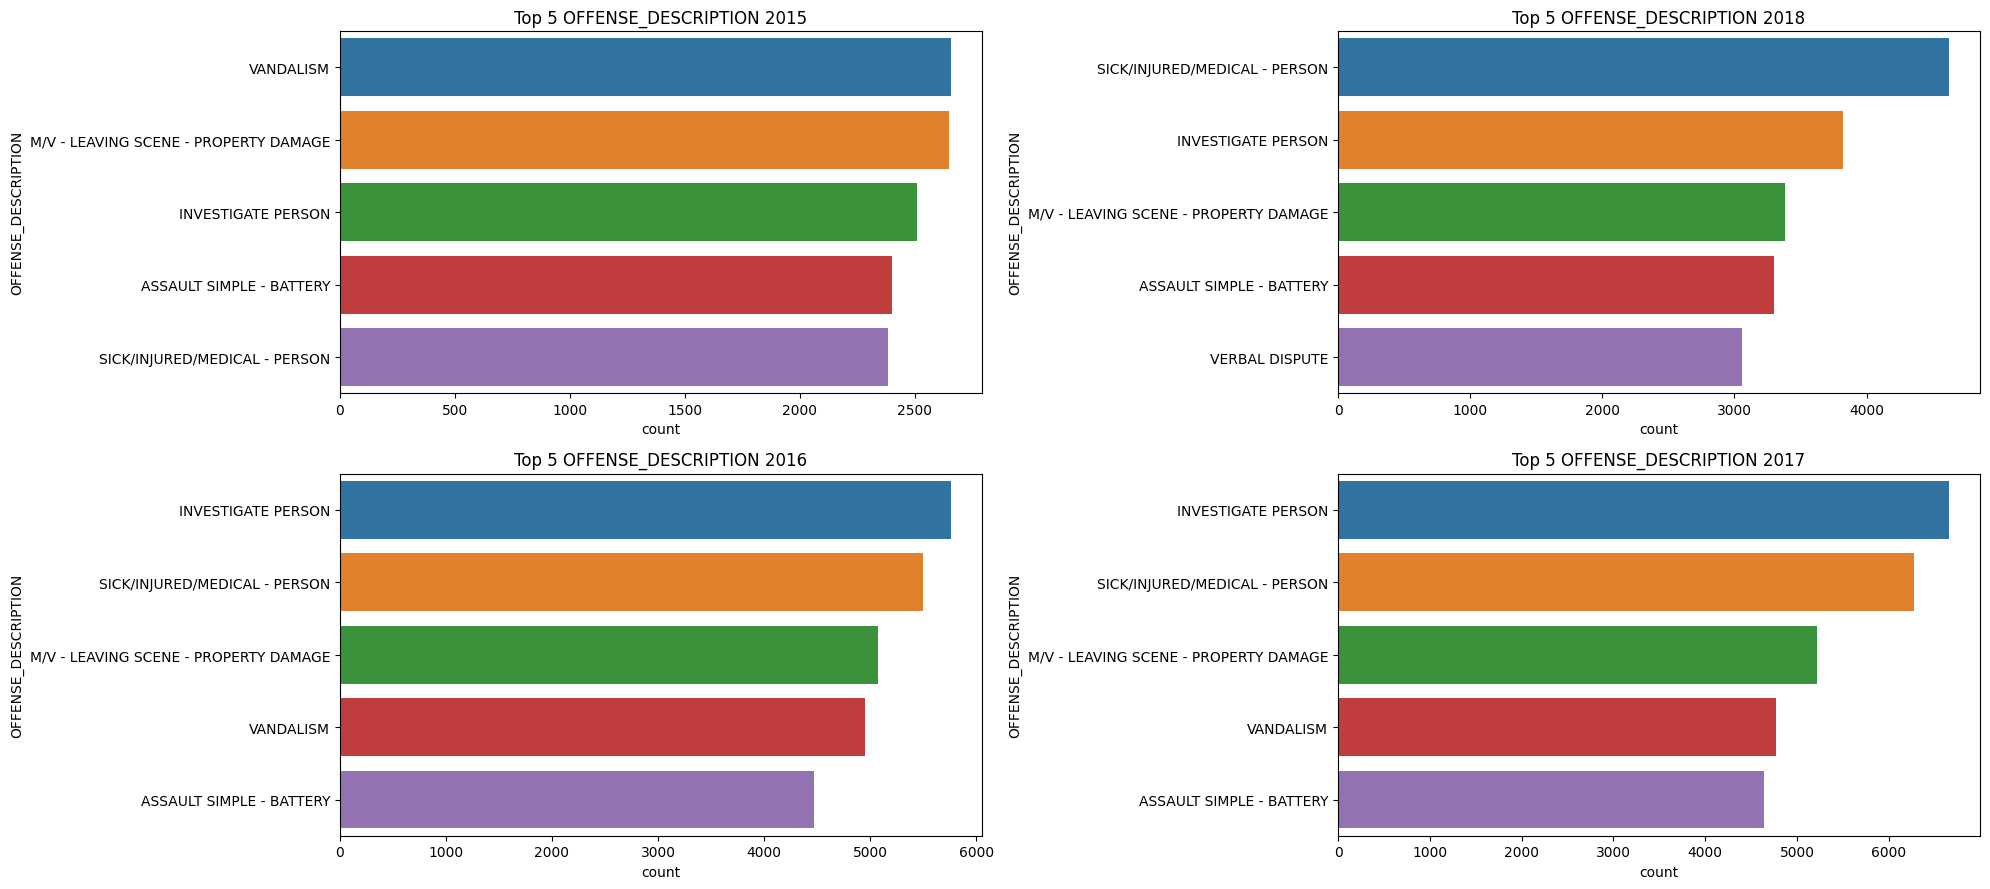

In [212]:
# Top 5 OFFENSE_DESCRIPTION per Year from Overall Data
fig, axs = plt.subplots(2,2)
sns.countplot(data = df[df['YEAR']==2015], y='OFFENSE_DESCRIPTION', order=df[df['YEAR']==2015]['OFFENSE_DESCRIPTION'].value_counts().head(5).index, ax=axs[0,0])
axs[0,0].set_title("Top 5 OFFENSE_DESCRIPTION 2015")
sns.countplot(data = df[df['YEAR']==2016], y='OFFENSE_DESCRIPTION', order=df[df['YEAR']==2016]['OFFENSE_DESCRIPTION'].value_counts().head(5).index, ax=axs[1,0])
axs[1,0].set_title("Top 5 OFFENSE_DESCRIPTION 2016")
sns.countplot(data = df[df['YEAR']==2017], y='OFFENSE_DESCRIPTION', order=df[df['YEAR']==2017]['OFFENSE_DESCRIPTION'].value_counts().head(5).index, ax=axs[1,1])
axs[1,1].set_title("Top 5 OFFENSE_DESCRIPTION 2017")
sns.countplot(data = df[df['YEAR']==2018], y='OFFENSE_DESCRIPTION', order=df[df['YEAR']==2018]['OFFENSE_DESCRIPTION'].value_counts().head(5).index, ax=axs[0,1])
axs[0,1].set_title("Top 5 OFFENSE_DESCRIPTION 2018")
fig.tight_layout()
# we exclude 2015 and 2018 because it hasn't complete data from the begining to the end of year and shows different top 5 OFFENSE_DESCRIPTION
# the result shows that the top 5 OFFENSE_DESCRIPTION in 2016 remain the same order in 2017 
# therefore, The BPD could pay attention to the top 5 OFFENSE_DESCRIPTION in order to Improve The Quality of Life
# Let's check the trend of the top 5 OFFENSE_DESCRIPTION in 2016 and 2017

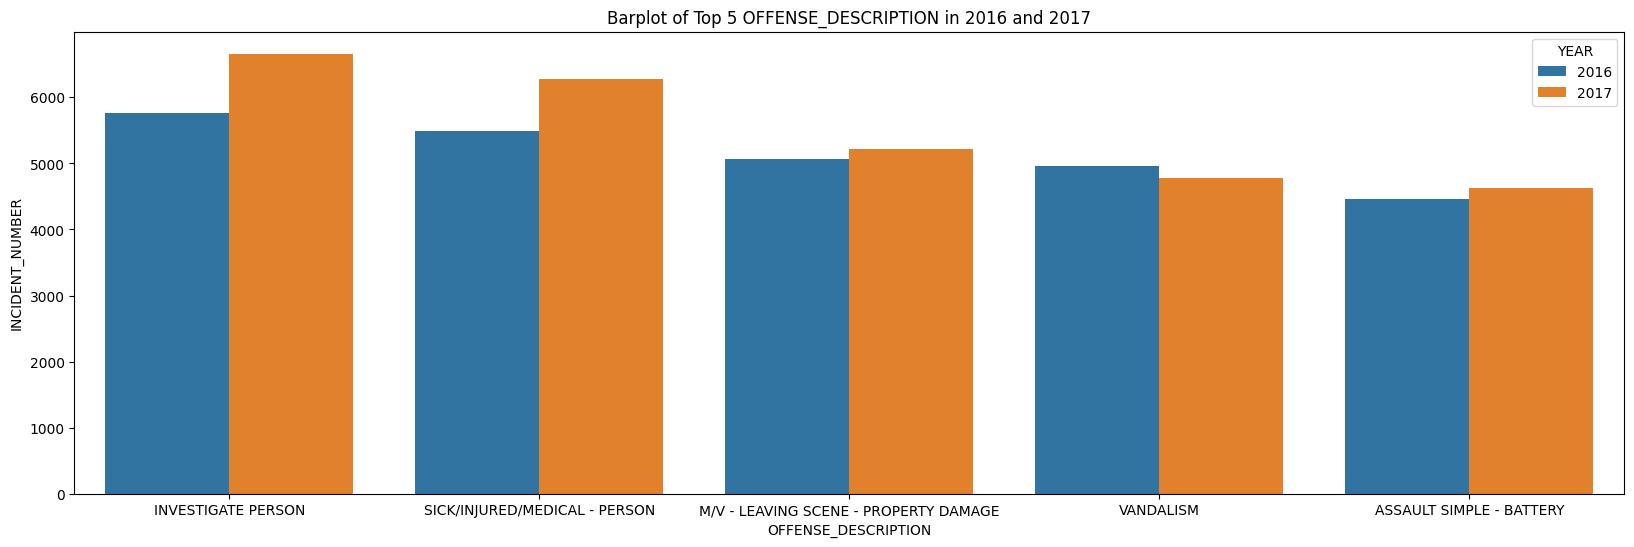

In [213]:
# Trend of the top 5 OFFENSE_DESCRIPTION in 2016 and 2017
df_1617 = df[(df['YEAR']>2015) & (df['YEAR']<2018)]
df_1617 = df_1617.groupby(['YEAR','OFFENSE_DESCRIPTION','UCR_PART'])[['INCIDENT_NUMBER']].count().reset_index().sort_values(by='INCIDENT_NUMBER', ascending=False).head(10)
plt.figure(figsize=(20,6))
sns.barplot(data=df_1617, x='OFFENSE_DESCRIPTION', y='INCIDENT_NUMBER', hue='YEAR')
plt.title('Barplot of Top 5 OFFENSE_DESCRIPTION in 2016 and 2017')
plt.show()
# the result shows that only VANDALISM had decreased trend
# meanwhile the other top 5 OFFENSE_DESCRIPTION in 2016 and 2017 had increased trend
# let's check the top 5 OFFENSE_DESCRIPTION falls into which UCR_PART

In [214]:
# Treemap of UCR_PART accoding to OFFENSE_DESCRIPTION
up_od = df.groupby(['UCR_PART','OFFENSE_DESCRIPTION'])[['INCIDENT_NUMBER']].count().reset_index()
up_od['all'] = 'all'
fig = px.treemap(up_od, path=['all', 'UCR_PART', 'OFFENSE_DESCRIPTION'], values='INCIDENT_NUMBER',color='INCIDENT_NUMBER',color_continuous_scale='RdBu')
fig.show()
# the result shows that all the top 5 OFFENSE_DESCRIPTION falls into UCR PART TWO,
# except M/V  - LEAVING SCENE - PROPERTY DAMAGE is EXCLUDED FROM UCR PART
# since VANDALISM is categorized as UCR PART TWO, 
# it indicated that The BPD seems could Improve The Quality of Life

c:\Users\Hanifah\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:1594: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)
c:\Users\Hanifah\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:1594: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)
c:\Users\Hanifah\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:1594: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)


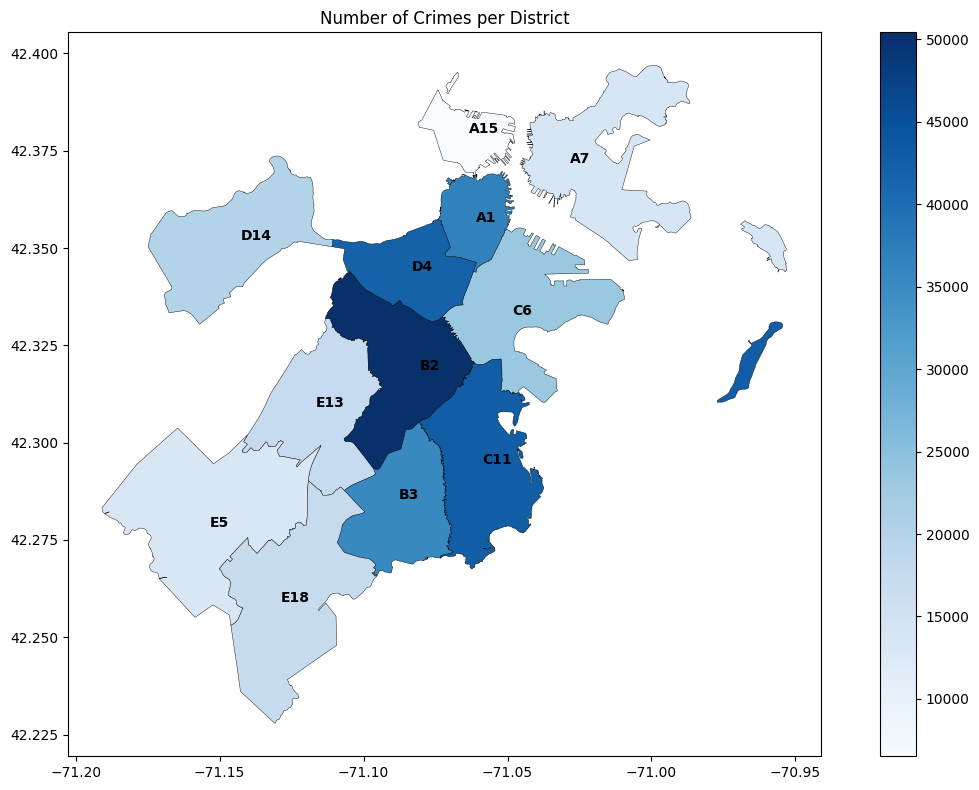

In [215]:
# Maps of Number of Crimes per District
import geopandas as gpd
gdf = gpd.read_file('Police_Districts.shp')
districts = pd.DataFrame({'Count': df.DISTRICT.value_counts().sort_values(ascending = False)})
gdf['crimes'] = gdf.DISTRICT.map(districts['Count'])
gdf['point'] = gdf.representative_point()
label_points = gdf.copy()
label_points.set_geometry('point', inplace = True)
ax = gdf.plot(column = gdf.crimes, cmap = 'Blues', legend = True, edgecolor = 'black', linewidth = 0.3, figsize = (12,8))
def add_label():
    for x, y, label in zip(label_points.geometry.x, label_points.geometry.y, label_points['DISTRICT']):
        plt.text(x, y, label, fontsize = 10, fontweight = 'bold')
add_label()
plt.title('Number of Crimes per District')
plt.tight_layout()
# the result shows that B2 had the most Number of Crimes
# B2 is also the District where The BPD Headquarters is located
# the number of crimes in which a District located near B2 tends to has higher number of crimes,
# compared to a District located farther from B2
# therefore, The BPD might reassign their police officer placement
# and prioritized more police officer on Distict where high Number of Crimes
# in order to achieve their mission statement in term of Improve The Quality of Life

In [216]:
# Maps of Number of Crimes per District using Choropleth
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

d_vc = df['DISTRICT'].value_counts()

districts = gdf[['DISTRICT', 'geometry']].set_index('DISTRICT')

map = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=12)

Choropleth(geo_data=districts.__geo_interface__, data=d_vc, key_on="feature.id", fill_color='YlGnBu', 
           legend_name='Number of Incident').add_to(map)

map
# the result shows that B2 had the most Number of Crimes
# then, SHOOTING column indicated a shooting took place
# The BPD need to make sure that SHOOTING perform properly according to the UCR PART

In [217]:
# Chi-Squared Test
s_up = df.groupby(['SHOOTING','UCR_PART'])[['INCIDENT_NUMBER']].count().reset_index()
sup_p = s_up.pivot_table(values='INCIDENT_NUMBER', index=['SHOOTING'], columns=['UCR_PART'])
sup_p = pd.DataFrame(sup_p.to_records())
sup_p.set_index('SHOOTING', inplace=True)
sup_p.fillna(value=0, inplace=True)

# Ho : SHOOTING and UCR_PART are independent
# Ha : SHOOTING and UCR_PART are dependent

from scipy.stats import chi2_contingency

stat, pvalue, dof, expected = chi2_contingency(sup_p)

alpha = 0.05
print('p-value:', pvalue)
if pvalue <= alpha:
    print('SHOOTING and UCR_PART are dependent (Reject Ho)')
else :
    print('SHOOTING and UCR_PART are independent (Failed to Reject Ho)')

# the result shows that SHOOTING and UCR_PART are dependent
# it indicated that The BPD had already performed SHOOTING properly according to the UCR PART
# then, The BPD want to know :
# is Public Holiday become one of factor that trigger the number of crimes in 2016 and 2017?

p-value: 4.258486583443251e-302
SHOOTING and UCR_PART are dependent (Reject Ho)


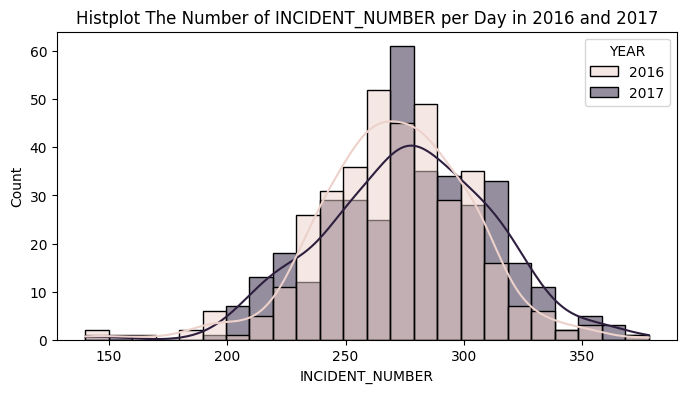

In [218]:
# Histplot The Number of INCIDENT_NUMBER per Day in 2016 and 2017
yd_in = df[(df['YEAR']>2015) & (df['YEAR']<2018)].groupby(['YEAR','DATE'])[['INCIDENT_NUMBER']].count().reset_index()
plt.figure(figsize=(8,4))
sns.histplot(data=yd_in, x='INCIDENT_NUMBER', hue='YEAR', kde=True)
plt.title('Histplot The Number of INCIDENT_NUMBER per Day in 2016 and 2017')
plt.show()
# the result shows unclear whether 2016 and 2017 follow normal distribution or not
# let's perform Shapiro Wilk Test

In [219]:
# Shapiro Wilk Test
sw_statistic, sw_pvalue = shapiro(yd_in[yd_in['YEAR']==2016]['INCIDENT_NUMBER'])

if sw_pvalue > 0.05 :
    print(f'P-Value: {sw_pvalue}. So, we assume a normal distribution')
else :
    print(f'P-Value: {sw_pvalue}. So, we do not assume a normal distribution')
# the result shows that The Number of crimes per Day in 2016 don't follow a normal distribution
# therefore, we need to use median as the measure of central tendency for The Number of crimes per Day in 2016 

P-Value: 0.0003840014396701008. So, we do not assume a normal distribution


In [220]:
# Shapiro Wilk Test
sw_statistic, sw_pvalue = shapiro(yd_in[yd_in['YEAR']==2017]['INCIDENT_NUMBER'])

if sw_pvalue > 0.05 :
    print(f'P-Value: {sw_pvalue}. So, we assume a normal distribution')
else :
    print(f'P-Value: {sw_pvalue}. So, we do not assume a normal distribution')
# the result shows that The Number of crimes per Day in 2017 follow a normal distribution
# therefore, we need to use mean as the measure of central tendency for The Number of crimes per Day in 2017

P-Value: 0.11382389813661575. So, we assume a normal distribution


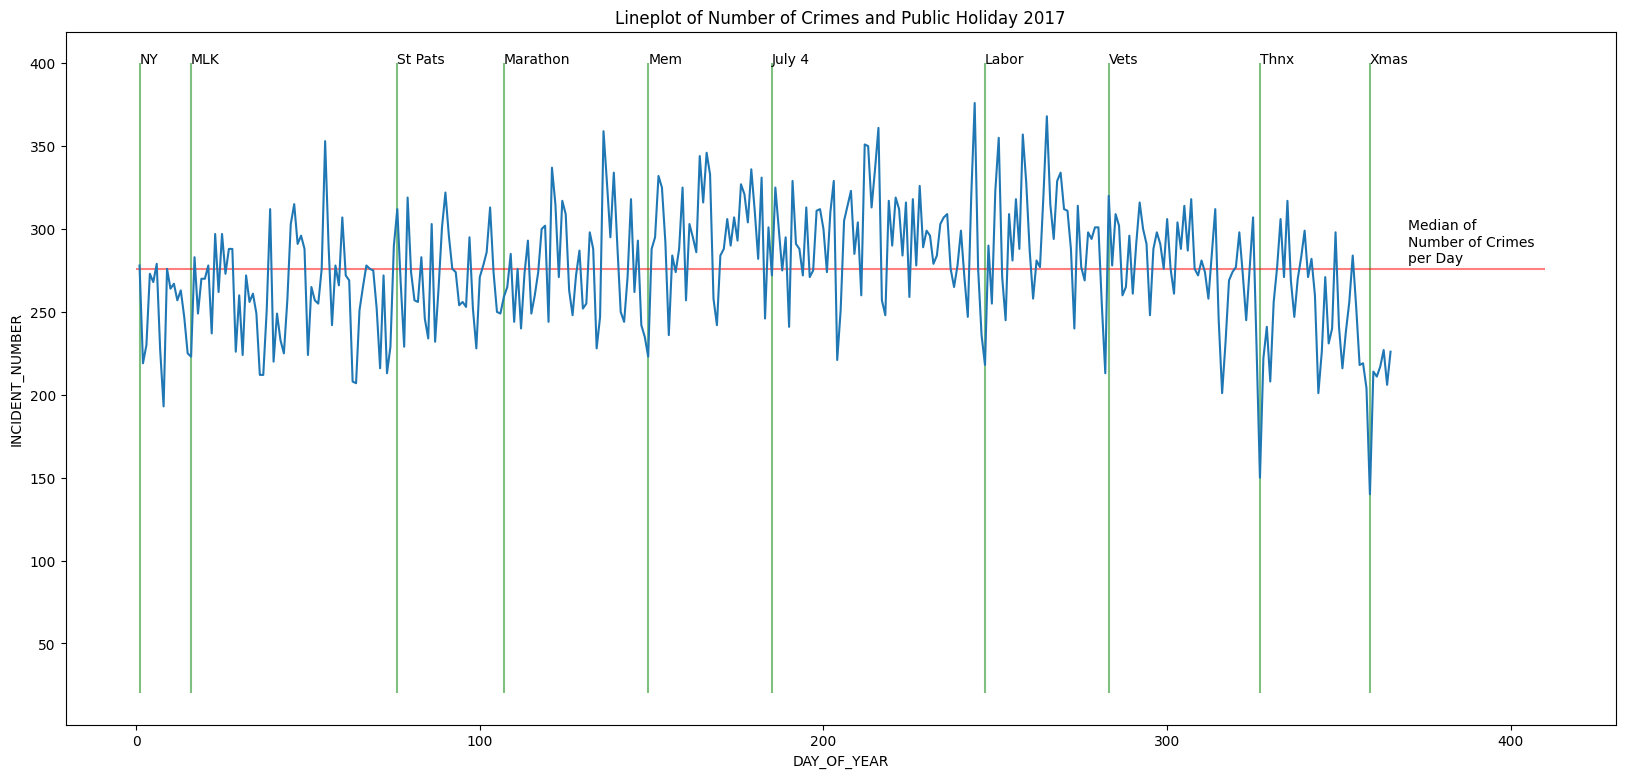

In [221]:
# Lineplot of Number of Crimes and Public Holiday 2017
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])
df['DAY_OF_YEAR'] = df['OCCURRED_ON_DATE'].dt.dayofyear
df['DAY_OF_YEAR'] = df['DAY_OF_YEAR'].astype(object)
df['OCCURRED_ON_DATE'] = df['OCCURRED_ON_DATE'].astype(object)

# We only use 2016 and 2017 which have complete data from the begining to the end of year
doy_in = df[df['YEAR']==2017].groupby(['YEAR','DAY_OF_YEAR'])[['INCIDENT_NUMBER']].count().reset_index()

# Dates of Public Holidays
holidays_2017 = pd.Series(['2017-01-01', # New Years Day
                     '2017-01-16', # MLK Day
                     '2017-03-17', # St. Patrick's Day
                     '2017-04-17', # Boston marathon
                     '2017-05-29', # Memorial Day
                     '2017-07-04', # Independence Day
                     '2017-09-04', # Labor Day
                     '2017-10-10', # Veterans Day
                     '2017-11-23', # Thanksgiving
                     '2017-12-25']) # Christmas
holidays_2017 = pd.to_datetime(holidays_2017).dt.dayofyear
holidays_names = ['NY',
                 'MLK',
                 'St Pats',
                 'Marathon',
                 'Mem',
                 'July 4',
                 'Labor',
                 'Vets',
                 'Thnx',
                 'Xmas']

plt.vlines(holidays_2017, 20, 400, alpha=0.5, color ='g')
for i in range(len(holidays_2017)):
    plt.text(x=holidays_2017[i], y=400, s=holidays_names[i])

plt.hlines(yd_in[yd_in['YEAR']==2017]['INCIDENT_NUMBER'].median(), 0, 410, alpha=0.5, color ='r')
plt.text(x=370, y=280, s='Median of \nNumber of Crimes \nper Day')

sns.lineplot(data=doy_in, x='DAY_OF_YEAR', y='INCIDENT_NUMBER')

plt.title('Lineplot of Number of Crimes and Public Holiday 2017')
plt.show()
# let's we plot for 2016

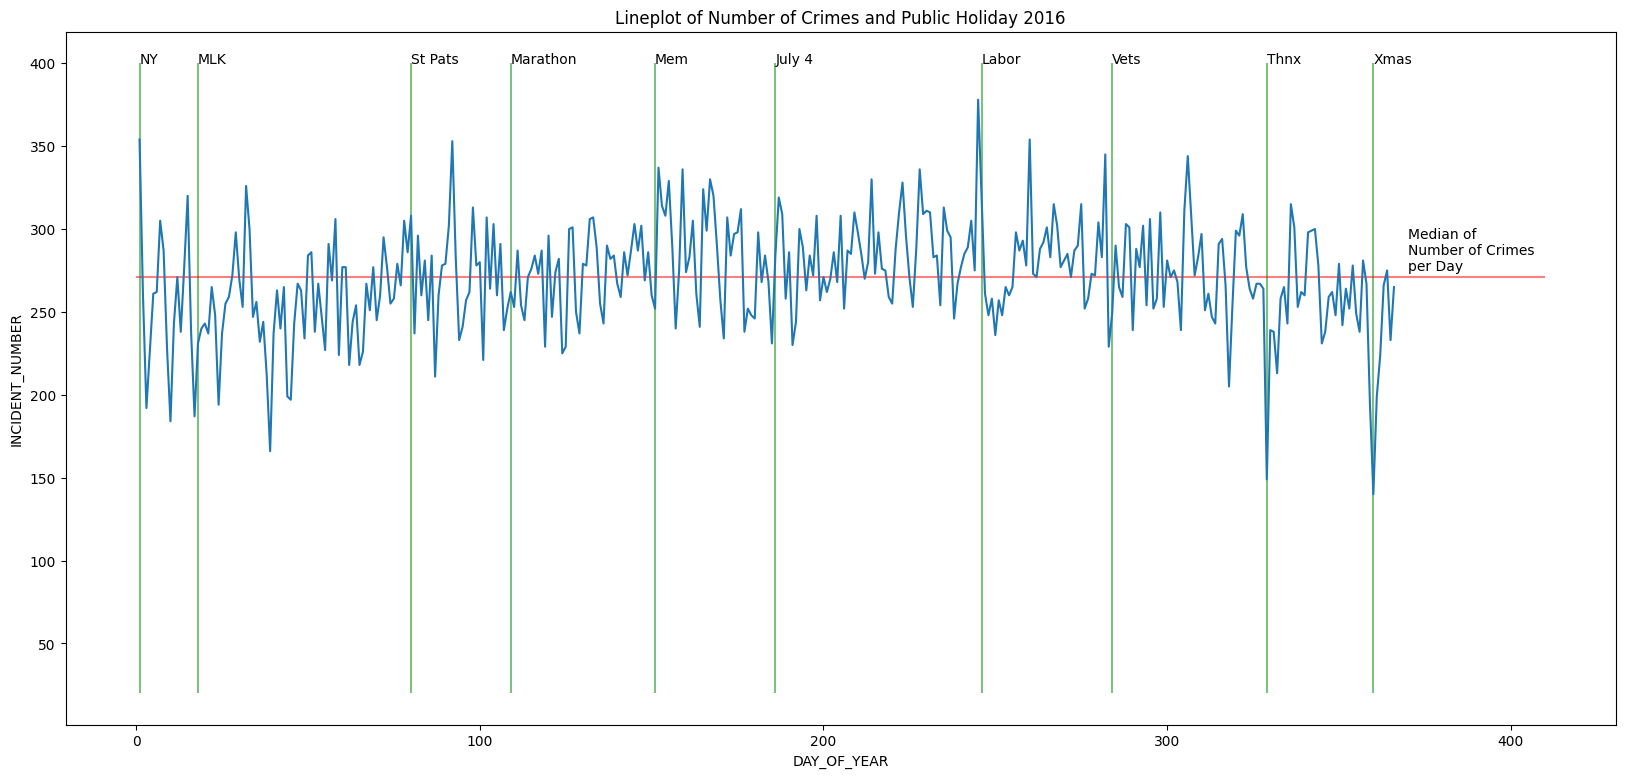

In [222]:
# Lineplot of Number of Crimes and Public Holiday 2016
doy_in = df[df['YEAR']==2016].groupby(['YEAR','DAY_OF_YEAR'])[['INCIDENT_NUMBER']].count().reset_index()

# Dates of Public Holidays
holidays_2016 = pd.Series(['2016-01-01', # New Years Day
                     '2016-01-18', # MLK Day
                     '2016-03-20', # St. Patrick's Day
                     '2016-04-18', # Boston marathon
                     '2016-05-30', # Memorial Day
                     '2016-07-04', # Independence Day
                     '2016-09-02', # Labor Day
                     '2016-10-10', # Veterans Day
                     '2016-11-24', # Thanksgiving
                     '2016-12-25']) # Christmas
holidays_2016 = pd.to_datetime(holidays_2016).dt.dayofyear

plt.vlines(holidays_2016, 20, 400, alpha=0.5, color ='g')
for i in range(len(holidays_2016)):
    plt.text(x=holidays_2016[i], y=400, s=holidays_names[i])

plt.hlines(yd_in[yd_in['YEAR']==2016]['INCIDENT_NUMBER'].median(), 0, 410, alpha=0.5, color ='r')
plt.text(x=370, y=275, s='Median of \nNumber of Crimes \nper Day')

sns.lineplot(data=doy_in, x='DAY_OF_YEAR', y='INCIDENT_NUMBER')

plt.title('Lineplot of Number of Crimes and Public Holiday 2016')
plt.show()
# the result shows that the number of crimes when Public Holiday in 2016 and 2017 might differ
# let's perform Mann-Whitney Test

In [223]:
# Mann-Whitney Test
doy_h16 = df[df['YEAR']==2016].groupby(['DAY_OF_YEAR','YEAR'])[['INCIDENT_NUMBER']].count().loc[holidays_2016].reset_index()
doy_h17 = df[df['YEAR']==2017].groupby(['DAY_OF_YEAR','YEAR'])[['INCIDENT_NUMBER']].count().loc[holidays_2017].reset_index()
doy_h = pd.concat([doy_h16, doy_h17])

# Ho : Median of INCIDENT_NUMBER per Day When Public Holiday in 2016 <= 2017
# Ha : Median of INCIDENT_NUMBER per Day When Public Holiday in 2016 > 2017

from scipy.stats import mannwhitneyu

result = list(mannwhitneyu(
    doy_h[doy_h['YEAR'] == 2016]['INCIDENT_NUMBER'],
    doy_h[doy_h['YEAR'] == 2017]['INCIDENT_NUMBER'],
    alternative = 'greater'
))

# print('U-Statistic', result[0])
print('P-Value', result[1])
# print('P-Value/2', result[1]/2)

if result[1] <= 0.05:
    print('Median of INCIDENT_NUMBER per Day When Public Holiday in 2016 > 2017 (Reject Ho)')
else:
    print('Median of INCIDENT_NUMBER per Day When Public Holiday in 2016 <= 2017 (Failed to Reject Ho)')
# the result shows that we failed to reject Ho
# it indicate that there are not enough evidence that Median of INCIDENT_NUMBER per Day When Public Holiday in 2016 > 2017
# therefore, The BPD need to ensure security during Public Holiday
# then, The BPD want to know :
# is Season become one of factor that trigger the number of crimes in 2016 and 2017?

P-Value 0.29821248072862516
Median of INCIDENT_NUMBER per Day When Public Holiday in 2016 <= 2017 (Failed to Reject Ho)


In [224]:
# Create SEASON Column
def season(x):
    if x['MONTH']>=3 and x['MONTH']<=5:
        return 'SPRING'
    elif x['MONTH']>=6 and x['MONTH']<=8:
        return 'SUMMER'
    elif x['MONTH']>=9 and x['MONTH']<=11:
        return 'FALL'
    else:
        return 'WINTER'    

df['SEASON'] = df.apply(lambda x: season(x), axis=1)

In [225]:
# Since INCIDENT_NUMBER per Day didn't follow normal distribution, we use Kruskal-Wallis Test
df['DATE'] = pd.to_datetime(df['DATE'])
ms = df[(df['DATE']>='2015-12-01') & (df['DATE']<='2017-11-30')]
df['DATE'] = df['DATE'].astype(object)
s_in = ms.groupby(['YEAR','MONTH','SEASON'])[['INCIDENT_NUMBER']].count().reset_index()

# Ho : Median of INCIDENT_NUMBER in FALL = SPRING = SUMMER = WINTER
# Ha : At least one pair of the population are not equal (and we don't know which)

from scipy.stats import kruskal

stat, pval = kruskal(s_in[s_in['SEASON'] == 'FALL']['INCIDENT_NUMBER'],
s_in[s_in['SEASON'] == 'SPRING']['INCIDENT_NUMBER'],
s_in[s_in['SEASON'] == 'SUMMER']['INCIDENT_NUMBER'],
s_in[s_in['SEASON'] == 'WINTER']['INCIDENT_NUMBER'])

# print('stat: ', stat)
print('pval: ', pval)

if pval <= 0.05:
    print("At least one pair of the population are not equal (and we don't know which) (Reject Ho)")
else:
    print('Median of INCIDENT_NUMBER in FALL = SPRING = SUMMER = WINTER (Failed to Reject Ho)')
# the result shows that at least one pair of INCIDENT_NUMBER in each SEASON are not equal (and we don't know which)
# each SEASON have different temperature among the other
# let's see the effect of temperature on the number of crime

pval:  0.0023414076984328972
At least one pair of the population are not equal (and we don't know which) (Reject Ho)


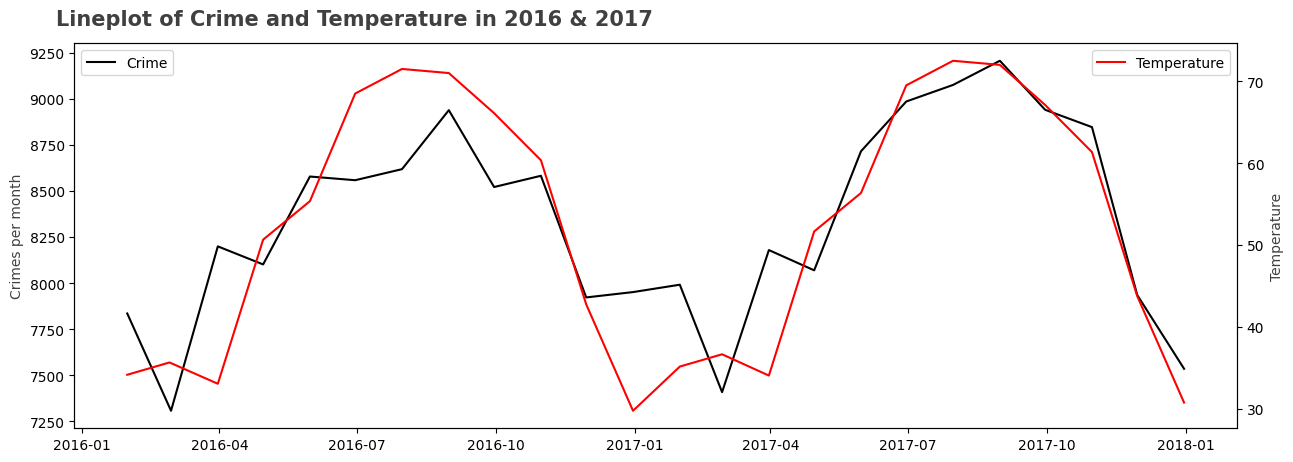

In [247]:
# Temperature data for 2016 & 2017
date = ["31.1.2016","28.2.2016","31.3.2016","30.4.2016","31.5.2016","30.6.2016","31.7.2016"
        ,"31.8.2016","30.9.2016","31.10.2016","30.11.2016","31.12.2016"
        ,"31.1.2017","28.2.2017","31.3.2017","30.4.2017","31.5.2017","30.6.2017","31.7.2017"
        ,"31.8.2017","30.9.2017","31.10.2017","30.11.2017","31.12.2017"]
avrg_temp = [34.15,35.65,33.05,50.65,55.35,68.5,71.5,71,66.1,60.35,42.75,29.75
        ,35.15,36.65,34.05,51.65,56.35,69.5,72.5,72,67.1,61.35,43.75,30.75]
temperature_data = pd.DataFrame(date,columns=["Date"])
temperature_data["Date"] = pd.to_datetime(temperature_data["Date"], dayfirst=True)
temperature_data["F Temperate"] = avrg_temp

df_1617 = df[(df['YEAR']>2015) & (df['YEAR']<2018)]
df_month_1617 = df_1617.set_index(df_1617["OCCURRED_ON_DATE"]).resample("M").agg({"OFFENSE_CODE_GROUP" : "size"})

#Lineplot of Crime and Temperature in 2016 & 2017
fig, ax1 = plt.subplots(figsize=(15,5))
ax2 = ax1.twinx()
ax1.plot(df_month_1617.index,df_month_1617["OFFENSE_CODE_GROUP"],label="Crime",color="black")
ax2.plot(temperature_data["Date"],temperature_data["F Temperate"],label="Temperature",color="r")
ax2.legend()
ax1.legend(loc="upper left")
plt.xlabel("Date", alpha=0.75)
ax1.set_ylabel("Crimes per month", alpha=0.75)
ax2.set_ylabel("Temperature", alpha=0.75)
ax1.text(x=["2015-12-15"],y=9400,s="Lineplot of Crime and Temperature in 2016 & 2017",weight="bold",alpha=0.75, fontsize=15)
plt.show()
# the result shows that high temperature will lead to higher number of crime
# therefore, The BPD need to increase their service during high temperatures or during SUMMER
# then, The BPD want to know :
# is week of month become one of factor that trigger the number of crimes?

In [227]:
# Create WEEK_TYPE column
def week_type(x):
    if x['DAY']>=1 and x['DAY']<=7:
        return 'WEEK 1'
    elif x['DAY']>=8 and x['DAY']<=14:
        return 'WEEK 2'
    elif x['DAY']>=15 and x['DAY']<=21:
        return 'WEEK 3'
    else:
        return 'WEEK 4'    

df['WEEK_TYPE'] = df.apply(lambda x: week_type(x), axis=1)

In [228]:
# Since INCIDENT_NUMBER per Day didn't follow normal distribution, we use Kruskal-Wallis Test
mt = df[(df['YEAR']>2015) & (df['YEAR']<2018)]
wt_in = mt.groupby(['MONTH','WEEK_TYPE'])[['INCIDENT_NUMBER']].count().reset_index()

# Ho : Median of INCIDENT_NUMBER in WEEK 1 = WEEK 2 = WEEK 3 = WEEK 4
# Ha : At least one pair of the population are not equal (and we don't know which)

stat, pval = kruskal(wt_in[wt_in['WEEK_TYPE'] == 'WEEK 1']['INCIDENT_NUMBER'],
wt_in[wt_in['WEEK_TYPE'] == 'WEEK 2']['INCIDENT_NUMBER'],
wt_in[wt_in['WEEK_TYPE'] == 'WEEK 3']['INCIDENT_NUMBER'],
wt_in[wt_in['WEEK_TYPE'] == 'WEEK 4']['INCIDENT_NUMBER'])

# print('stat: ', stat)
print('pval: ', pval)

if pval <= 0.05:
    print("At least one pair of the population are not equal (and we don't know which) (Reject Ho)")
else:
    print('Median of INCIDENT_NUMBER in WEEK 1 = WEEK 2 = WEEK 3 = WEEK 4 (Failed to Reject Ho)')
# the result shows that at least one pair of INCIDENT_NUMBER in each WEEK_TYPE are not equal (and we don't know which)
# therefore, The BPD need to increase their service on WEEK_TYPE with high number of crime
# then, The BPD want to know :
# is day type of week become one of factor that trigger the number of crimes?

stat:  25.905612244897952
pval:  9.981398566350447e-06
At least one pair of the population are not equal (and we don't know which) (Reject Ho)


In [229]:
# Create DAY_TYPE column
def day_type(x):
    if x['DAY_OF_WEEK']=='MONDAY':
        return 'WEEKDAY'
    elif x['DAY_OF_WEEK']=='TUESDAY':
        return 'WEEKDAY'
    elif x['DAY_OF_WEEK']=='WEDNESDAY':
        return 'WEEKDAY'
    elif x['DAY_OF_WEEK']=='THURSDAY':
        return 'WEEKDAY'
    elif x['DAY_OF_WEEK']=='FRIDAY':
        return 'WEEKDAY'
    elif x['DAY_OF_WEEK']=='SATURDAY':
        return 'WEEKEND'
    else:
        return 'WEEKEND'    

df['DAY_TYPE'] = df.apply(lambda x: day_type(x), axis=1)

In [230]:
# Exclude data on 2018-09-03
df['DATE'] = pd.to_datetime(df['DATE'])
df_1518 = df[df['DATE']<'2018-09-03']
df['DATE'] = df['DATE'].astype(object)
dt_in = df_1518.groupby(['DATE','DAY_TYPE'])[['INCIDENT_NUMBER']].count().reset_index()
# since INCIDENT_NUMBER per day didn't follow normal distribution, we use Mann-Withney Test

In [231]:
# Mann-Withney Test
# Ho : Median of INCIDENT_NUMBER on WEEKDAY <= Median of INCIDENT_NUMBER on WEEKEND
# Ha : Median of INCIDENT_NUMBER on WEEKDAY > Median of INCIDENT_NUMBER on WEEKEND
result = list(mannwhitneyu(
    dt_in[dt_in['DAY_TYPE'] == 'WEEKDAY']['INCIDENT_NUMBER'],
    dt_in[dt_in['DAY_TYPE'] == 'WEEKEND']['INCIDENT_NUMBER'],
    alternative = 'greater'
))

# print('U-Statistic', result[0])
print('P-Value', result[1])
# print('P-Value/2', result[1]/2)

if result[1] <= 0.05:
    print('Median of INCIDENT_NUMBER on WEEKDAY > Median of INCIDENT_NUMBER on WEEKEND (Reject Ho)')
else:
    print('Median of INCIDENT_NUMBER on WEEKDAY <= Median of INCIDENT_NUMBER on WEEKEND (Failed to Reject Ho)')
# the result shows that number of crime on WEEKDAY > WEEKEND
# therefore, The BPD need to strength their service on WEEKDAY
# then, The BPD want to know :
# is hour type of day become one of factor that trigger the number of crimes?

P-Value 3.6358006530011492e-34
Median of INCIDENT_NUMBER on WEEKDAY > Median of INCIDENT_NUMBER on WEEKEND (Reject Ho)


In [232]:
# Create HOUR_TYPE column
def hour_type(x):
    if x['HOUR']>=5 and x['HOUR']<=11:
        return 'MORNING'
    elif x['HOUR']>11 and x['HOUR']<=16:
        return 'AFTERNOON'
    elif x['HOUR']>16 and x['HOUR']<=22:
        return 'EVENING'
    else:
        return 'NIGHT'    

df['HOUR_TYPE'] = df.apply(lambda x: hour_type(x), axis=1)

In [233]:
# D Agostino & Pearson's Test
ht_in = df.groupby(['OCCURRED_ON_DATE', 'HOUR', 'HOUR_TYPE'])[['INCIDENT_NUMBER']].count().reset_index()

from scipy.stats import normaltest
dp_statistic, df_pvalue = normaltest(ht_in['INCIDENT_NUMBER'])
if df_pvalue > 0.05 :
    print(f'P-Value for HOUR_TYPE : {df_pvalue}. So, we assume a normal distribution')
else :
    print(f'P-Value for HOUR_TYPE : {df_pvalue}. So, we do not assume a normal distribution')
# the result shows that number of crime per HOUR didn't follow normal distribution,
# therefore we use Kruskal-Wallis Test

P-Value for HOUR_TYPE : 0.0. So, we do not assume a normal distribution


In [234]:
# Kruskal-Wallis Test
# Ho : Median of INCIDENT_NUMBER on MORNING = AFTERNOON = EVENING = NIGHT
# Ha : At least one pair of the population are not equal (and we don't know which)

stat, pval = kruskal(ht_in[ht_in['HOUR_TYPE'] == 'MORNING']['INCIDENT_NUMBER'],
ht_in[ht_in['HOUR_TYPE'] == 'AFTERNOON']['INCIDENT_NUMBER'],
ht_in[ht_in['HOUR_TYPE'] == 'EVENING']['INCIDENT_NUMBER'],
ht_in[ht_in['HOUR_TYPE'] == 'NIGHT']['INCIDENT_NUMBER'])

# print('stat: ', stat)
print('pval: ', pval)

if pval <= 0.05:
    print("At least one pair of the population are not equal (and we don't know which) (Reject Ho)")
else:
    print('Median of INCIDENT_NUMBER on MORNING = AFTERNOON = EVENING = NIGHT (Failed to Reject Ho)')
# the result shows that at least one pair of INCIDENT_NUMBER in each HOUR_TYPE are not equal (and we don't know which)
# therefore, The BPD need to increase their service on HOUR_TYPE with high number of crime
# then, The BPD want to know :
# is there any correlation of UCR_PART and DAY_TYPE?

pval:  1.3336253673489833e-71
At least one pair of the population are not equal (and we don't know which) (Reject Ho)


In [235]:
# Create UCR_ORD column
def ucr_ordo(x):
    if x['UCR_PART']=='PART ONE':
        return 4
    elif x['UCR_PART']=='JUSTIFIABLE PART ONE':
        return 3
    elif x['UCR_PART']=='PART TWO':
        return 2
    else:
        return 1    

df['UCR_ORD'] = df.apply(lambda x: ucr_ordo(x), axis=1)

In [236]:
# Create DT_ORD column
def dt_ordo(x):
    if x['DAY_TYPE']=='WEEKDAY':
        return 0
    else:
        return 1    

df['DT_ORD'] = df.apply(lambda x: dt_ordo(x), axis=1)

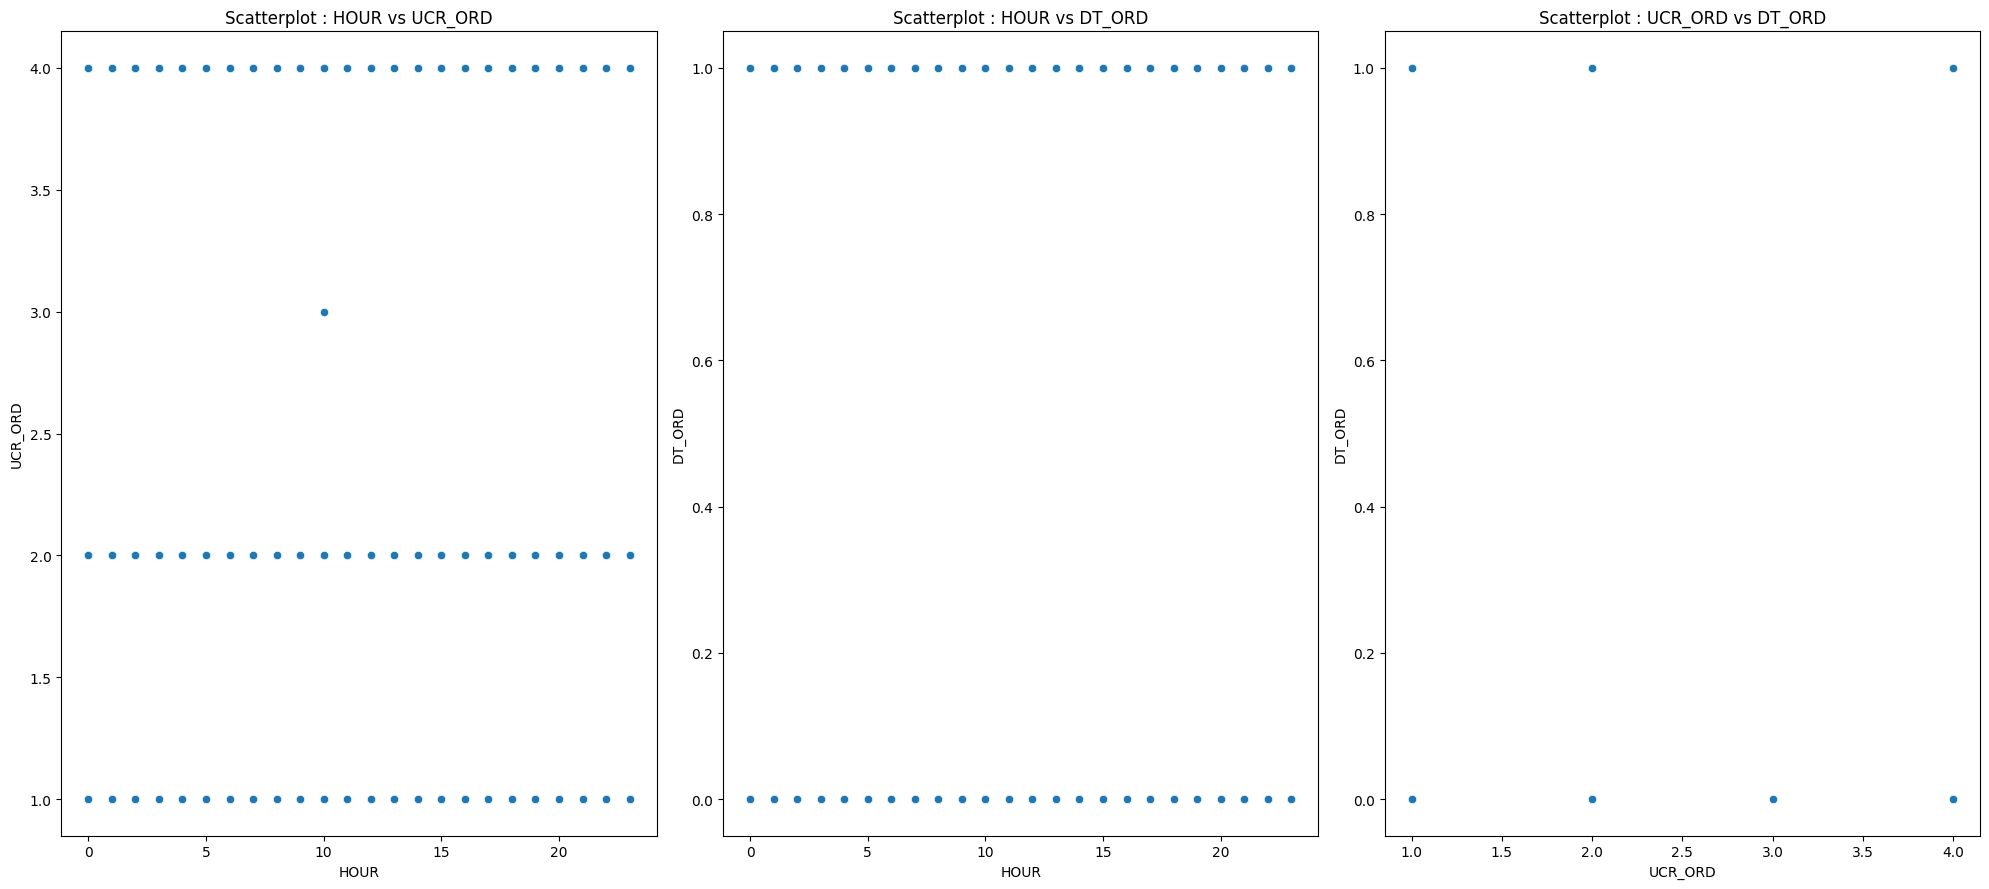

In [237]:
# Before perform a correlation, let's check the linearity using scatterplot
fig, axs = plt.subplots(1,3)
sns.scatterplot(x = df['HOUR'], y=df['UCR_ORD'], ax=axs[0])
axs[0].set_title("Scatterplot : HOUR vs UCR_ORD")
sns.scatterplot(x = df['HOUR'], y=df['DT_ORD'], ax=axs[1])
axs[1].set_title("Scatterplot : HOUR vs DT_ORD")
sns.scatterplot(x = df['UCR_ORD'], y=df['DT_ORD'], ax=axs[2])
axs[2].set_title("Scatterplot : UCR_ORD vs DT_ORD")
fig.tight_layout()
# since HOUR, UCR_PART, and DAY_TYPE is categorical value
# therefore, the result don't perform any linearity and we use Spearman Correlation

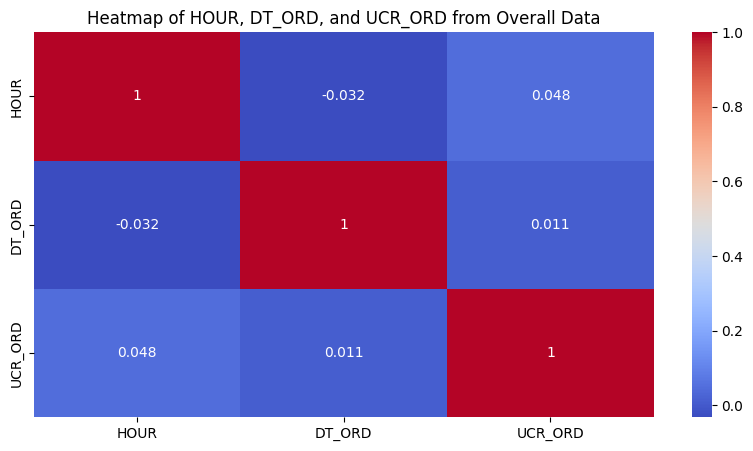

In [250]:
# Spearman Correlation
plt.figure(figsize=(10,5))
sns.heatmap(df[['HOUR', 'DT_ORD', 'UCR_ORD']].corr(method='spearman'), annot=True, cmap='coolwarm')
plt.title('Heatmap of HOUR, DT_ORD, and UCR_ORD from Overall Data')
plt.show()
# the result shows between HOUR, UCR_PART, and DAY_TYPE has weak relationship
# HOUR and UCR_PART have a linear relationship: when HOUR increased, crime tend to performed more serious (UCR PART ONE)
# HOUR and DAY_TYPE have non linear relationship: when HOUR increased, crime tend to performed more on WEEKDAY
# UCR_PART and DAY_TYPE have non linear relationship: when serious crime performed, it tend to performed more on WEEKDAY
# in Spearman Correlation, we need to change categorical value into numerical value (convert the ordo)

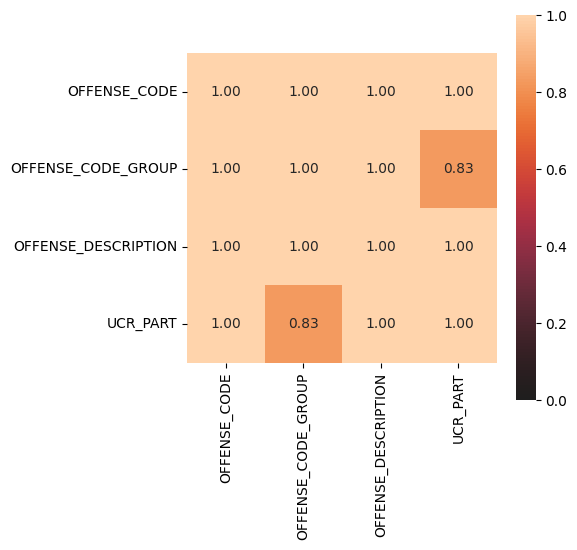

{'corr':                      OFFENSE_CODE  OFFENSE_CODE_GROUP  OFFENSE_DESCRIPTION  UCR_PART
 OFFENSE_CODE             1.000000            0.999757             1.000000  0.999660
 OFFENSE_CODE_GROUP       0.999757            1.000000             0.999757  0.828372
 OFFENSE_DESCRIPTION      1.000000            0.999757             1.000000  0.999660
 UCR_PART                 0.999660            0.828372             0.999660  1.000000,
 'ax': <AxesSubplot: >}

In [239]:
# Let's use Creamer's V Association
offenses = df[['OFFENSE_CODE','OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION','UCR_PART']]
associations(offenses, nom_nom_assoc='cramer', nominal_columns='all', figsize=(5,5))
# the result shows that OFFENSE_CODE has strong association with OFFENSE_CODE_GROUP, OFFENSE_DESCRIPTION, and UCR_PART
# OFFENSE_CODE_GROUP has strong association with OFFENSE_CODE and OFFENSE_DESCRIPTION,
# and less association with UCR_PART
# it's because UCR_PART is determined by OFFENSE_DESCRIPTION or OFFENSE_CODE
# OFFENSE_DESCRIPTION has strong association with OFFENSE_CODE, OFFENSE_CODE_GROUP, and UCR_PART

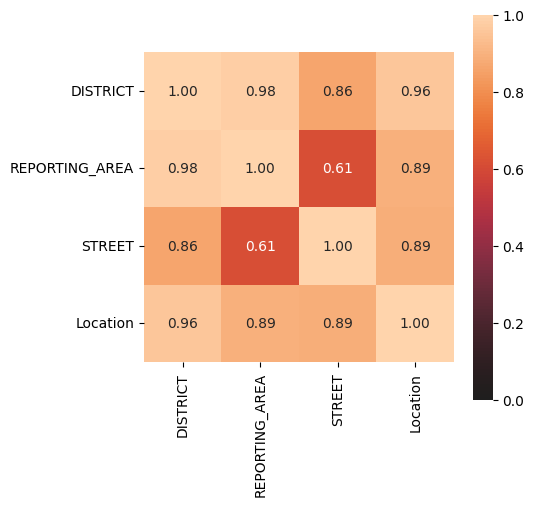

{'corr':                 DISTRICT  REPORTING_AREA    STREET  Location
 DISTRICT        1.000000        0.978007  0.863534  0.957404
 REPORTING_AREA  0.978007        1.000000  0.610843  0.893274
 STREET          0.863534        0.610843  1.000000  0.886974
 Location        0.957404        0.893274  0.886974  1.000000,
 'ax': <AxesSubplot: >}

In [240]:
# Creamer's V Association
places = df[['DISTRICT','REPORTING_AREA','STREET','Location']]
associations(places, nom_nom_assoc='cramer', nominal_columns='all', figsize=(5,5))
# the result shows that DISTRICT has the first strongest association with REPORTING_AREA,
# it's because each DISTRICT have several REPORTING_AREA
# then, DISTRICT has the second strongest association with Location,
# it's because each point of Location will perform true value of a DISTRICT
# then, DISTRICT has the third  strongest association with STREET,
# it's because the name of a STREET migth be same on different DISTRICT
# REPORTING_AREA has strong association with Location,
# it's because each point of Location will perform true value of a REPORTING_AREA
# then, REPORTING_AREA has moderate association with STREET,
# therefore, STREET need to be combined with DISTRICT to represent better REPORTING_AREA value
# STREET has the strongest association with Location,
# it's because each point of Location will perform true value of a STREET

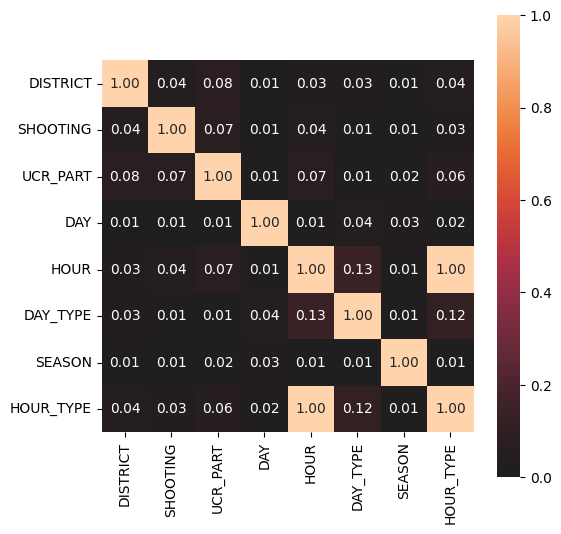

{'corr':            DISTRICT  SHOOTING  UCR_PART       DAY      HOUR  DAY_TYPE    SEASON  HOUR_TYPE
 DISTRICT   1.000000  0.041918  0.077544  0.005492  0.030531  0.026463  0.010476   0.042797
 SHOOTING   0.041918  1.000000  0.066045  0.007291  0.040703  0.013779  0.007585   0.034682
 UCR_PART   0.077544  0.066045  1.000000  0.010747  0.068881  0.012868  0.015267   0.058707
 DAY        0.005492  0.007291  0.010747  1.000000  0.010216  0.044975  0.033468   0.016727
 HOUR       0.030531  0.040703  0.068881  0.010216  1.000000  0.134646  0.012277   0.999969
 DAY_TYPE   0.026463  0.013779  0.012868  0.044975  0.134646  1.000000  0.011085   0.117040
 SEASON     0.010476  0.007585  0.015267  0.033468  0.012277  0.011085  1.000000   0.008880
 HOUR_TYPE  0.042797  0.034682  0.058707  0.016727  0.999969  0.117040  0.008880   1.000000,
 'ax': <AxesSubplot: >}

In [251]:
# Creamer's V Association
incidents = df[['DISTRICT','SHOOTING','UCR_PART','HOUR','DAY_TYPE','SEASON','HOUR_TYPE']]
associations(incidents, nom_nom_assoc='cramer', nominal_columns='all', figsize=(6,6))
# the result shows that DISTRICT has the strongest association with UCR_PART
# SHOOTING has the strongest association with UCR_PART
# HOUR has the strongest association with DAY_TYPE
# SEASON has the strongest association with UCR_PART
# HOUR_TYPE has the strongest association with DAY_TYPE

In [242]:
# df.to_excel('Crimes in Boston.xlsx')

## CONCLUSION & RECOMMENDATION
The BPD has mission statement to fight crime, reduce fear, and improve the quality of life in Boston.
In order to achieve their mission statement, The BPD need to do several actionable strategy for each sub mission statement as follows:

    1. Fight Crime Strategy
        From the overall data, we know that there is an increased number of crime from year 2016 to 2017. However, there is declining trend in 2018.If the BPD can maintain their performance until the end of 2018, The BPD could achieve their mission statement in term of Fight Crime.
        The BPD has already focused Fight Crime on the District with the most number of crimes (B2 and C11). It's resulting on the number of crimes per day for B2 and C11 decreased from 2015 to 2018. For the other District also show a declined number of crimes per day. Therefore, The BPD need to maintain their performance until the end of 2018 in order to Fight Crime on each District. However, The BPD need to prioritize their service for the rest of 2018 on C6 because it show an increased trend number of crimes per day.

    2. Reduce Fear Strategy
        UCR Part indicate seriousness level of a crime. From the overall data, we know that there is a decreased number of crime per day for UCR Part One. However, UCR Part Two show an increased number of crime. However, in 2018 the number of crimes per day for UCR PART Two show a declined trend. Therefore, The BPD need to maintain their performance until the end of 2018 in order to broader achieving the mission statement in term of Reduce Fear. It's applied same trend for EXCLUDED FROM UCR PART.
        The BPD need to prioritize their service in D4 because it has the most number of crime that falls into UCR Part One. Furthermore, B2 need to become the second priority because it has the most number of crimes that falls into UCR PART Two and second place of the most number of crimes that falls into UCR Part One. 
        
    3. Improve The Quality of Life Strategy
        The BPD could Improve The Quality of Life from several factors :
        1. Pay attention to Motor Vehicle Accident Response since it become the most contributor Offense Code Group in 2016 and 2017. Then, we figured out that M/V - Leaving Scene - Property Damage is the most contributor of Motor Vehicle Accident Response and it falls to Excluded from UCR Part. Therefore, The BPD could improve their performance in order to reduce M/V - Leaving Scene - Property Damage occurence by increasing strictness of the rules in driving Motor Vehicle and increasing fines related to Motor Vehicle incidents.
        2. Pay attention to the rest of Top 5 Offense Description which are Investigate Person, Sick/Injuried/Medical - Person, Vandalism, and Assault Simple - Battery that all of them falls into UCR Part Two. In order to reduce the Top 5 Offense Description, The BPD need to find each the root cause for each Top 5 Offense Description. First, Investigate Person caused by an individual or groups of people who cause trouble so that it makes trouble with the citizen, so The BPD need to provide guidance to these individual or groups of people so that they can give a positive impact on themselves and others. Second, Sick/Injuried/Medical - Person caused by any incidents from unsafe place, so The BPD need to increase safety both on public and private area. Third, Vandalism already shows a decreased number of crime in 2016 t0 2017, vandalism mainly caused by an individual or groups of people that has resentment toward their opponent, so The BPD need to reduce the emergence of conflict and also perform surveillance of the building. Fourth, Assault Simple - Battery caused by someone who commits an act that actually inflicts harmful or offensive contact on the victim, so The BPD need to increase the punishment for example sent to jail and substantial fines.
        3. The number of Shooting had an increasing trend from 2015 to 2017. However, it shows a good sign in 2018 has a decreased trend. Moreover, The BPD had already performed SHOOTING properly according to the UCR PART. Therefore, The BPD need to maintain their performance until the end of 2018.
        4. The BPD could clasiffied their territory into 3 category acording to the most number of crimes and their geography. First, The BPD need to focused on District B2. Second, to the adjacent District such as D4, C11, C6, B3, and E11. Third, then the outer circle District such as A1, D14, E5, E18, A7, and A15.
        5. Public Holiday become a crucial day with full security, so The BPD need to charge all police officers in order to guard during this time.
        6. It's already clear that Summer is the most number of crime occurred among the other season of the year, so The BPD need to increase their performance during this season.
        7. Then, Week 4 of the month become the most number of crime occured, so The BPD need to increase their performance during this week. 
        8. It's also important that number of crimes tends to increased at Weekdays than Weekends especially on Friday, so The BPD need to increase their performance during this day of week.
        9. Then, Late Afternoon to Early Evening become the most number of crimes per day, so The BPD need to increase their performance during this hour per day.
        10. By focused on that specific of time period will give The BPD can work more efficiently and effectively.